In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import gzip
import imageio
import os
import csv

In [2]:
#path to experiment data:
agent_trajectories_path = '/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/episodes/agent_trajectory.csv'
loss_path = '/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/episodes/loss.npy'
map_history_path = '/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/crystal.npy.gz'
q_values_path = '/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/q_values.npy.gz'

In [3]:
num_agents = 50 
iterations = 1000

In [4]:
q_zip = gzip.GzipFile(q_values_path, "r")
qs = np.load(q_zip)

In [5]:
qs.shape

(1000, 50, 2)

In [6]:
ql = np.zeros((num_agents,iterations))
qr = np.zeros((num_agents,iterations))

In [7]:
time = np.linspace(0,iterations,iterations)
for ts in range(0,iterations):
    for a in range(0,num_agents):
        ql[a][ts]=qs[ts][a][0]
        qr[a][ts]=qs[ts][a][1]

In [9]:
print(qs)

[[[0.5        0.5       ]
  [0.5        0.5       ]
  [0.5        0.5       ]
  ...
  [0.5        0.5       ]
  [0.5        0.5       ]
  [0.5        0.5       ]]

 [[0.5        0.5       ]
  [0.5        0.5       ]
  [0.5        0.5       ]
  ...
  [0.5        0.5       ]
  [0.5        0.5       ]
  [0.5        0.5       ]]

 [[0.5        0.5       ]
  [0.5        0.5       ]
  [0.5        0.5       ]
  ...
  [0.5        0.5       ]
  [0.5        0.5       ]
  [0.5        0.5       ]]

 ...

 [[0.02934818 0.97065181]
  [0.02704278 0.97295725]
  [0.02790915 0.97209078]
  ...
  [0.02802483 0.97197515]
  [0.02716579 0.97283417]
  [0.02742642 0.97257364]]

 [[0.0339623  0.96603775]
  [0.03214398 0.96785599]
  [0.03429278 0.96570724]
  ...
  [0.032144   0.96785599]
  [0.03724959 0.96275043]
  [0.0350644  0.9649356 ]]

 [[0.03086614 0.96913391]
  [0.03113296 0.96886706]
  [0.03030248 0.96969754]
  ...
  [0.02835808 0.9716419 ]
  [0.03025627 0.96974373]
  [0.03048432 0.96951562]]]


In [43]:
sum_ql = np.sum(ql, axis=0)
sum_qr = np.sum(qr, axis=0)

In [44]:
avg_ql = sum_ql/num_agents
avg_qr = sum_qr/num_agents

In [45]:
var_ql_i = np.zeros((num_agents,iterations))
var_qr_i = np.zeros((num_agents,iterations))

In [46]:
for t in range(0,iterations):
    for i in range(0,num_agents):
        var_ql_i[i][t]=(ql[i][t]-avg_ql[t])**2
        var_qr_i[i][t]=(qr[i][t]-avg_qr[t])**2

In [47]:
var_ql = np.sum(var_ql_i, axis=0)/num_agents
var_qr = np.sum(var_qr_i, axis=0)/num_agents

In [48]:
std_ql = np.sqrt(var_ql)
std_qr = np.sqrt(var_qr)

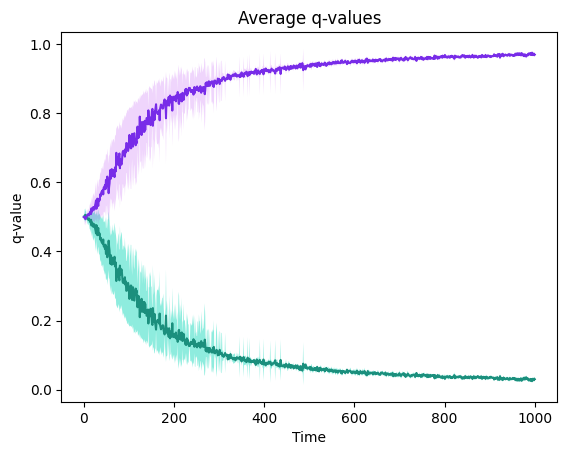

In [49]:
avgfig = plt.figure()
plt.plot(time, avg_ql, label = 'left', color='#1B8F7D')
plt.fill_between(time, avg_ql-std_ql, avg_ql+std_ql,
    alpha=0.5, facecolor='#1FDBBE')

plt.plot(time, avg_qr, label = 'right', color='#782CE8')
plt.fill_between(time, avg_qr-std_qr, avg_qr+std_qr,
    alpha=0.2, facecolor='#B32EF2')

plt.xlabel('Time')
plt.ylabel('q-value')
plt.title('Average q-values')
filename_avg = f'/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/avg_qvalues'#q_agent_{a}'
avgfig.savefig(filename_avg)
plt.show()

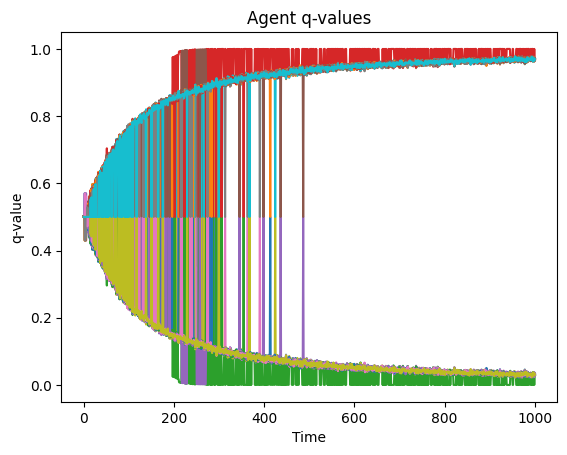

In [50]:
qfig=plt.figure()
for a in range(0,num_agents):
    #qfig=plt.figure()
    plt.plot(time, ql[a], label='left')
    plt.plot(time,qr[a], label='right')
    plt.xlabel('Time')
    plt.ylabel('q-value')
    plt.title('Agent q-values')#f'agent {a}')
    #plt.legend()
    filename = f'/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/all_qvalues'#q_agent_{a}'
    qfig.savefig(filename)
plt.show()

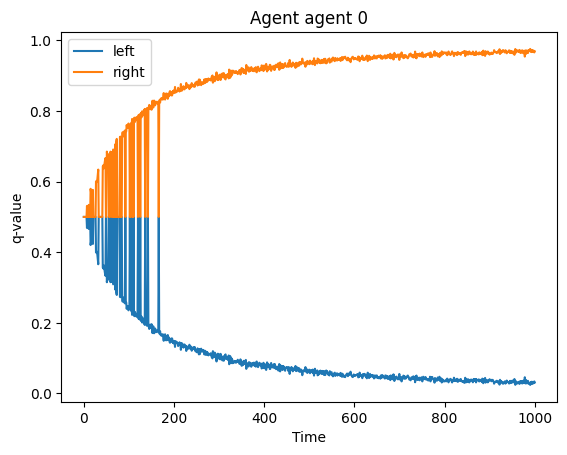

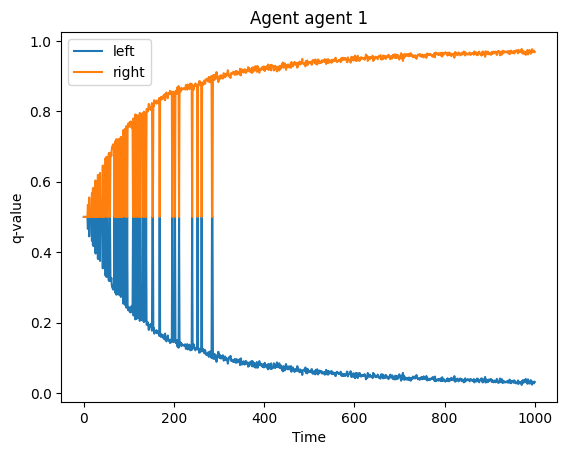

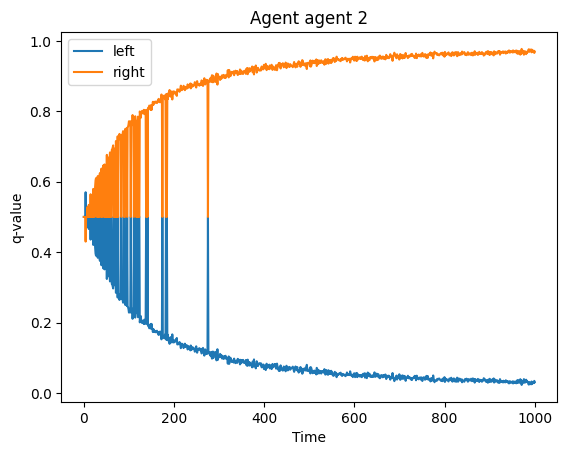

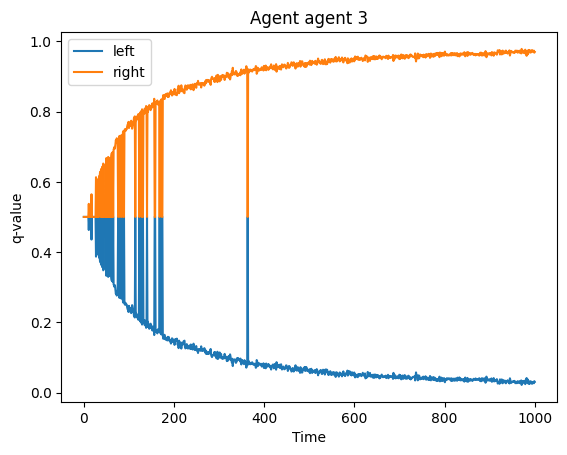

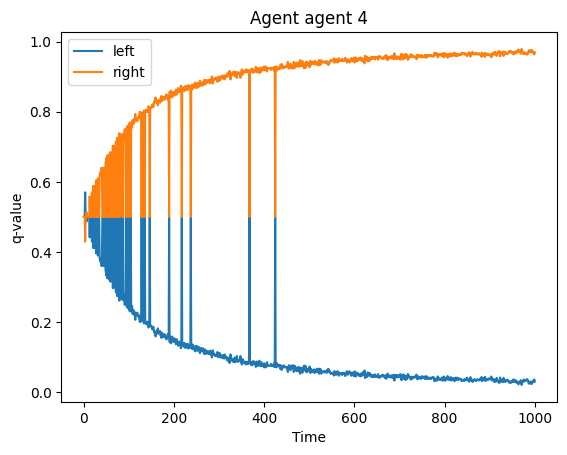

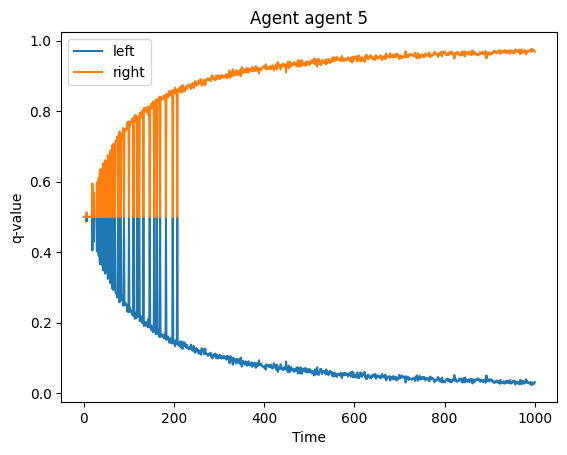

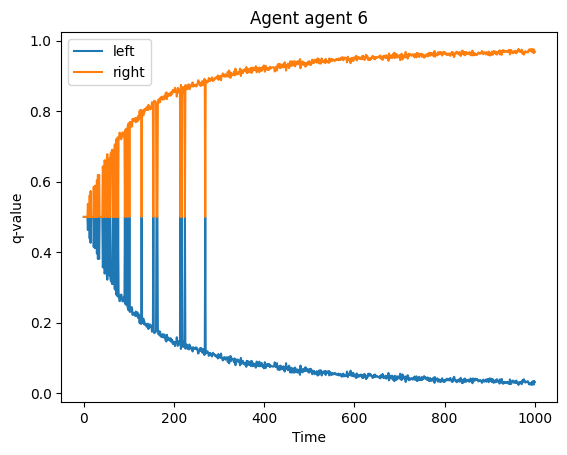

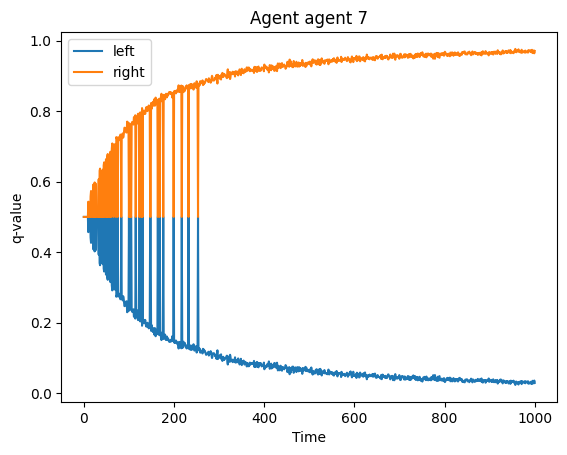

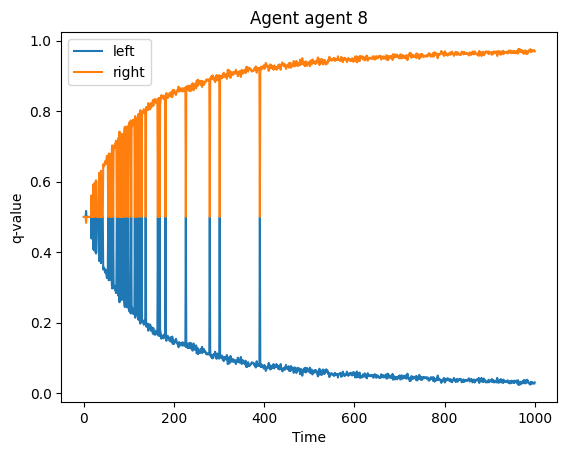

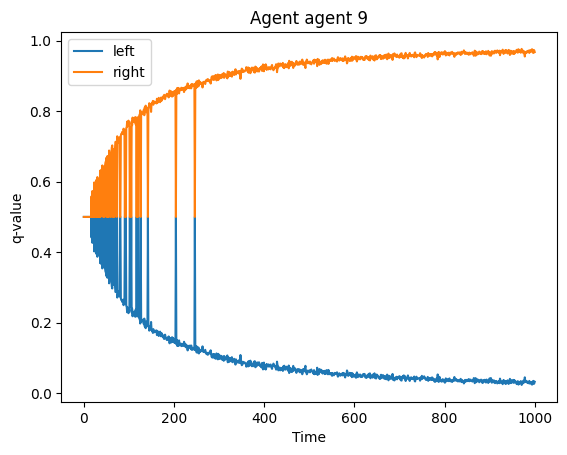

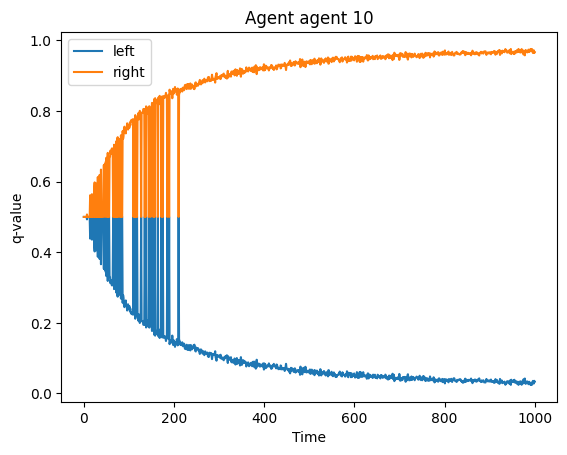

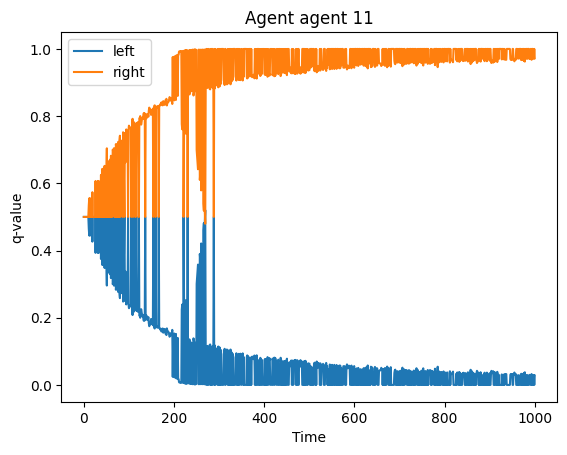

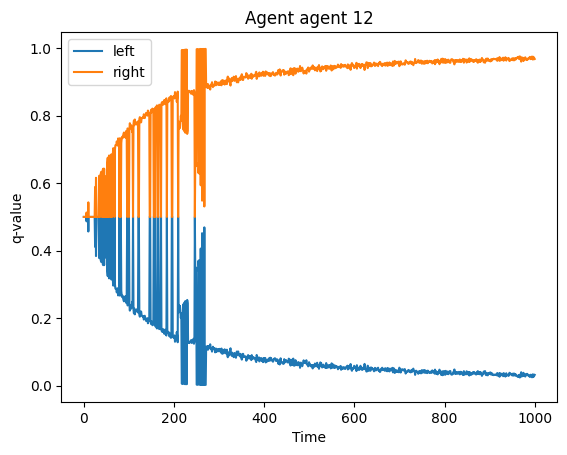

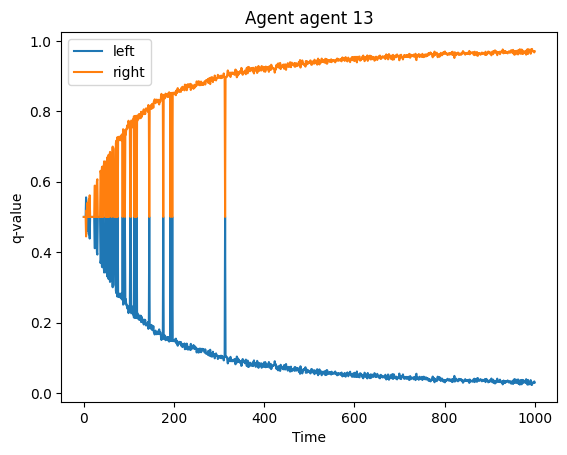

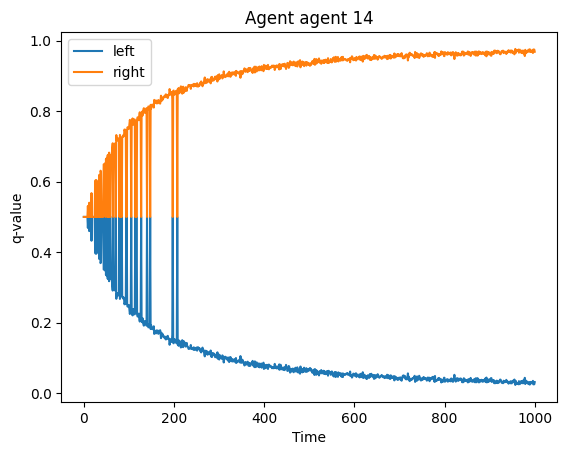

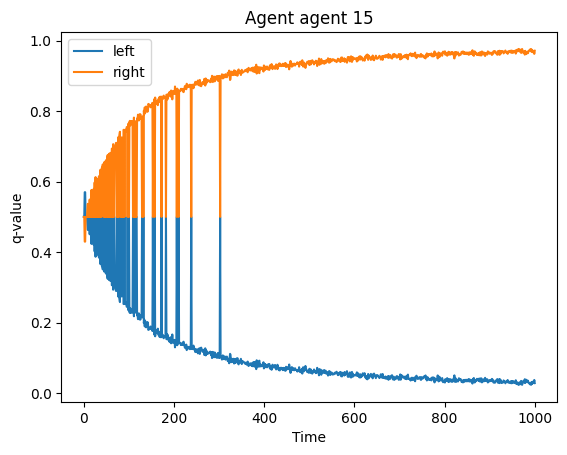

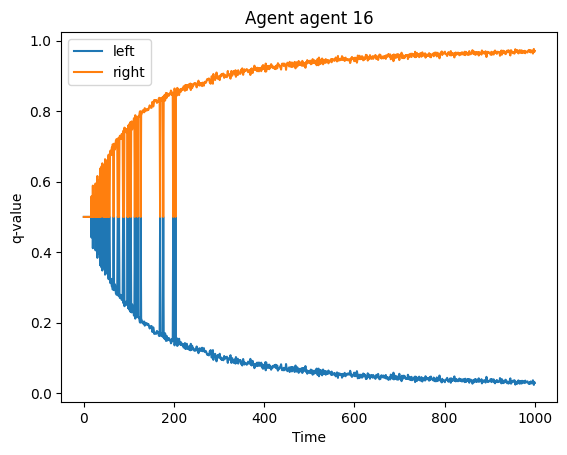

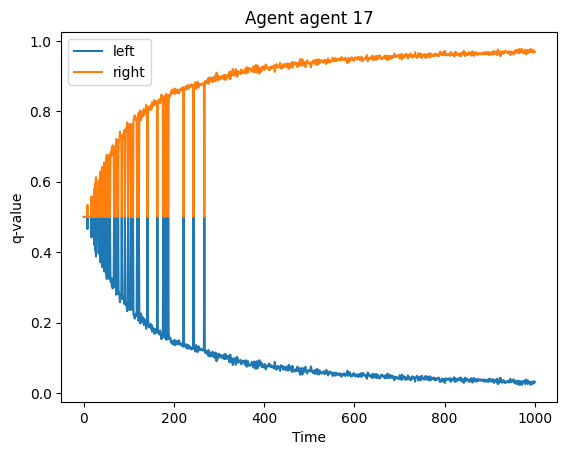

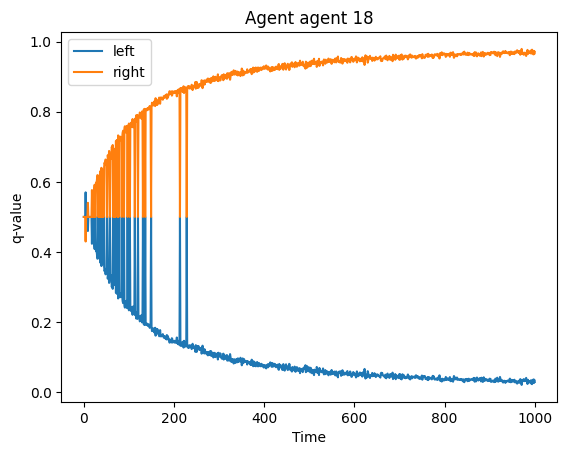

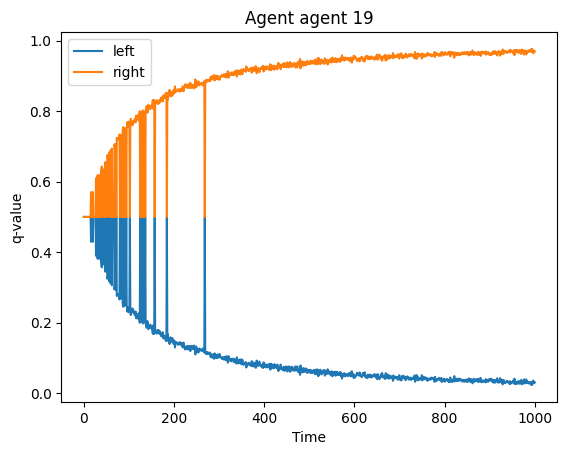

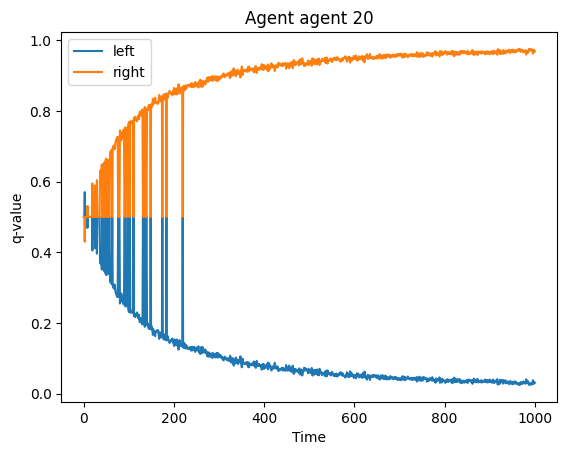

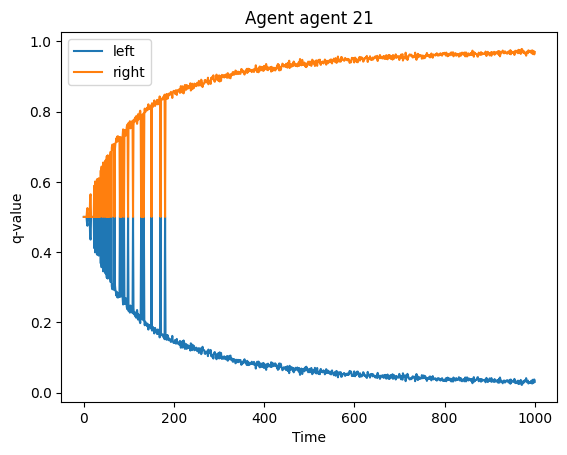

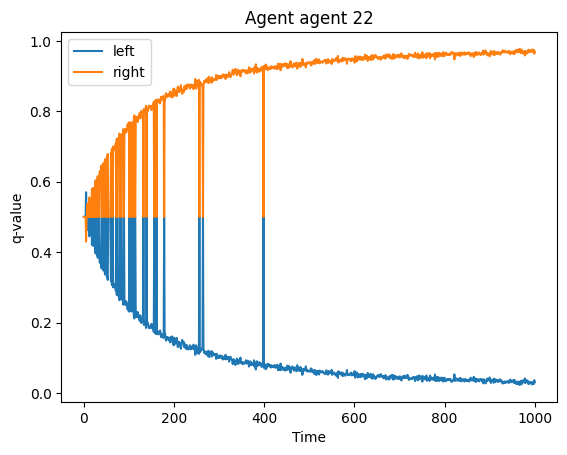

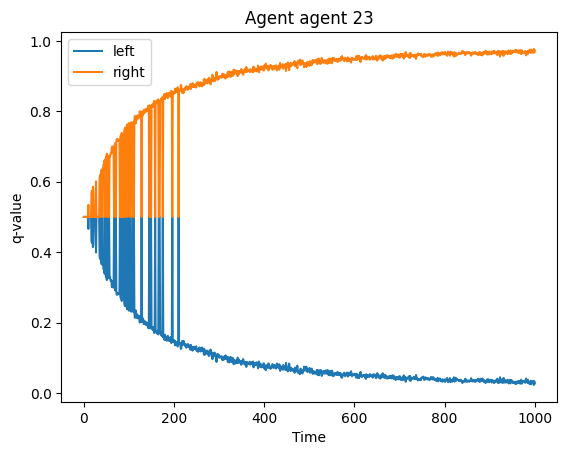

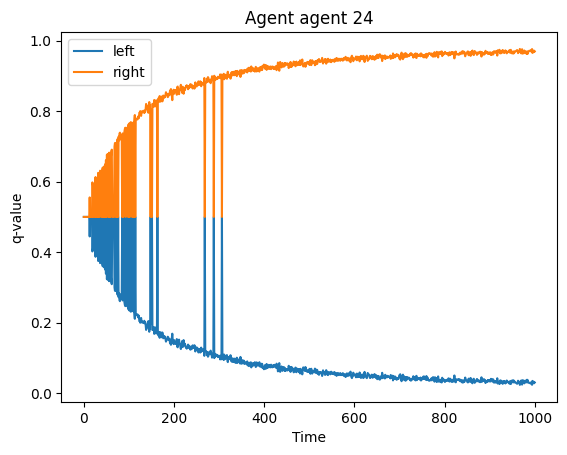

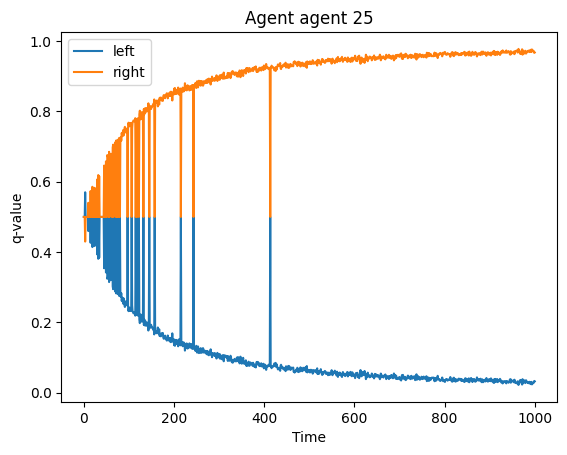

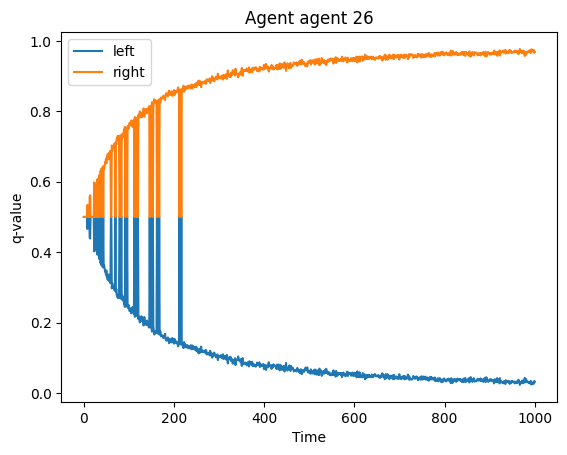

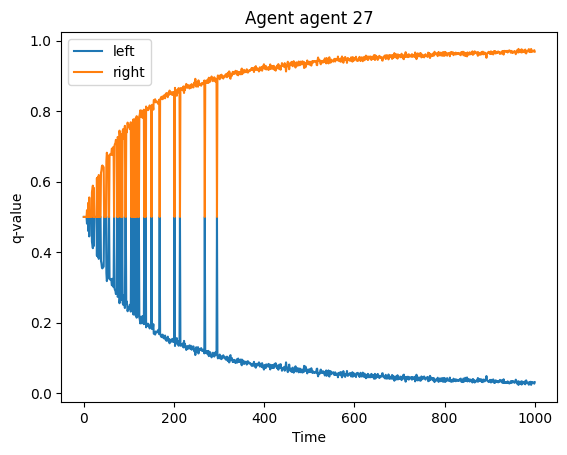

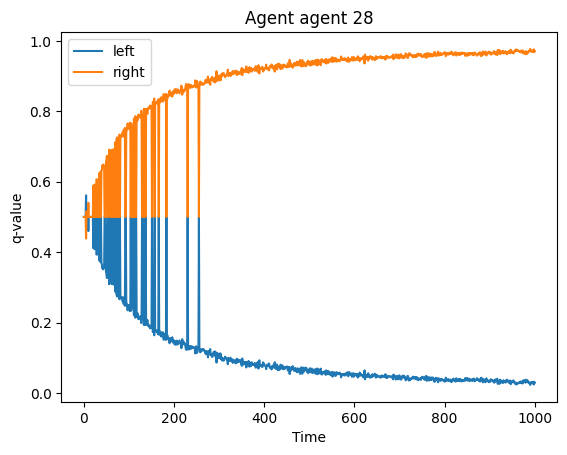

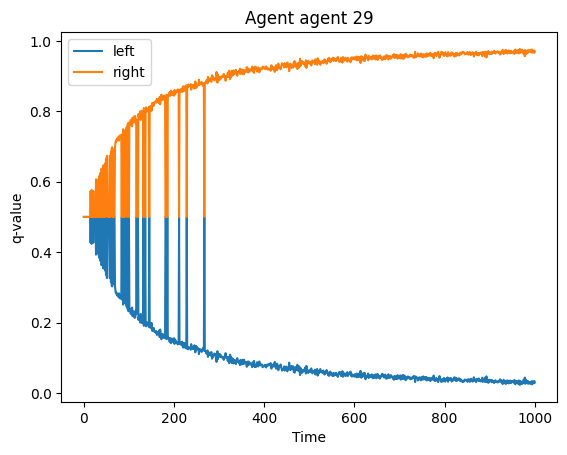

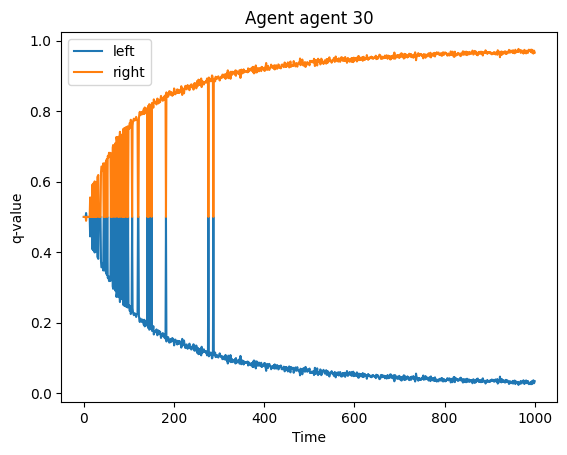

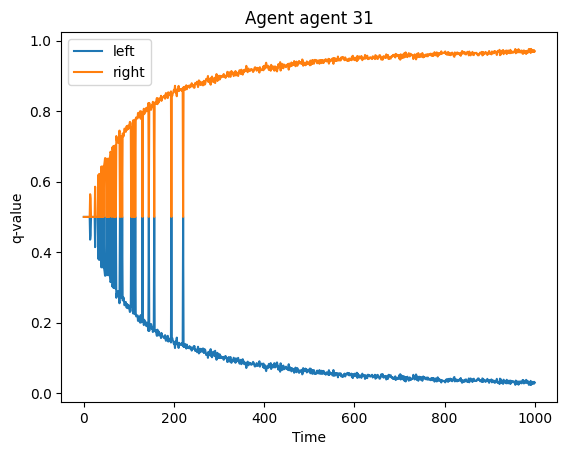

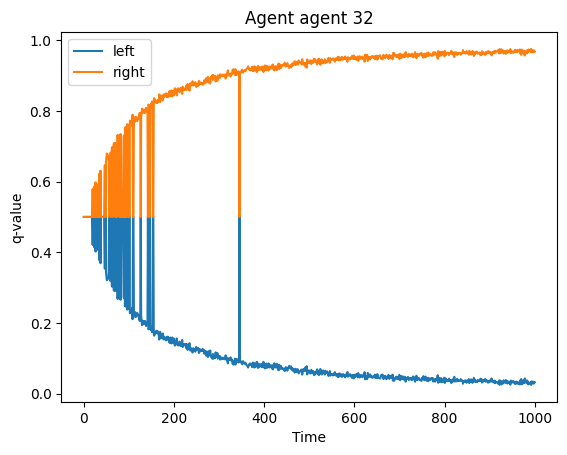

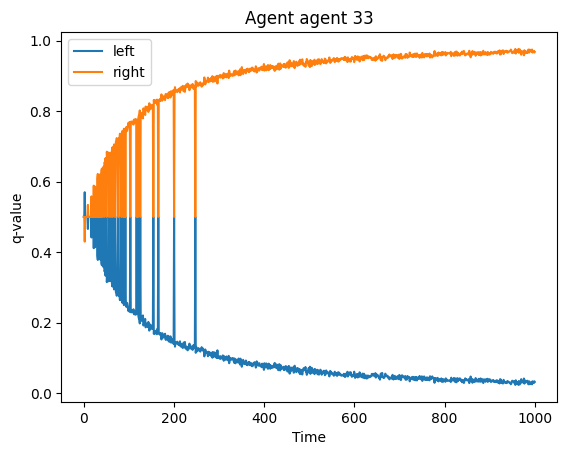

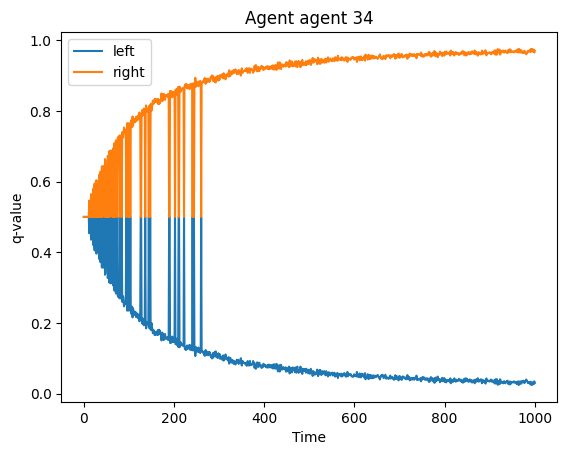

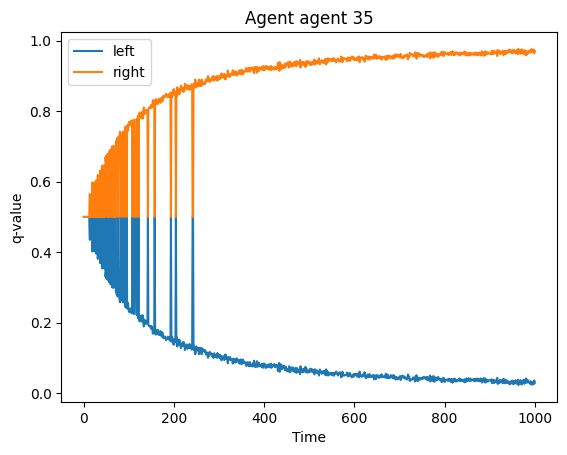

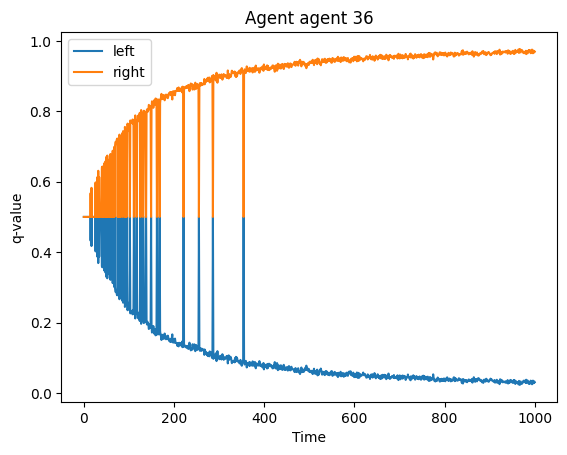

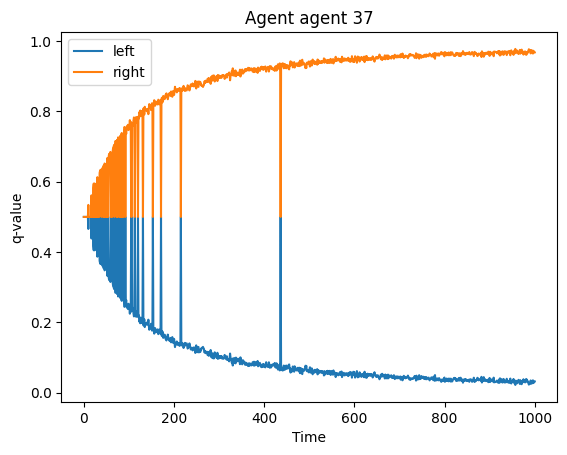

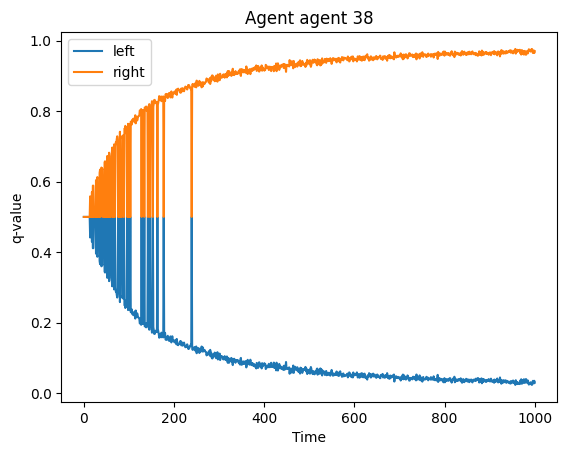

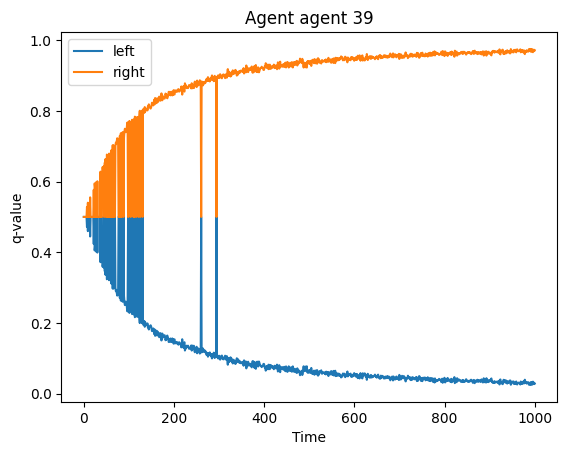

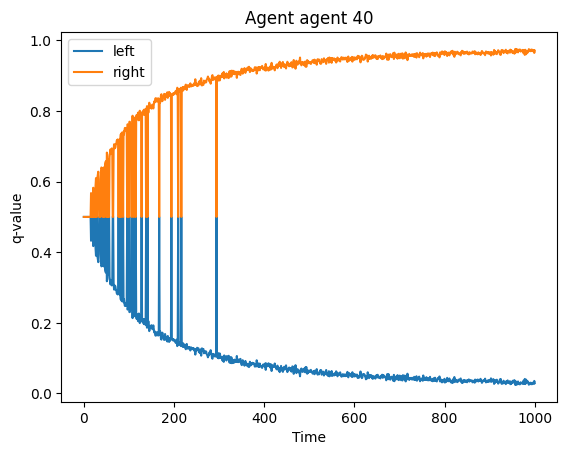

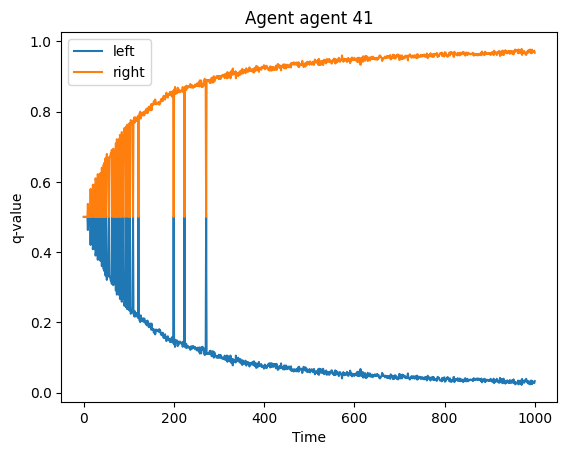

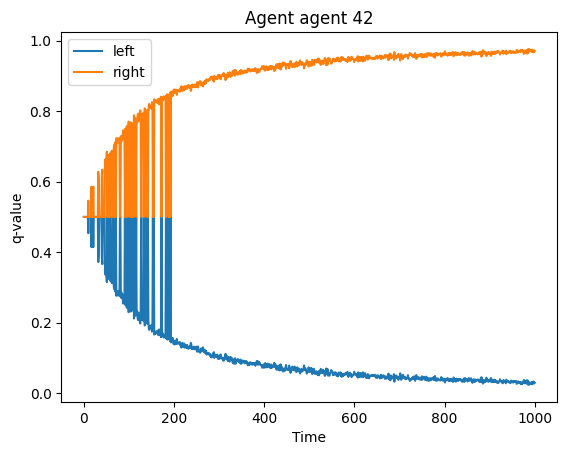

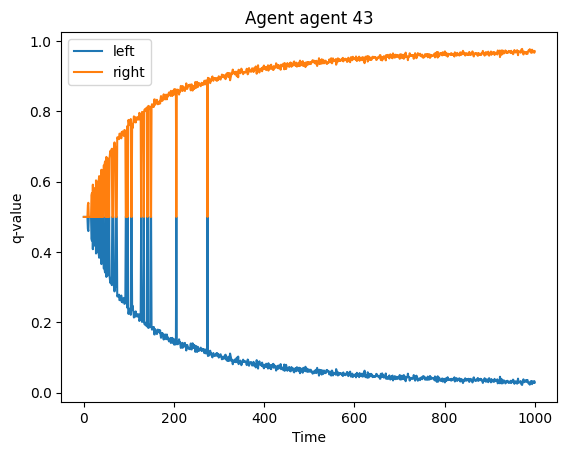

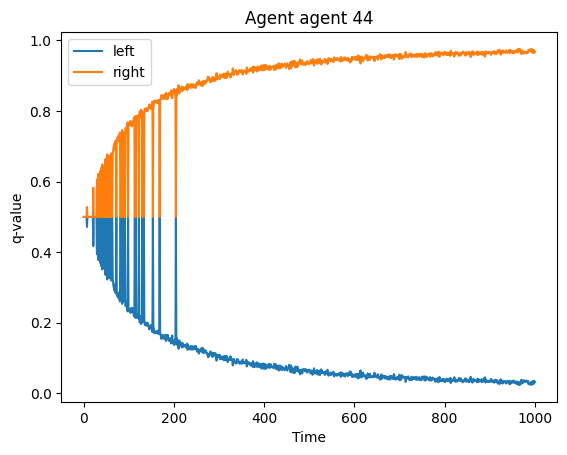

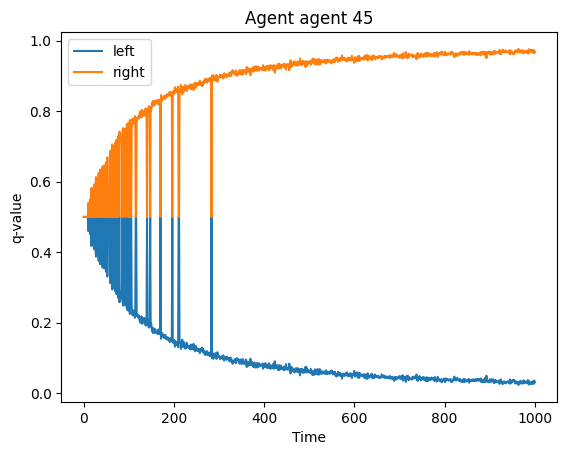

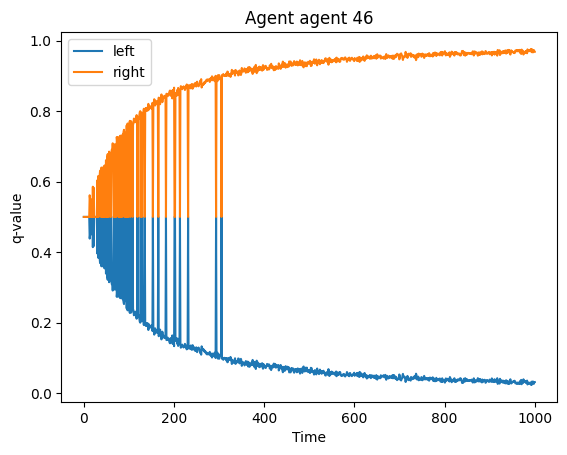

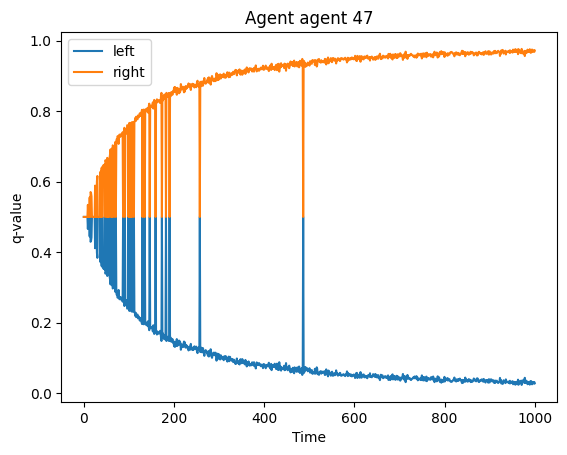

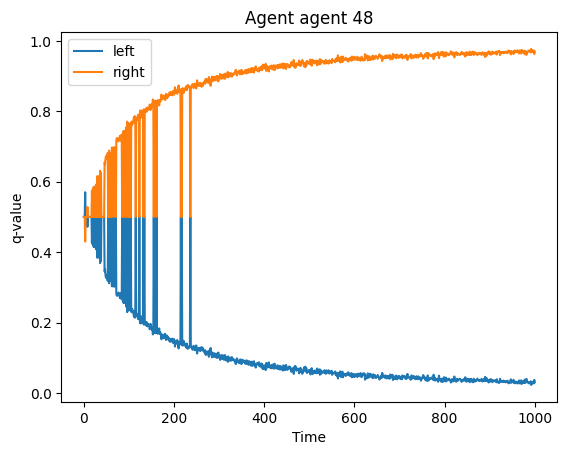

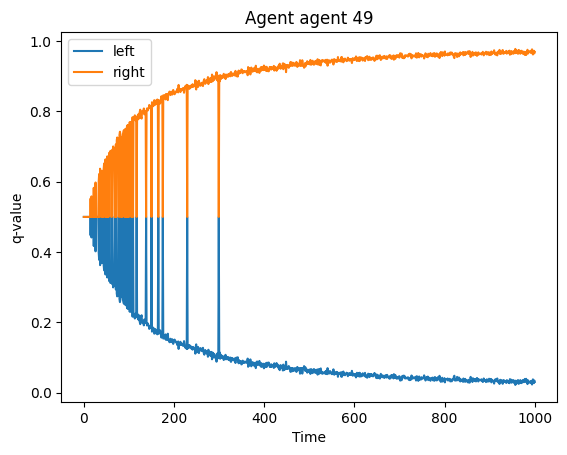

In [51]:
for a in range(0,num_agents):
    qifig=plt.figure()
    plt.plot(time, ql[a], label='left')
    plt.plot(time,qr[a], label='right')
    plt.xlabel('Time')
    plt.ylabel('q-value')
    plt.title(f'Agent agent {a}')
    plt.legend()
    filename = f'/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/q_agent_{a}'
    qifig.savefig(filename)
    plt.show()

In [52]:
f = gzip.GzipFile(map_history_path, "r")
a = np.load(f)

In [53]:
a.shape  #1000 iterations, 100 nodes

(1000, 10000, 1)

In [54]:
len(a[1]) #a[i] gives the number of agents at each node at iteration i

10000

In [55]:
#calculate entropy of state at each iteration:

#want to sum over all nodes plog(p) where p= no of agents on a node/total number of agents 
#update code to also save rewards and then can compare how cumulative rewards correspond to system entropy

def sys_entropy(state_map, agent_num):    #input map representation of system
    
    node_ent = []
    
    for node in range(0, len(state_map)):
        
        if state_map[node] != 0:  #log(0) undefined
        
            ent = state_map[node]/agent_num * np.log(state_map[node]/agent_num)
            node_ent.append(ent)
        
    state_ent = np.sum(node_ent)
    return state_ent  

In [56]:
sys_entropy(a[1],num_agents)

system_entropy = []

for i in range(0,iterations):
    
    sys_ent = sys_entropy(a[i],num_agents)
    system_entropy.append(sys_ent)

In [57]:
#system_entropy

In [58]:
#plot agent trajectories over time - better to do this from map representation or agent-node trajectories?
G = nx.cycle_graph(10000)
node_pos = nx.circular_layout(G)
nodes = list(G.nodes)
#print(node_pos)

In [59]:
rewards = []
with open(agent_trajectories_path, newline='') as csvfile:      #to do: sort out this saving format 
    reader = csv.reader(csvfile, delimiter=',', quotechar=',')
    for row in reader:
        rewards.append(row[3])
        #print(', '.join(row))

In [60]:
print(rewards, system_entropy)

[' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 48', ' 50', ' 48', ' 48', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50'

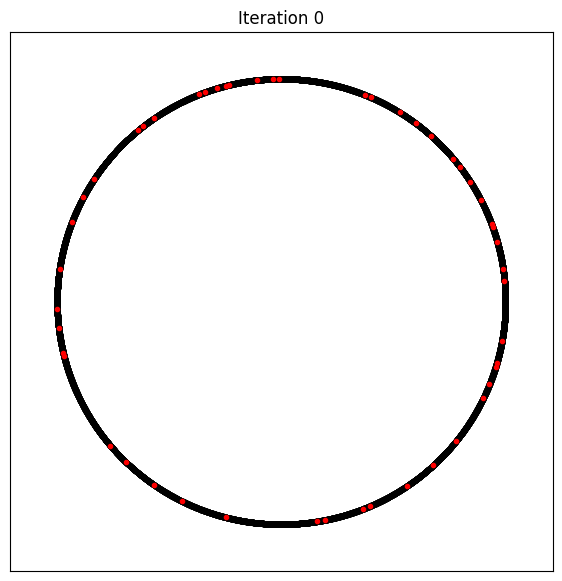

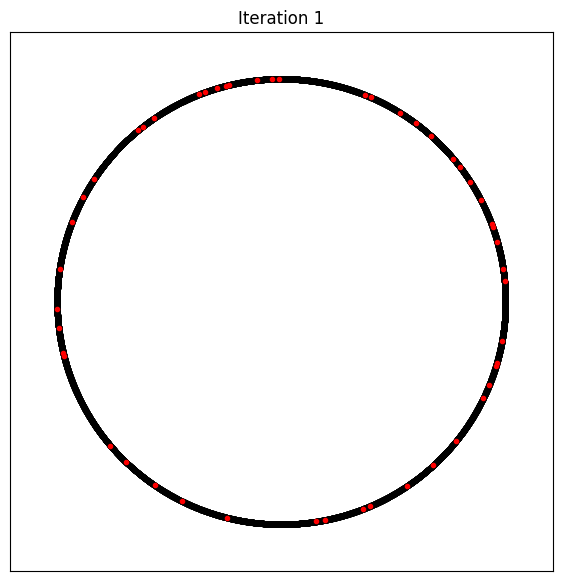

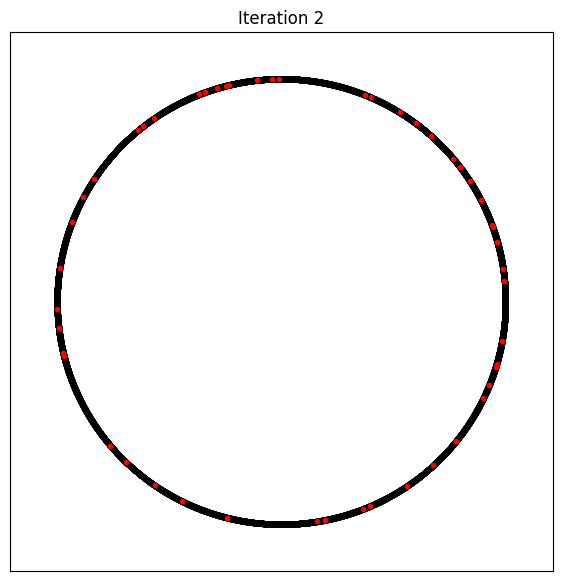

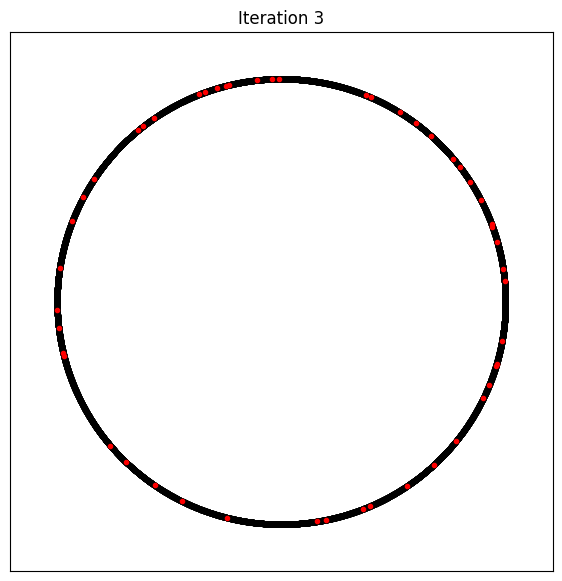

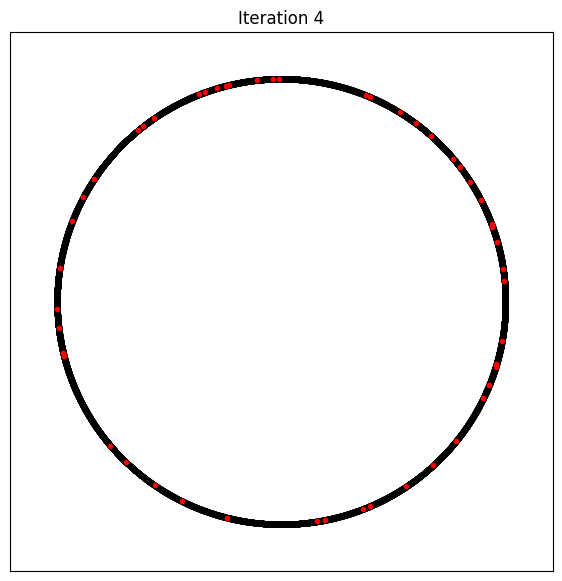

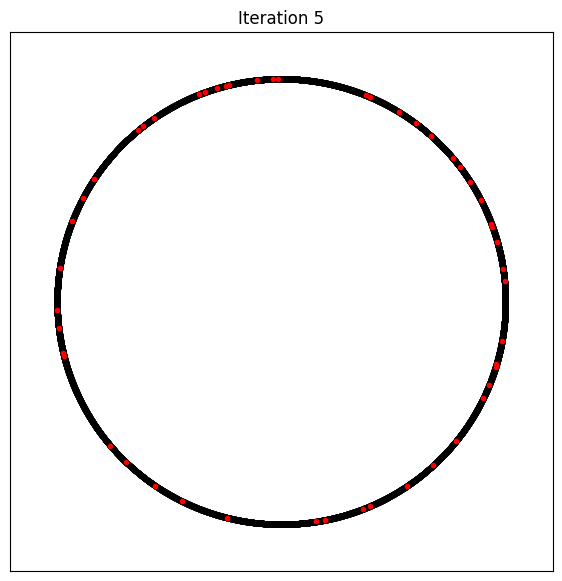

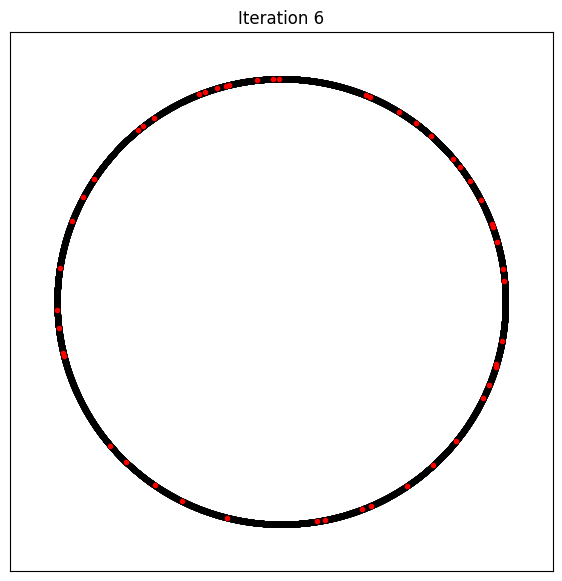

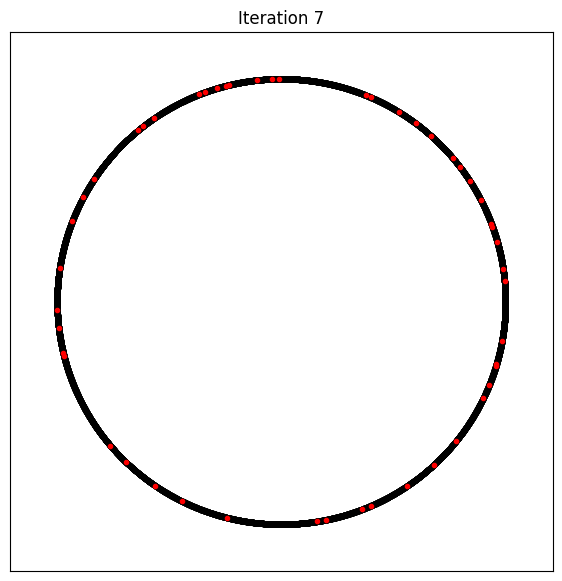

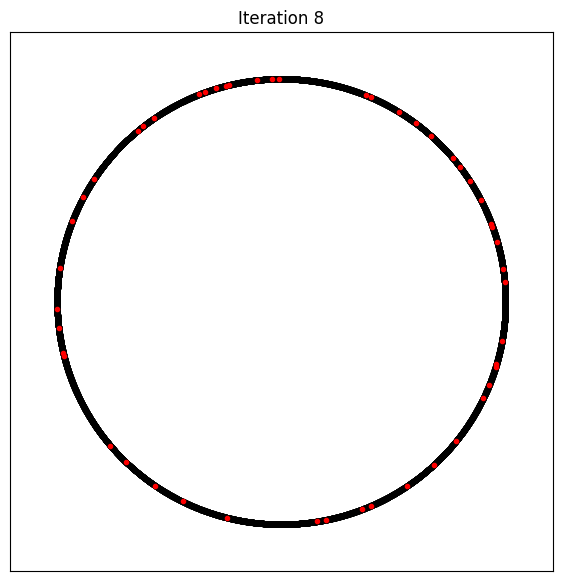

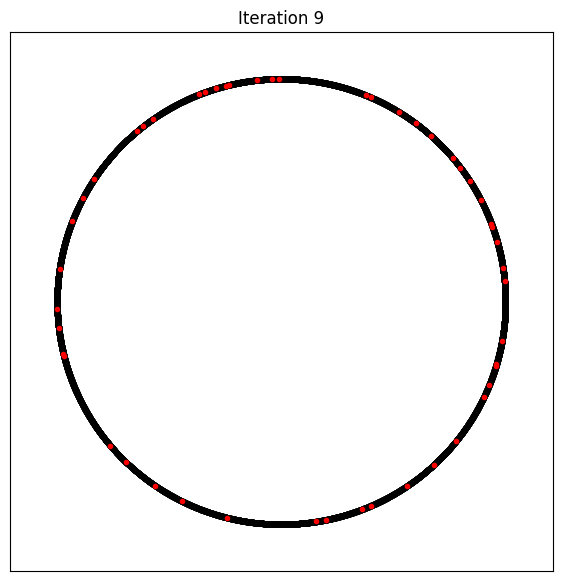

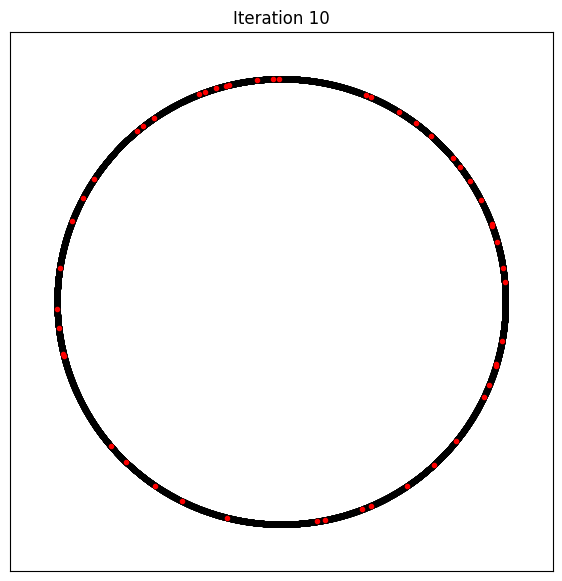

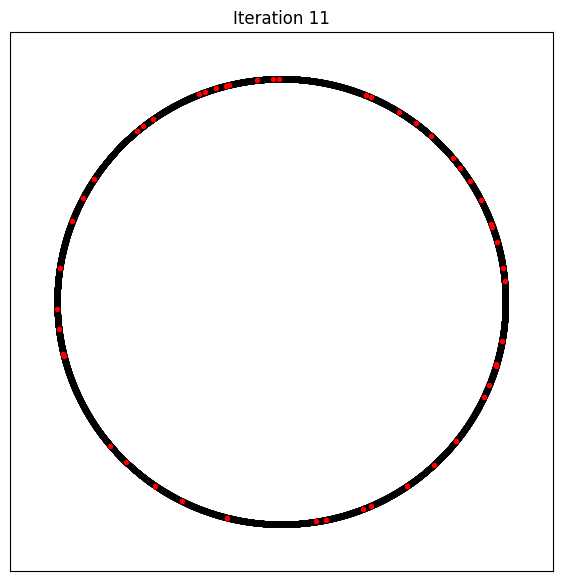

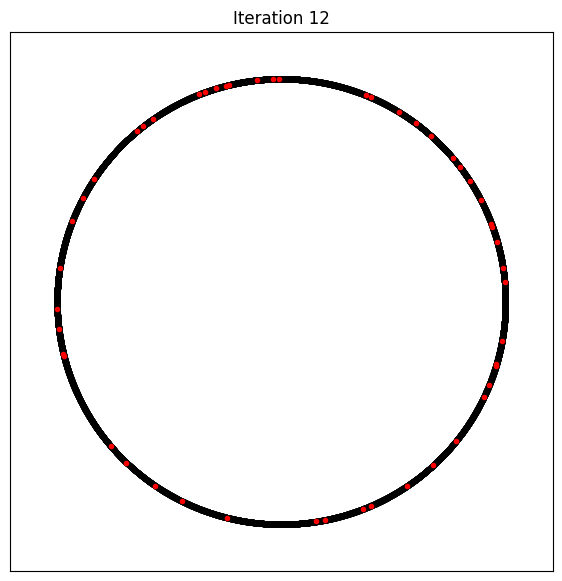

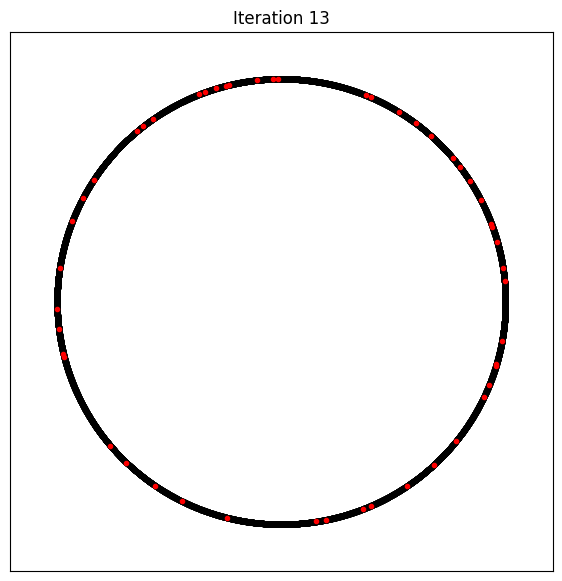

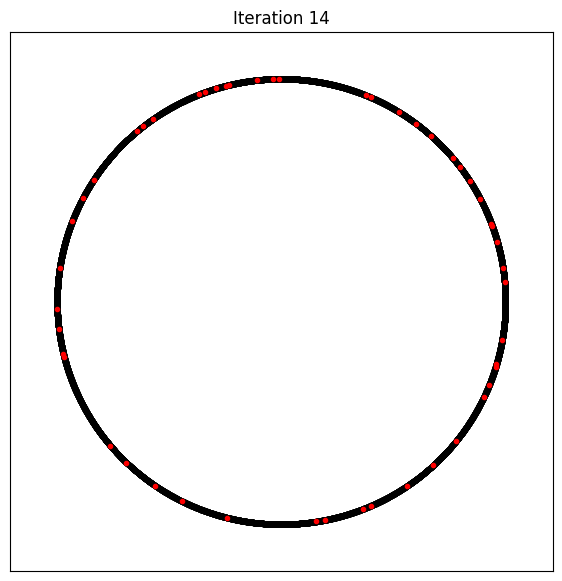

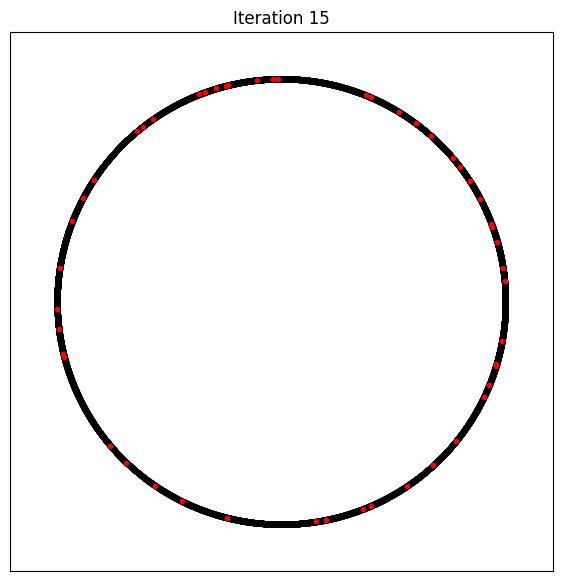

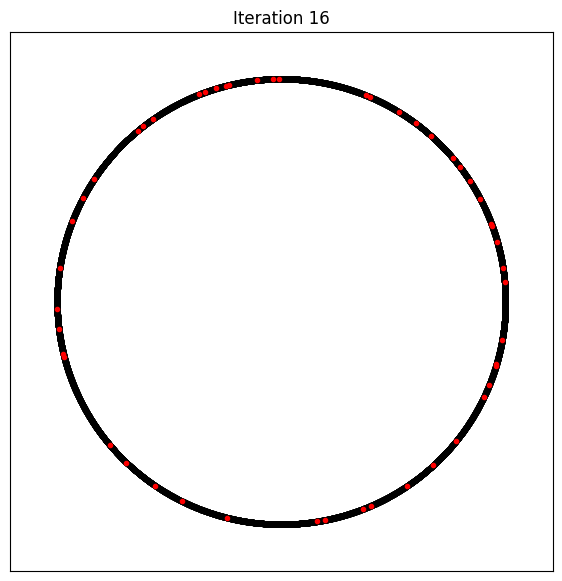

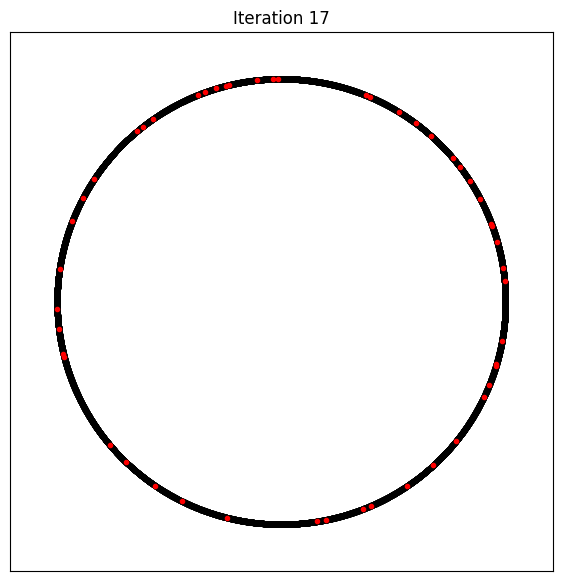

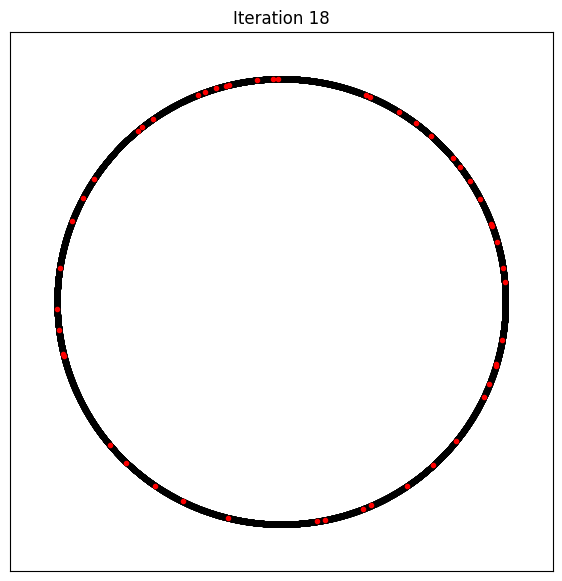

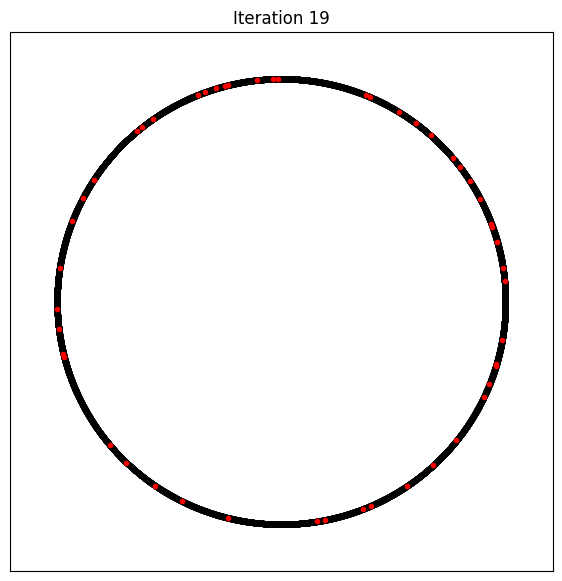

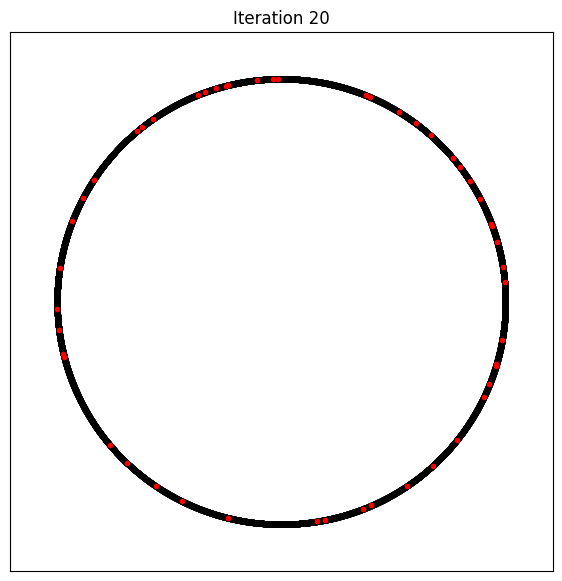

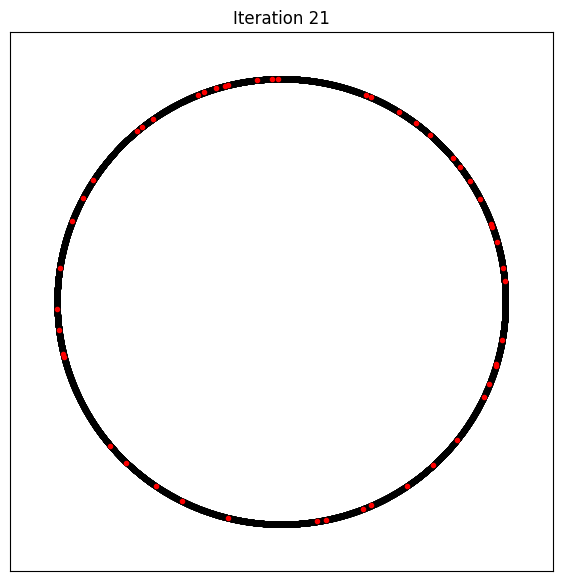

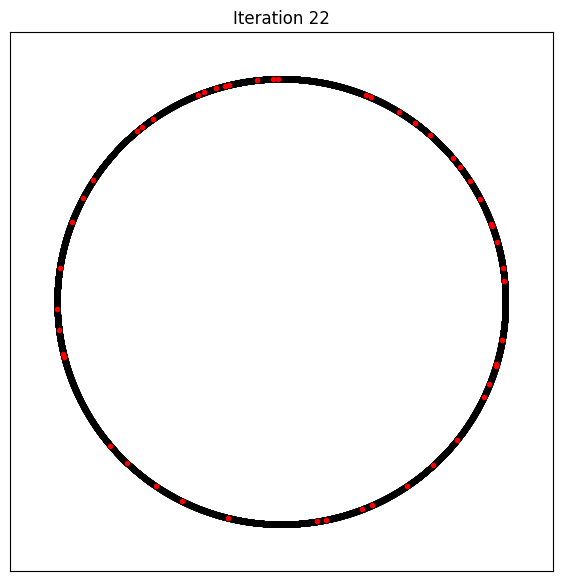

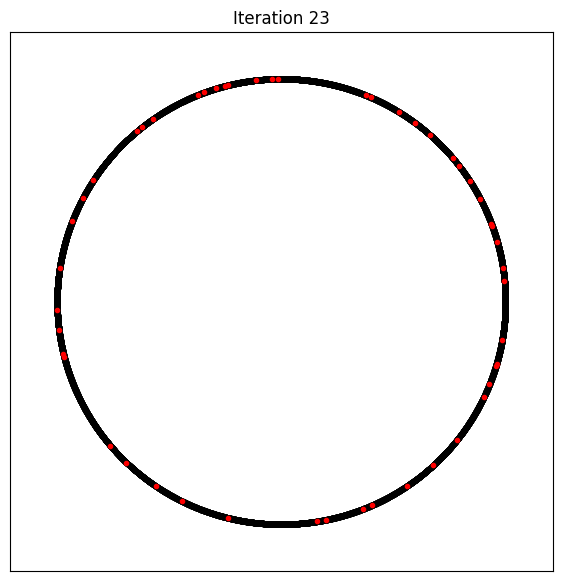

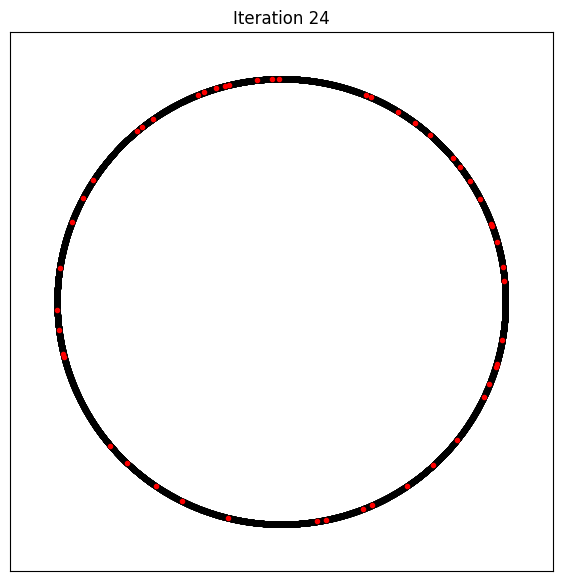

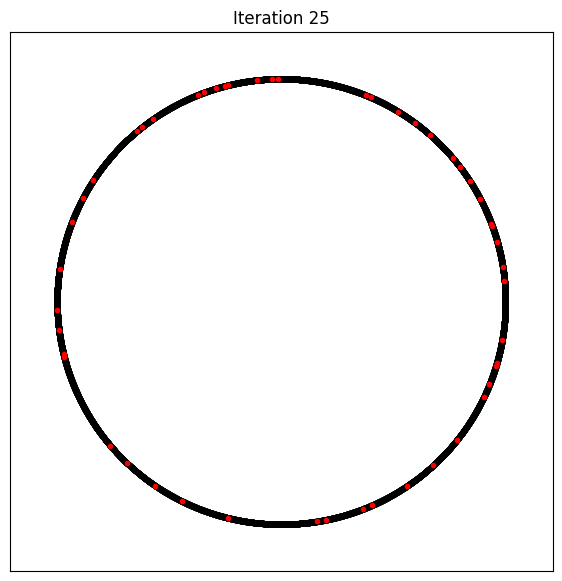

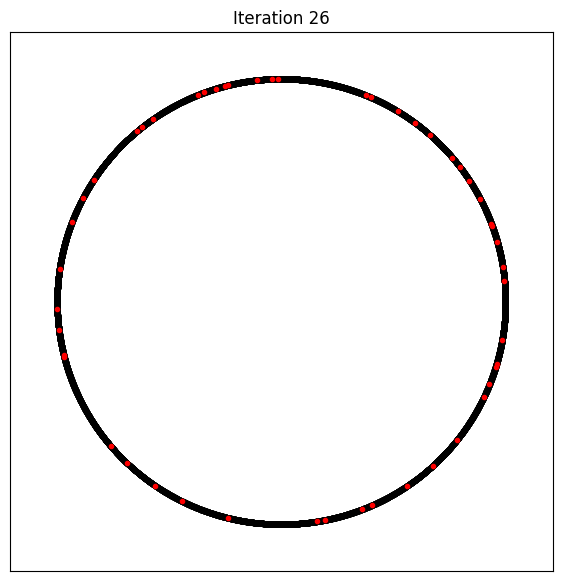

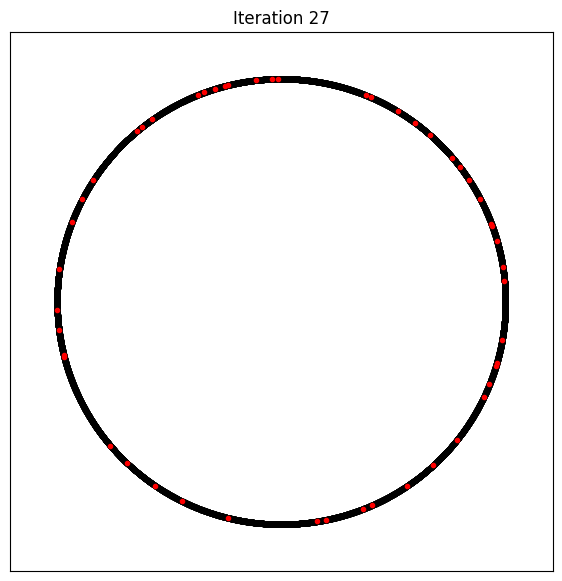

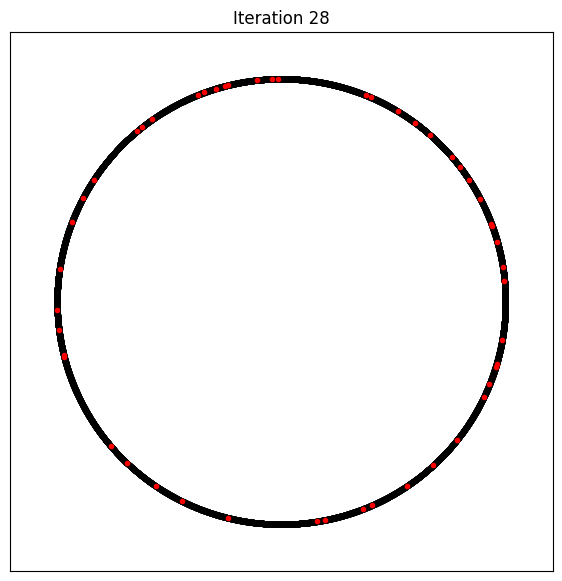

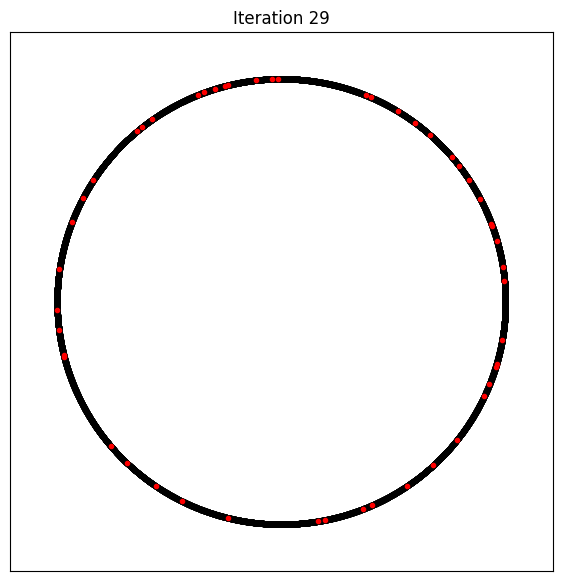

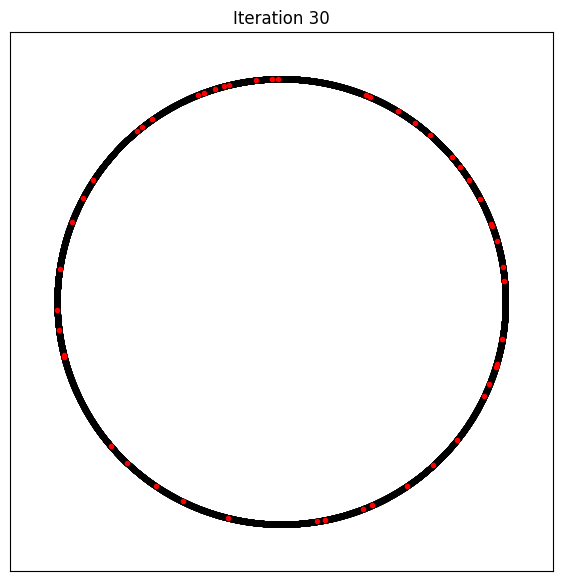

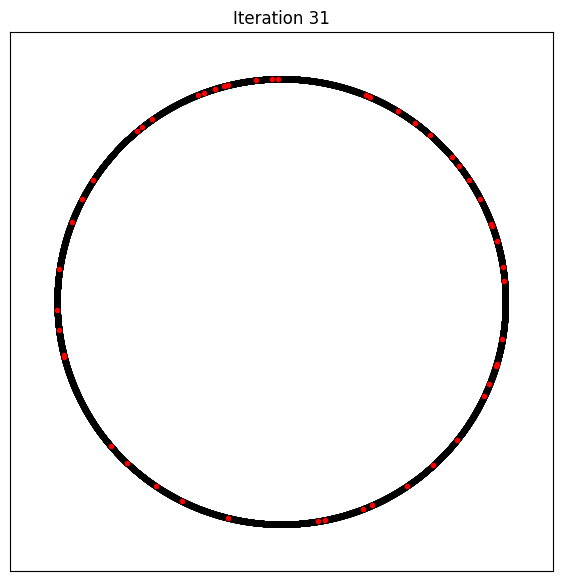

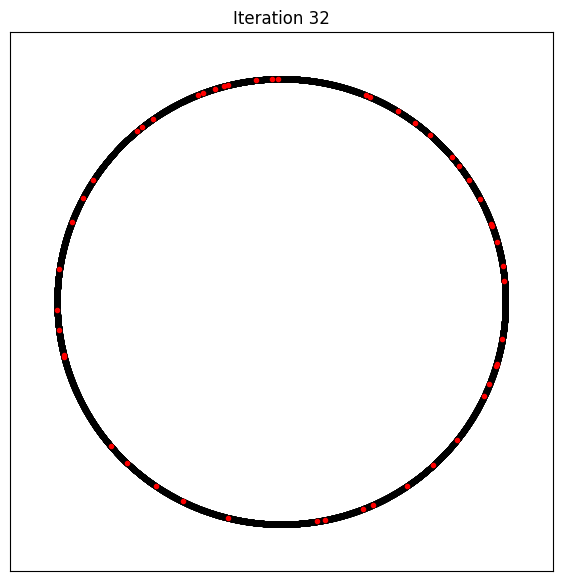

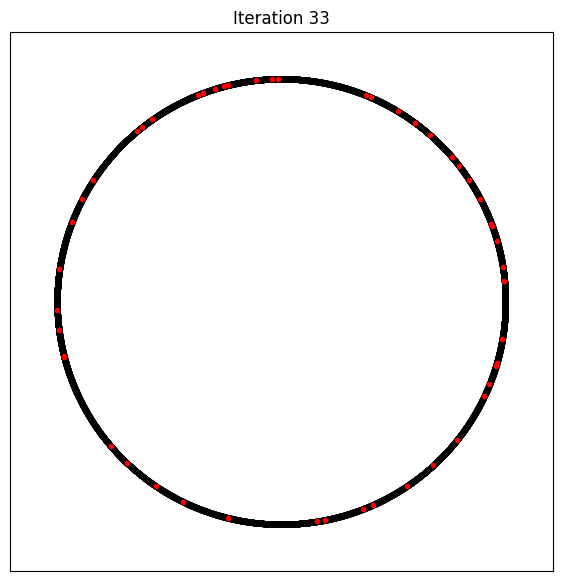

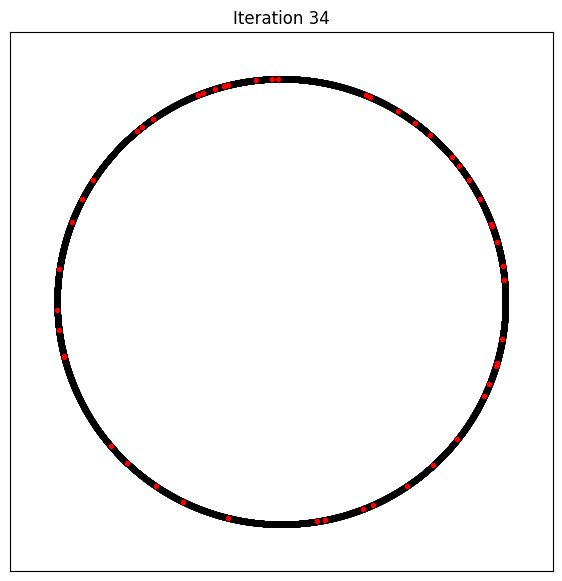

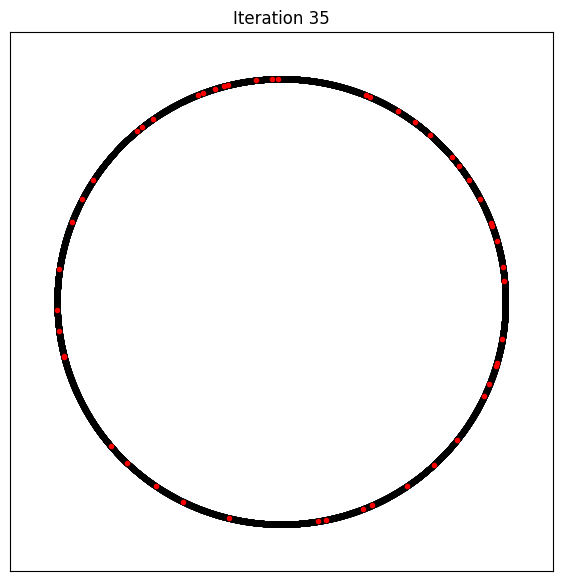

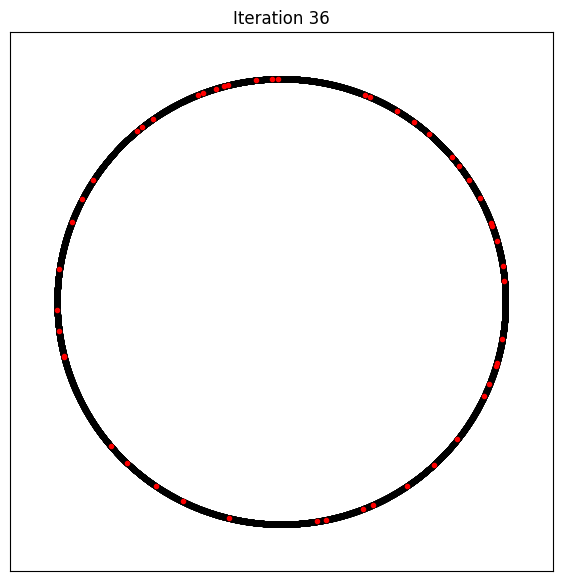

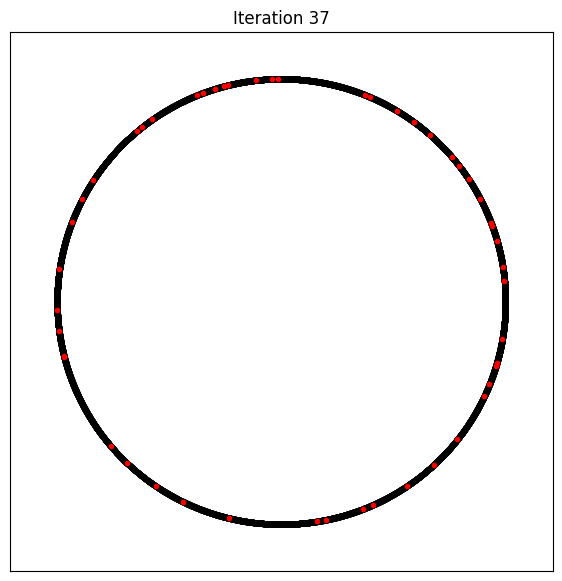

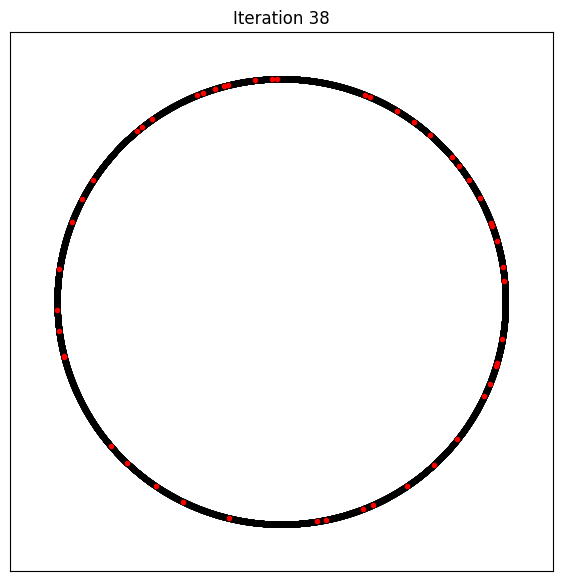

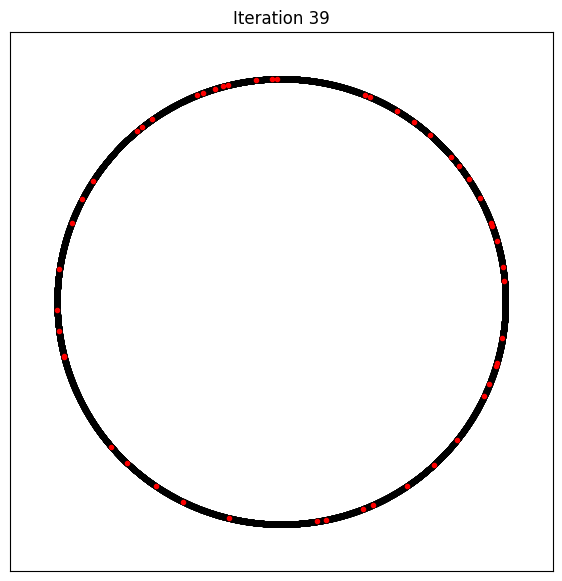

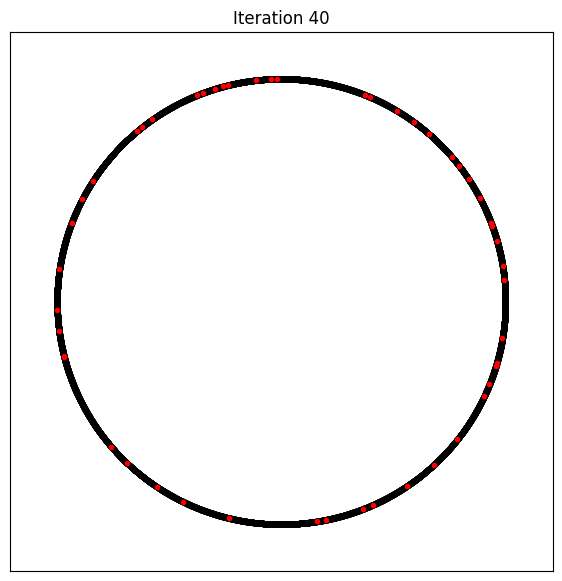

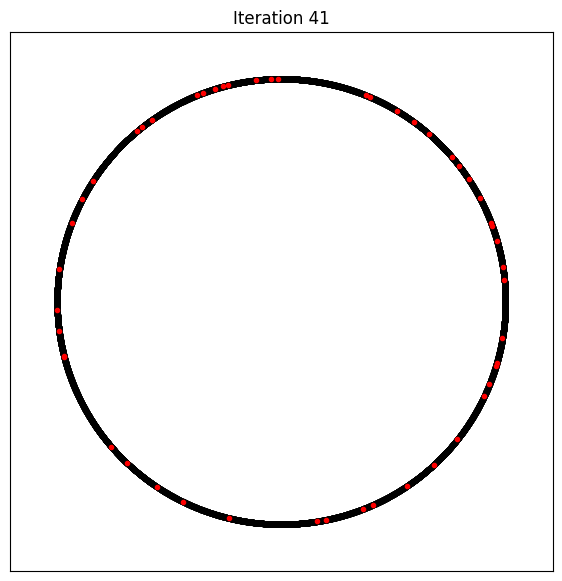

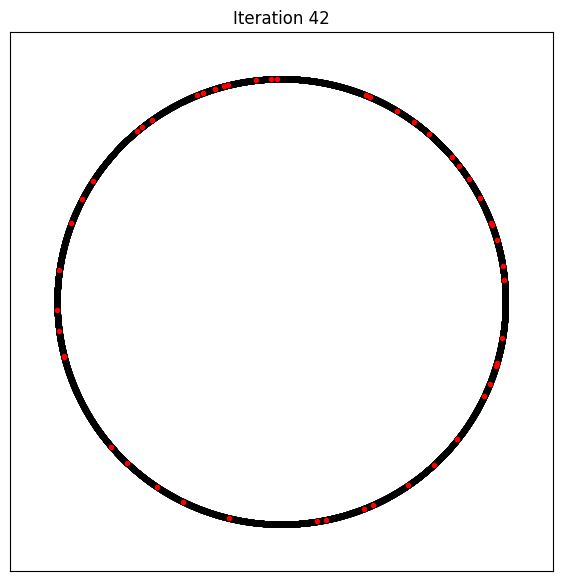

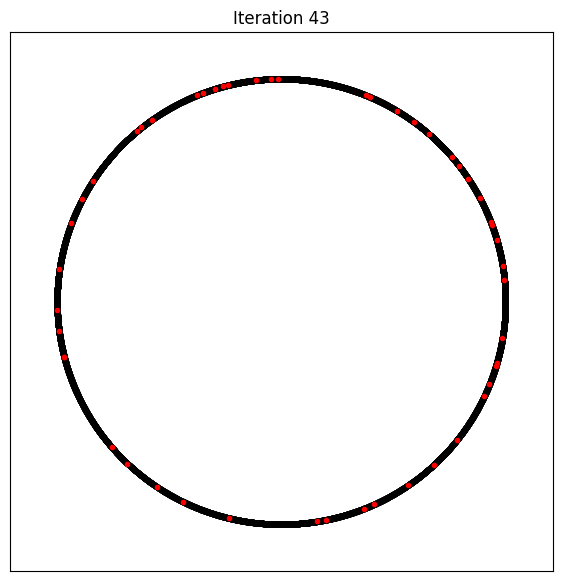

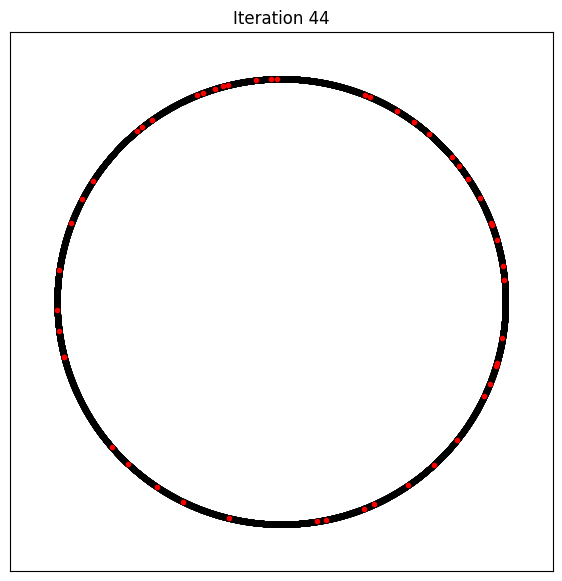

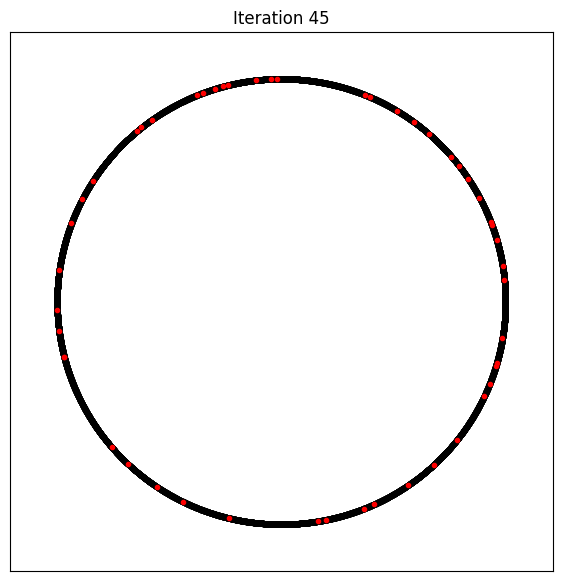

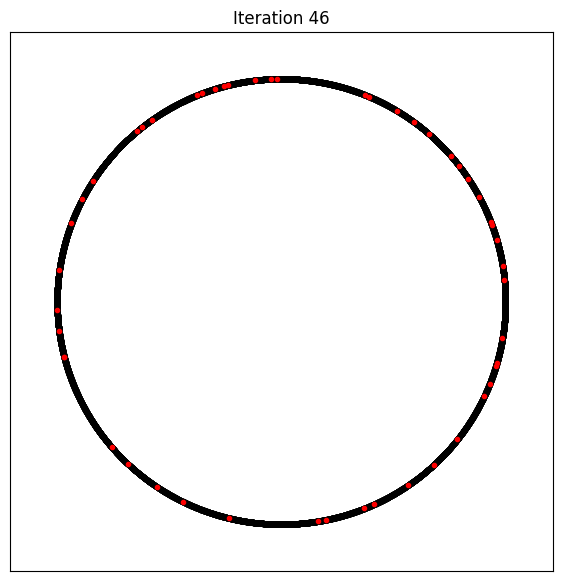

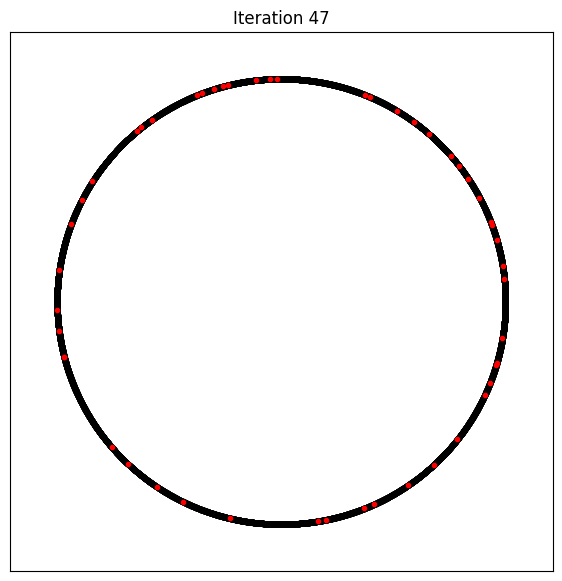

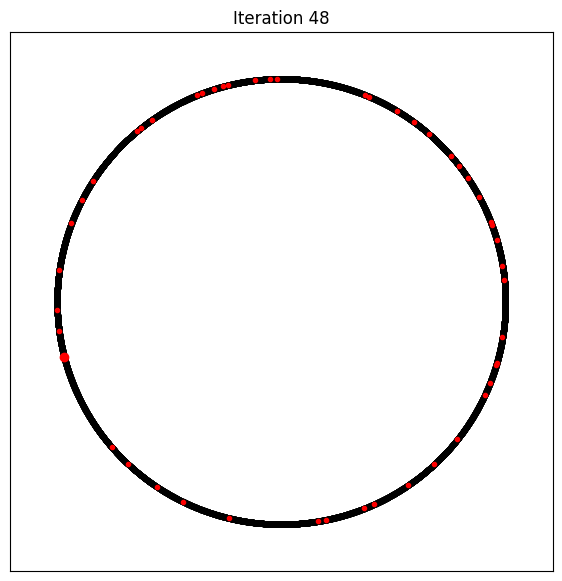

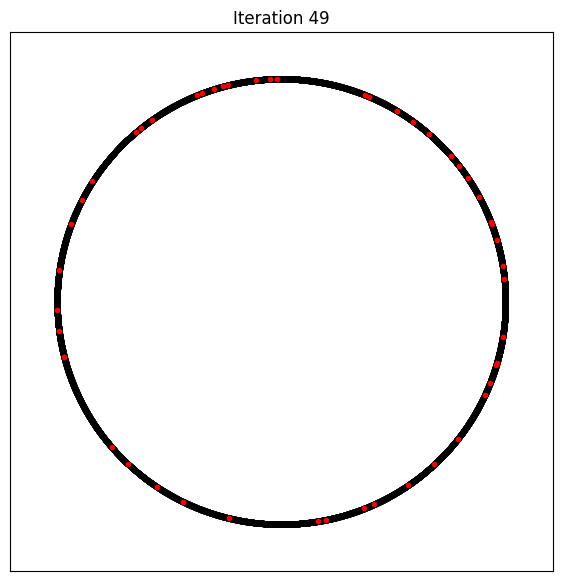

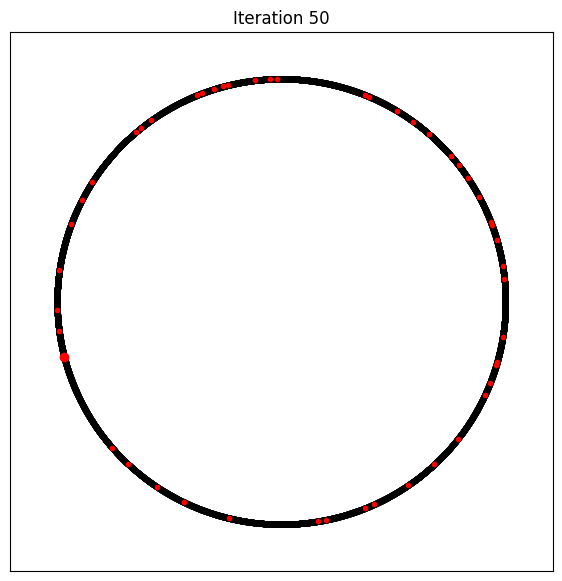

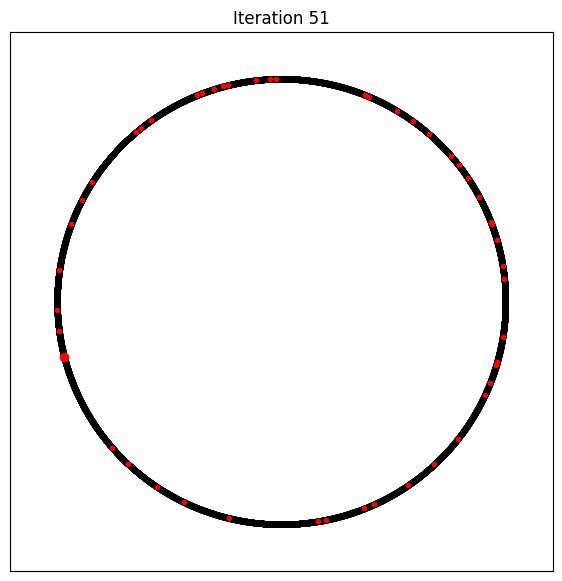

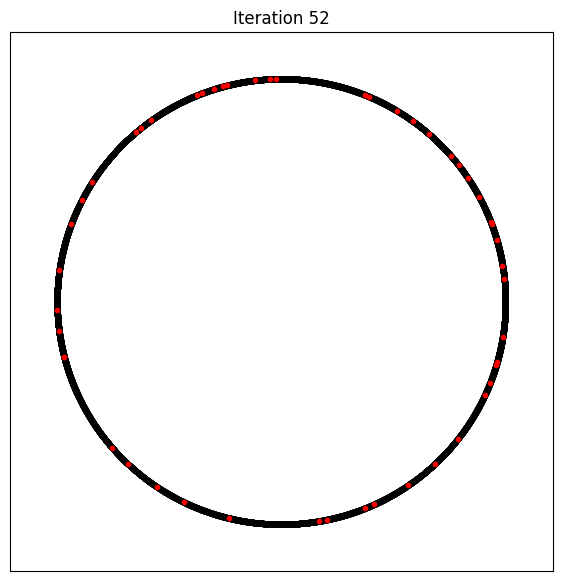

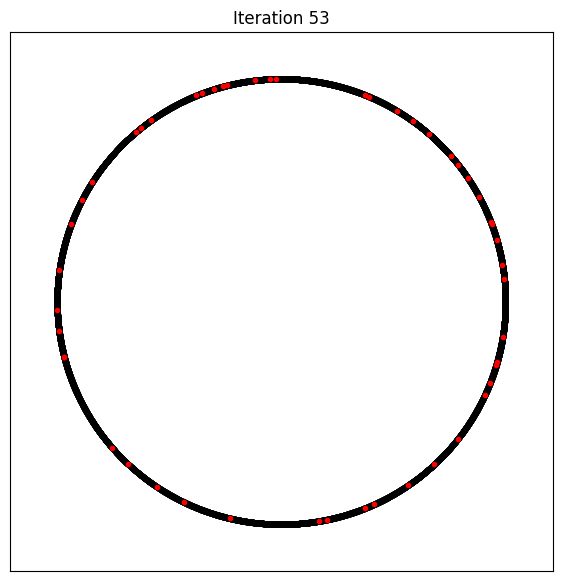

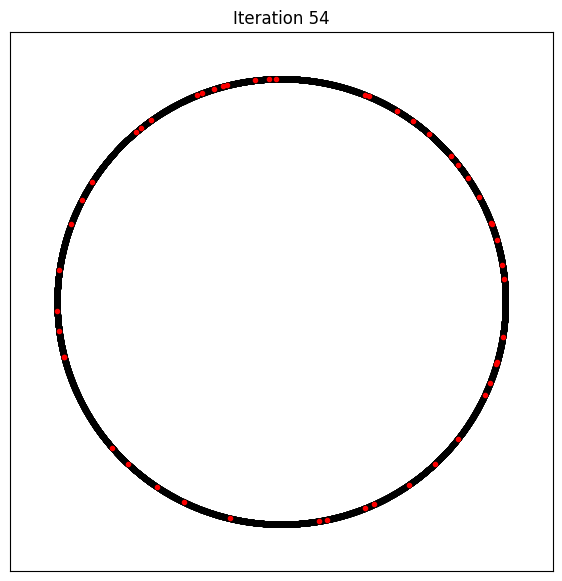

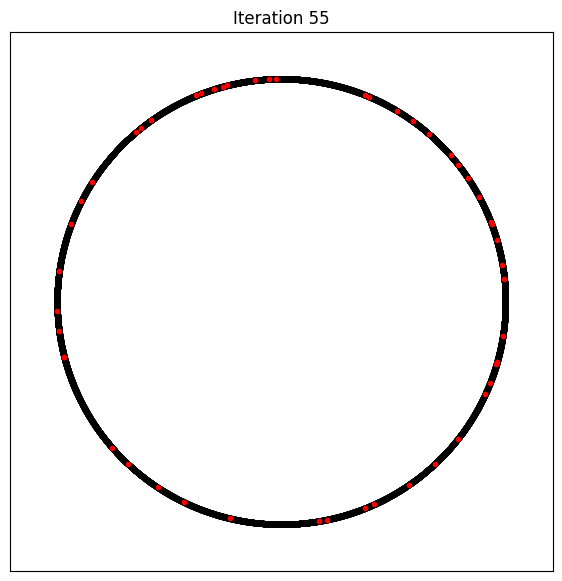

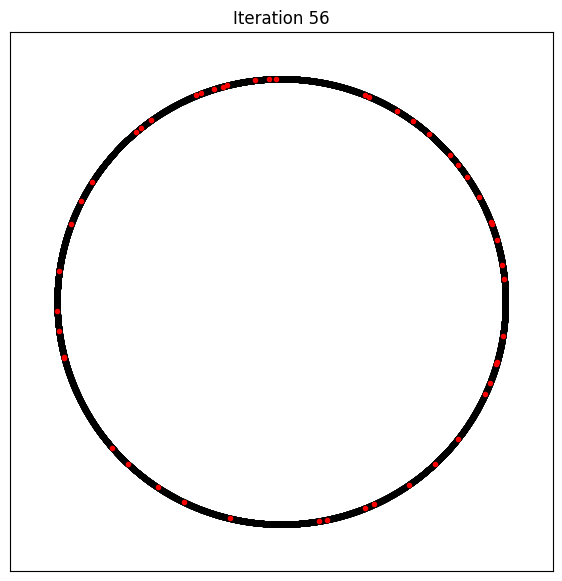

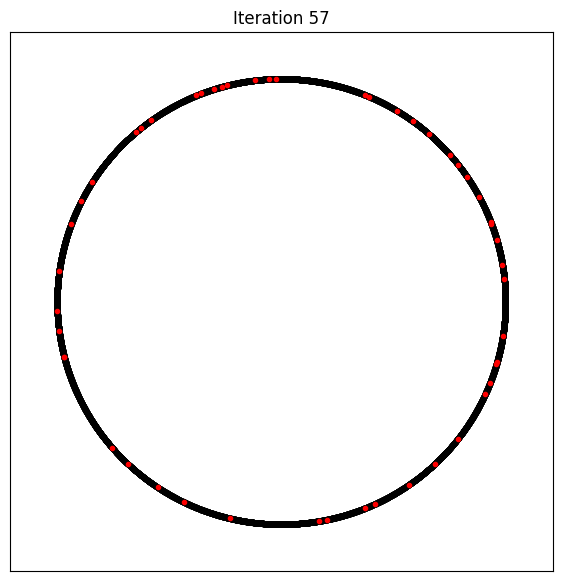

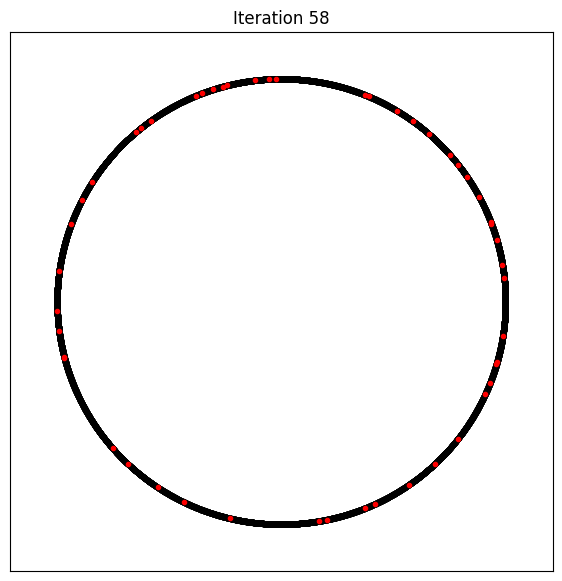

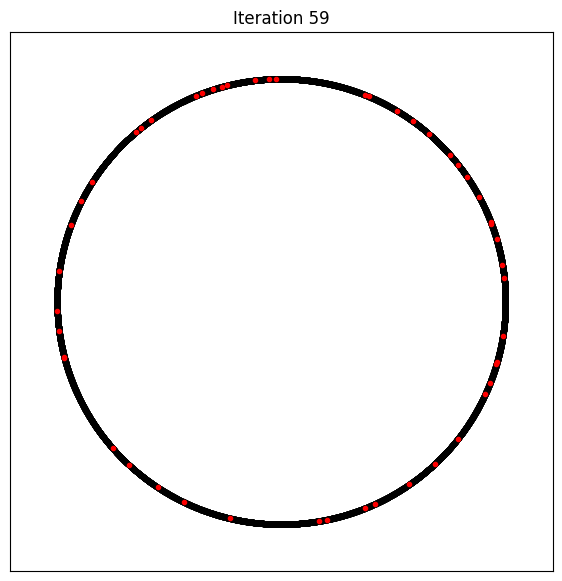

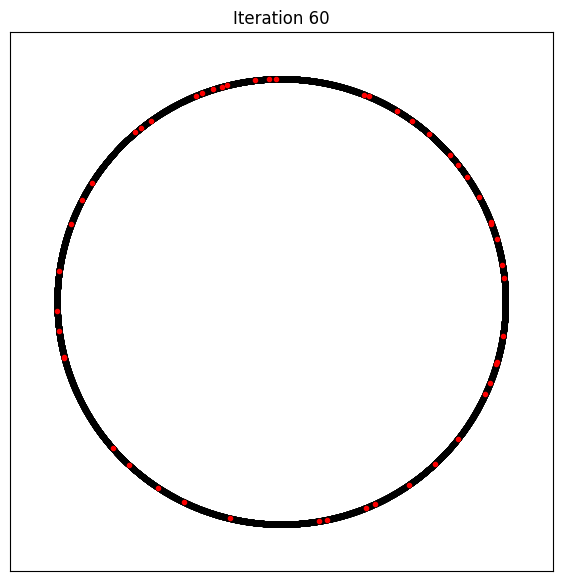

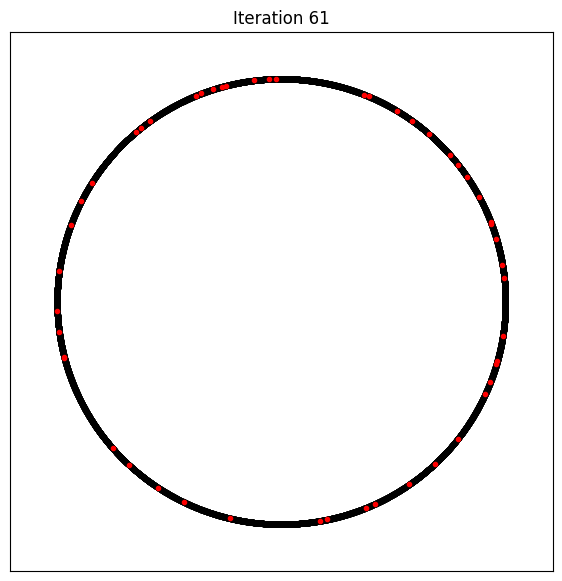

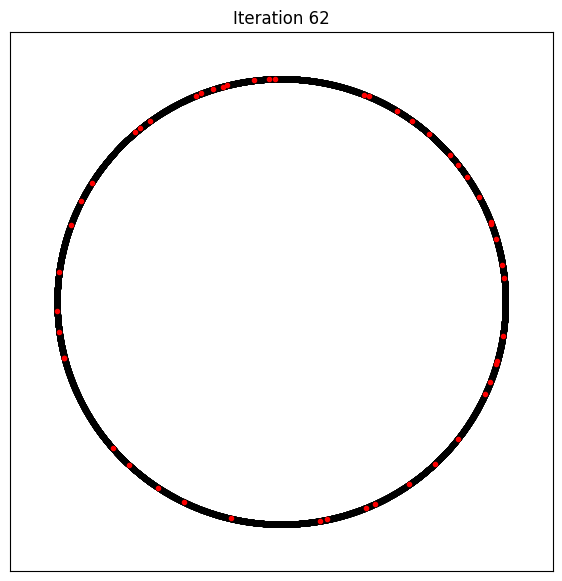

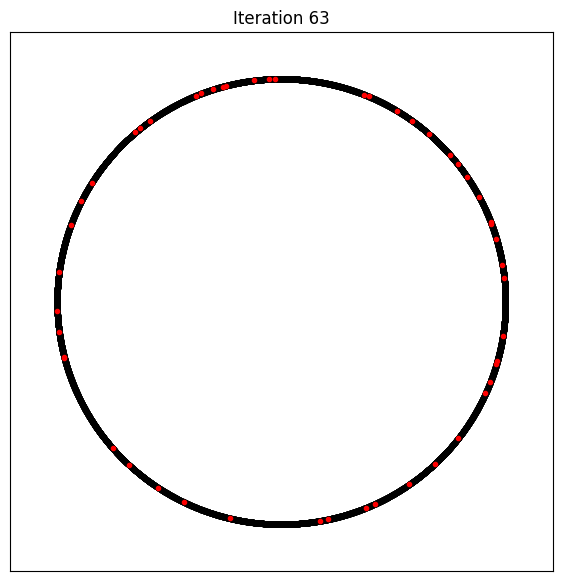

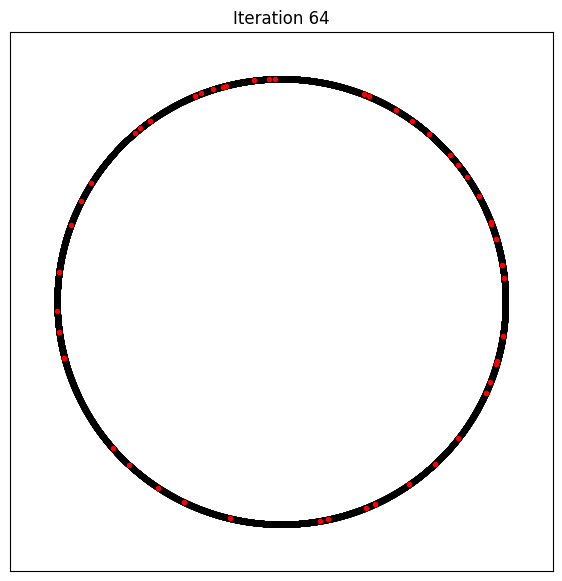

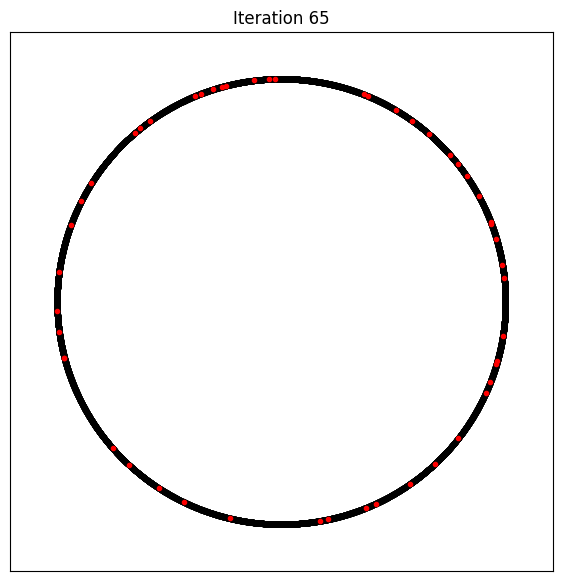

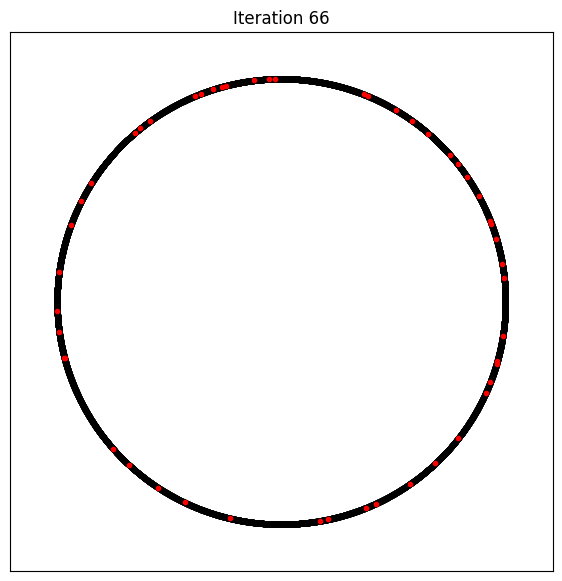

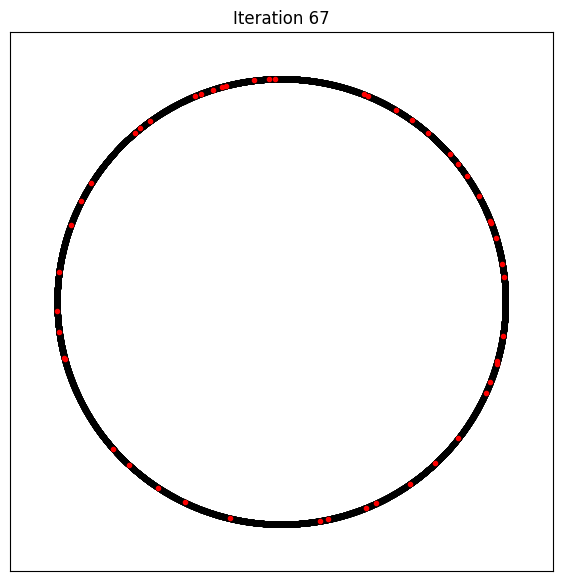

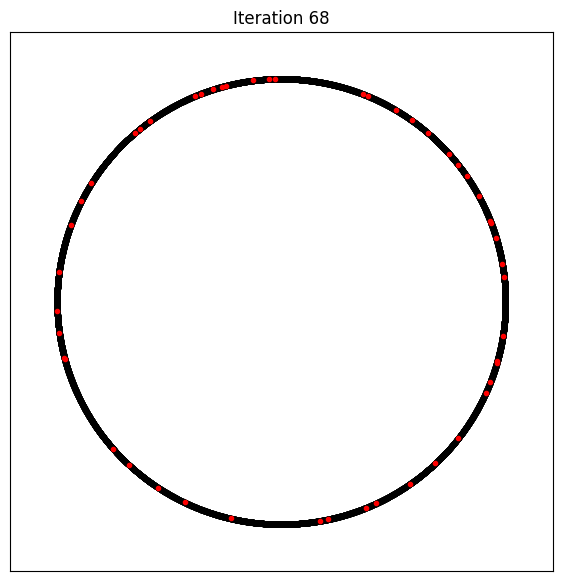

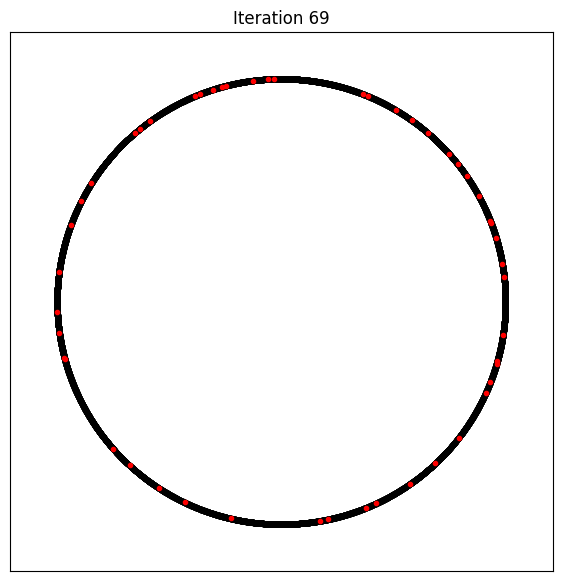

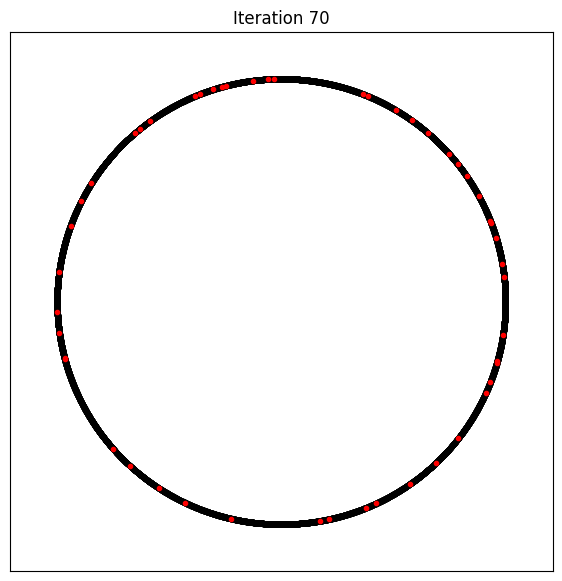

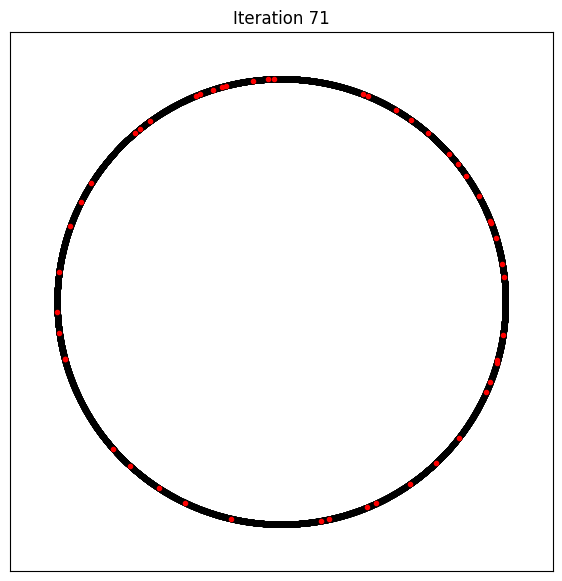

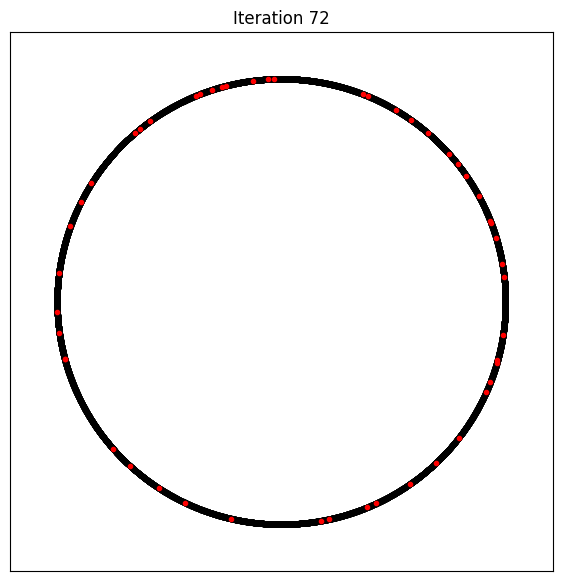

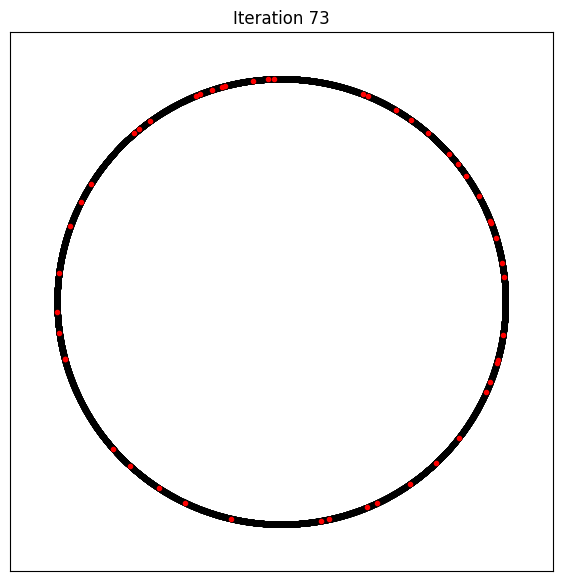

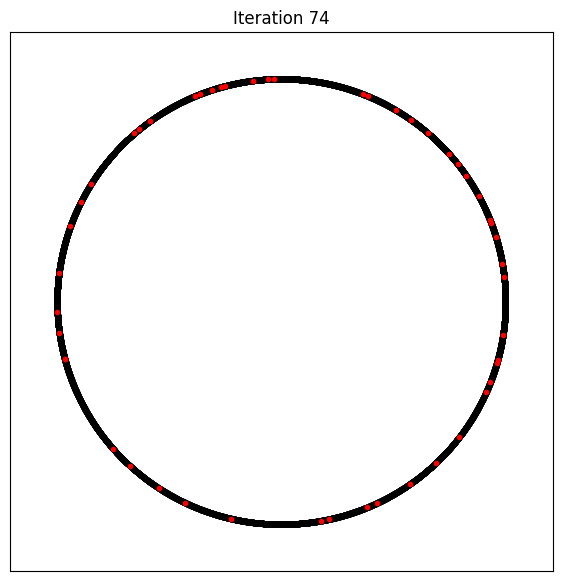

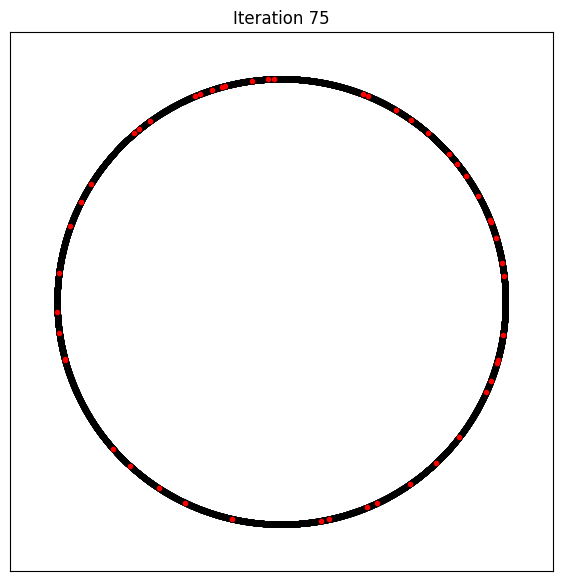

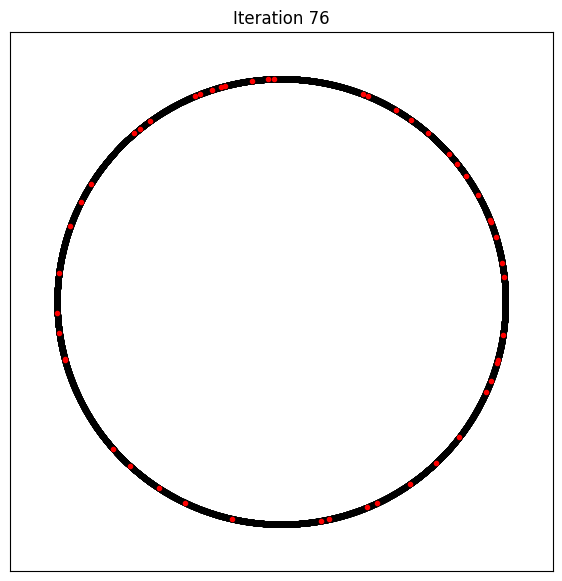

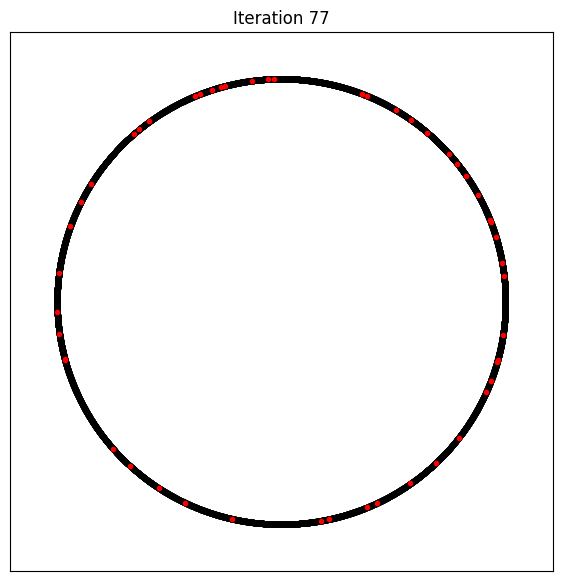

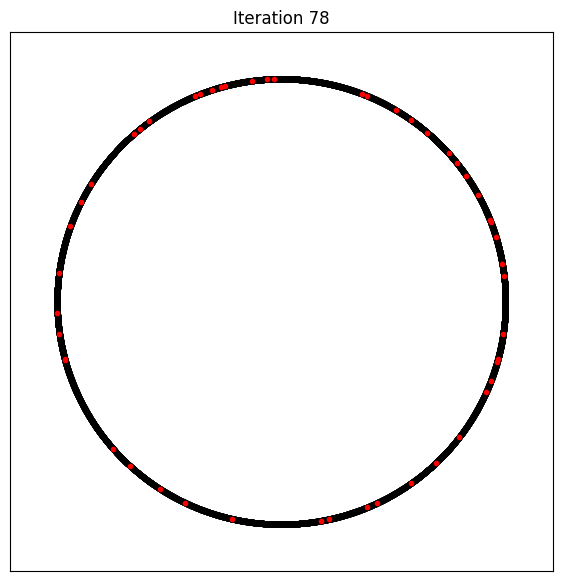

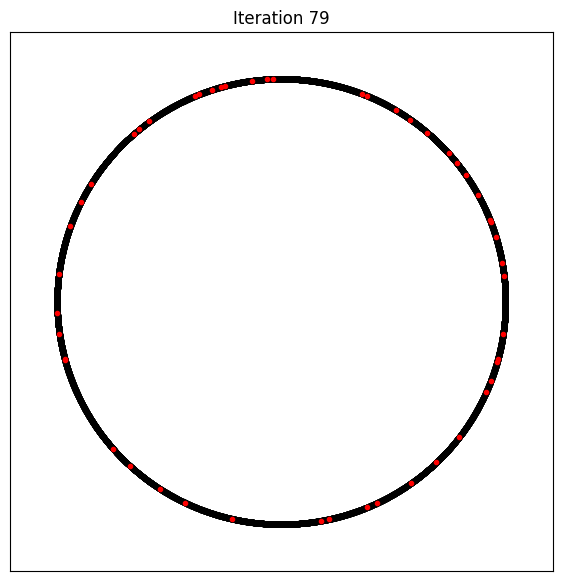

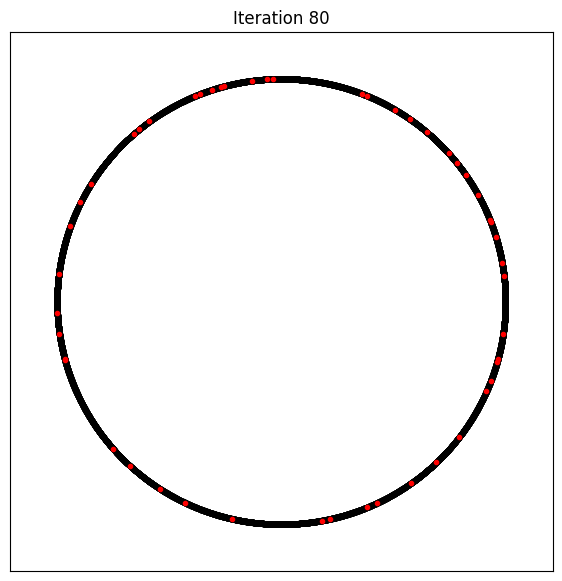

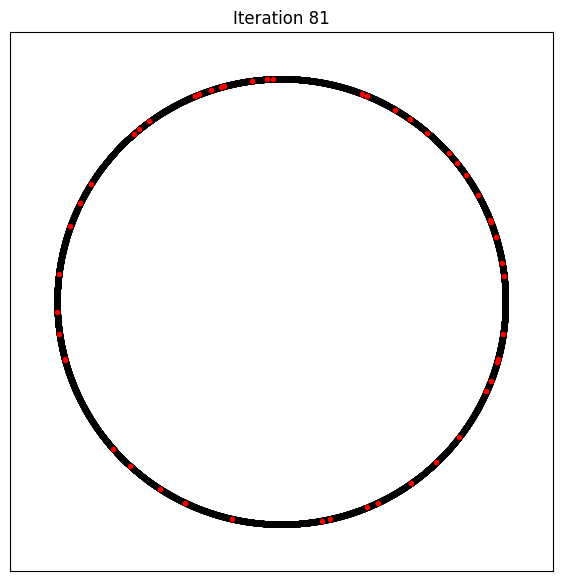

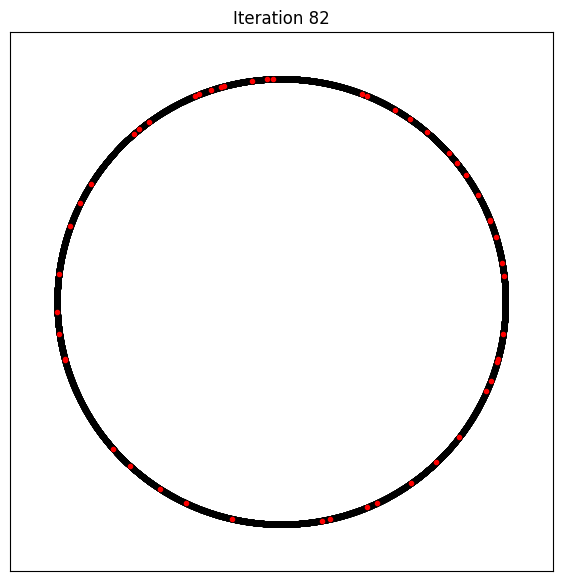

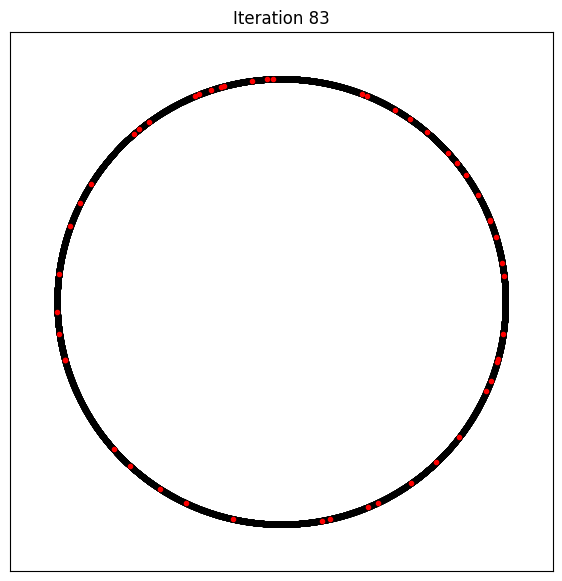

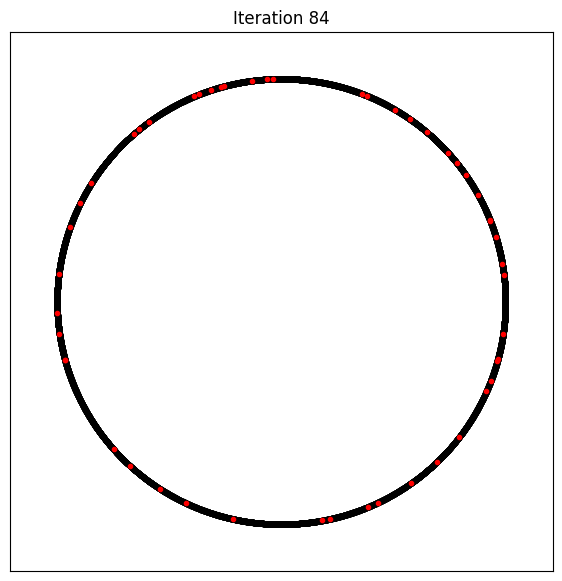

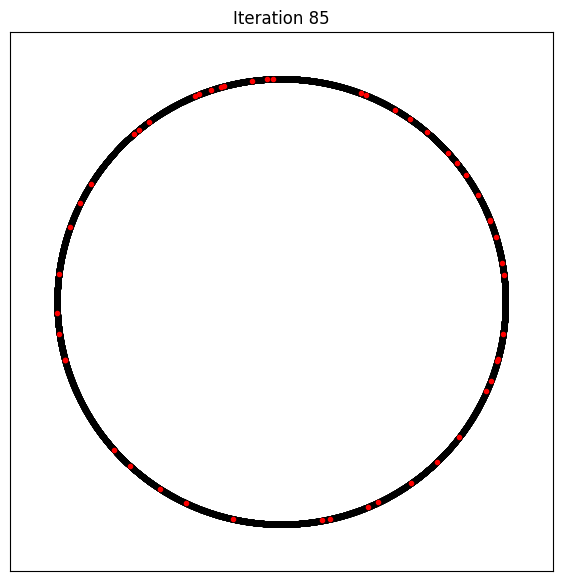

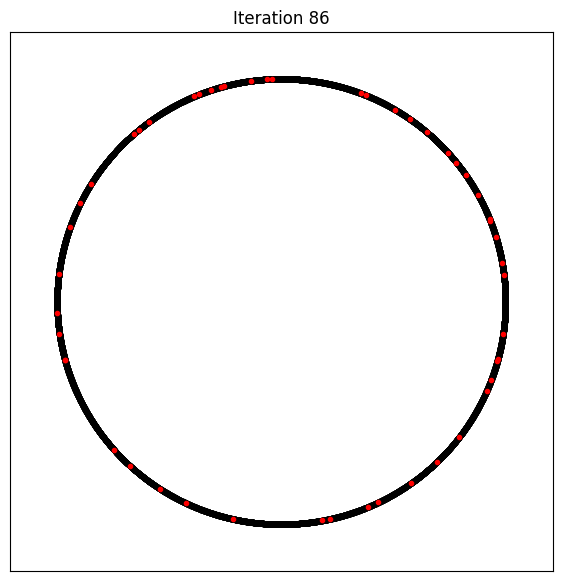

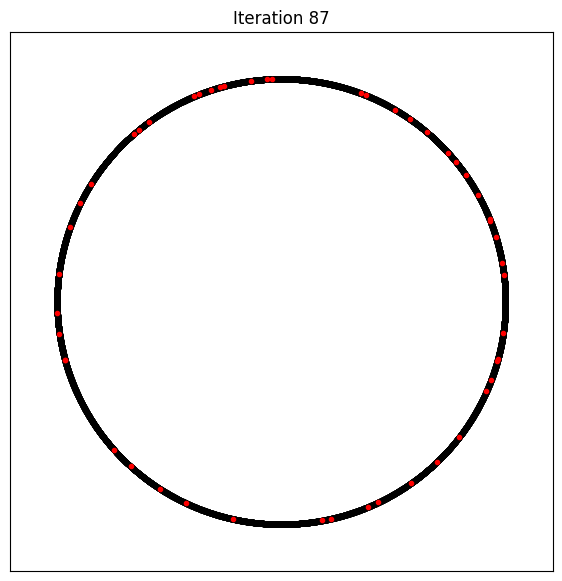

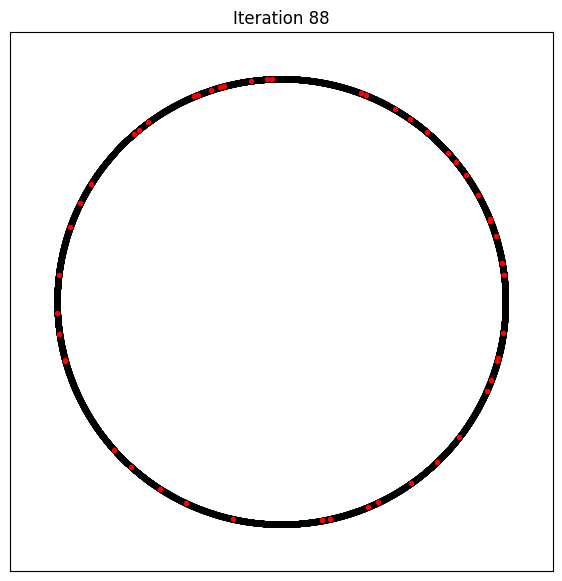

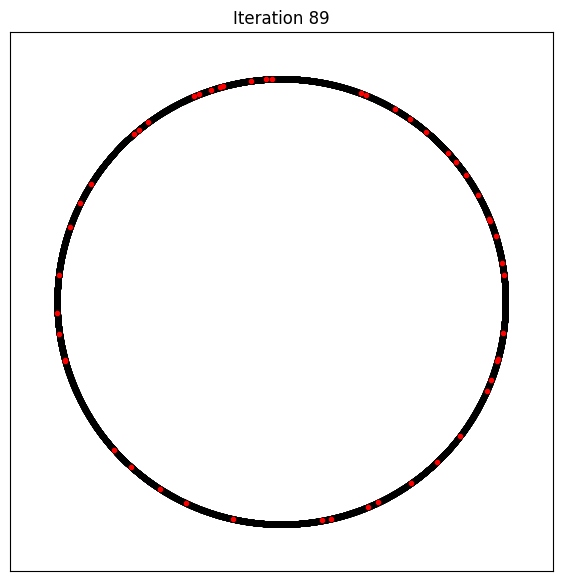

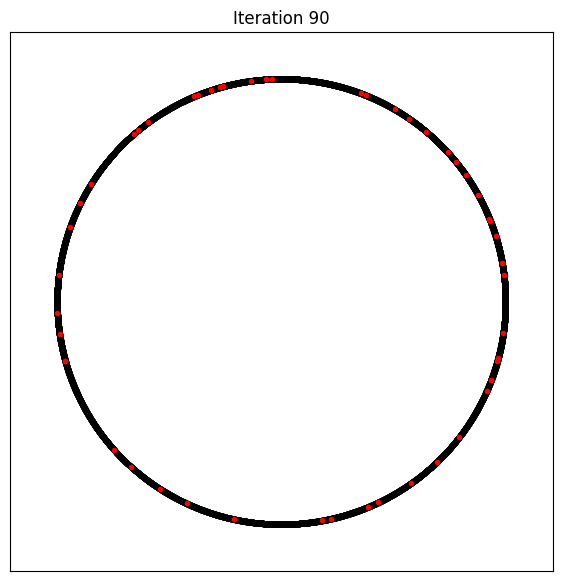

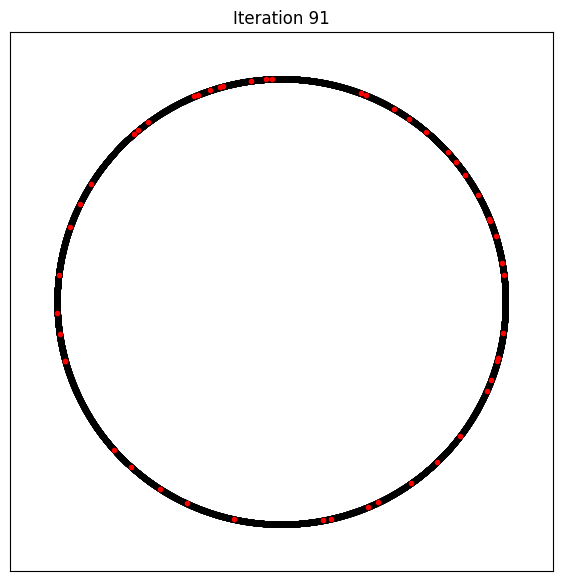

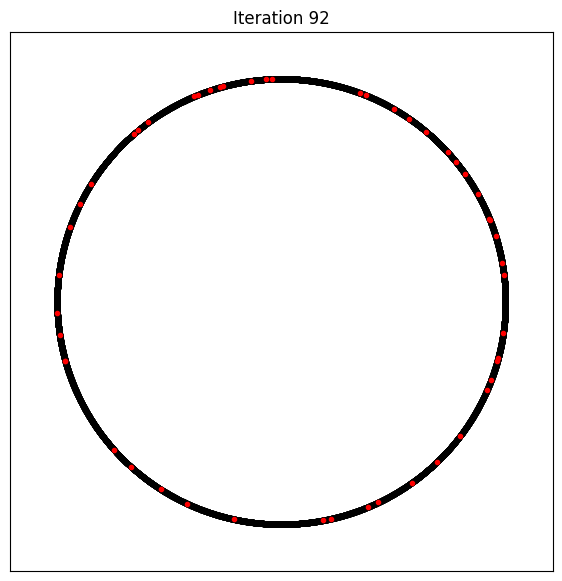

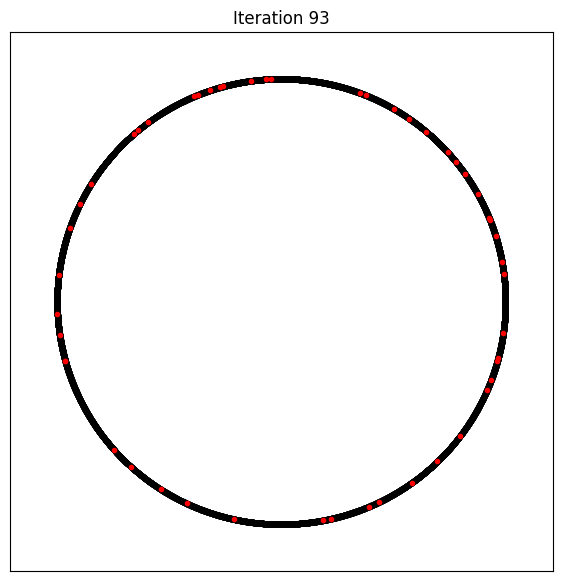

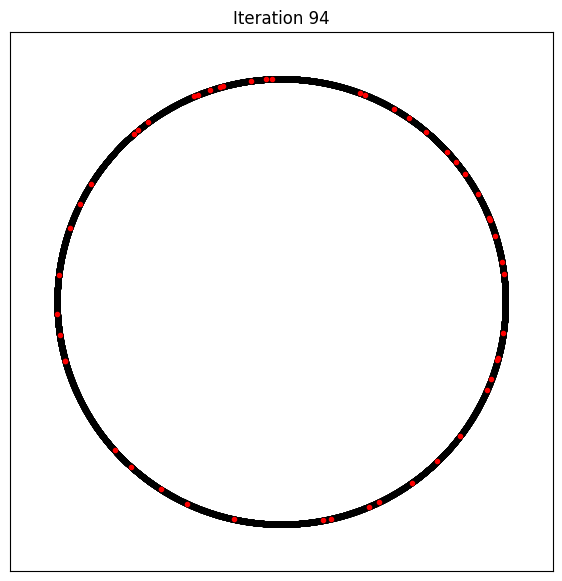

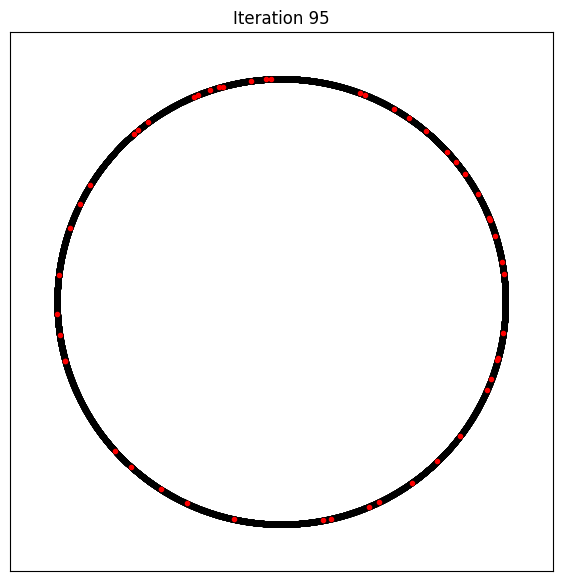

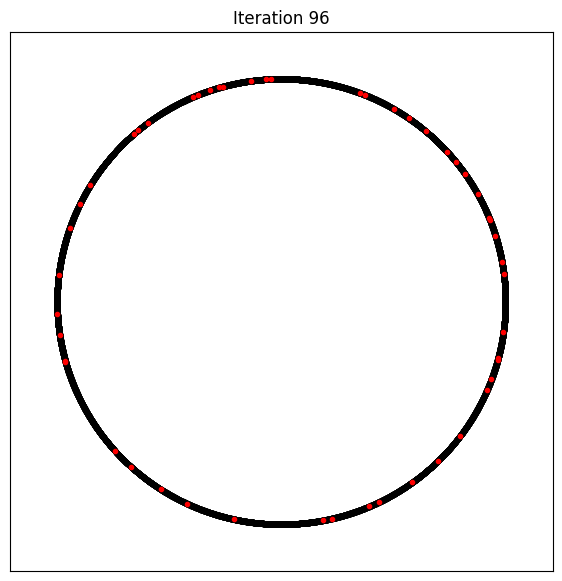

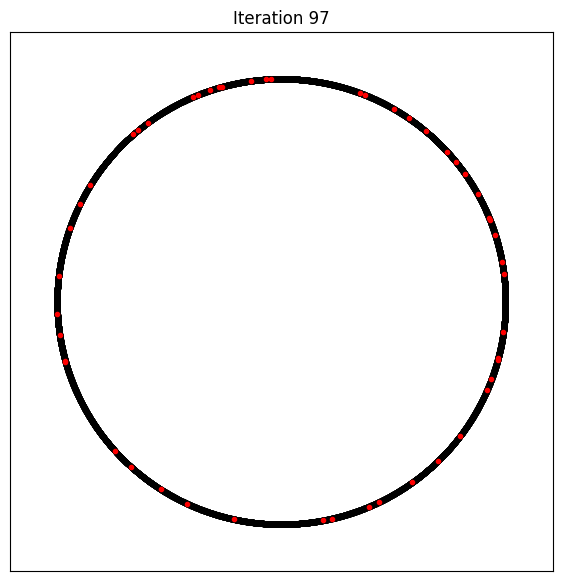

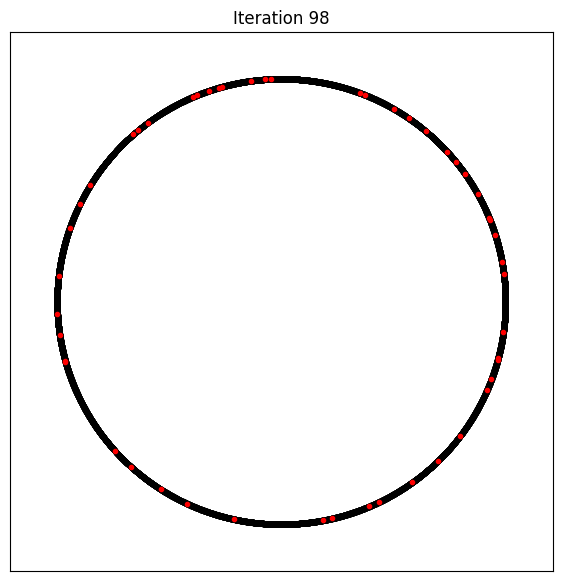

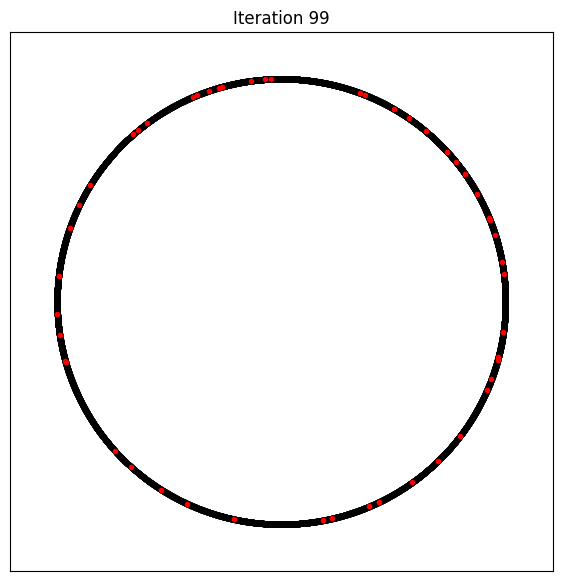

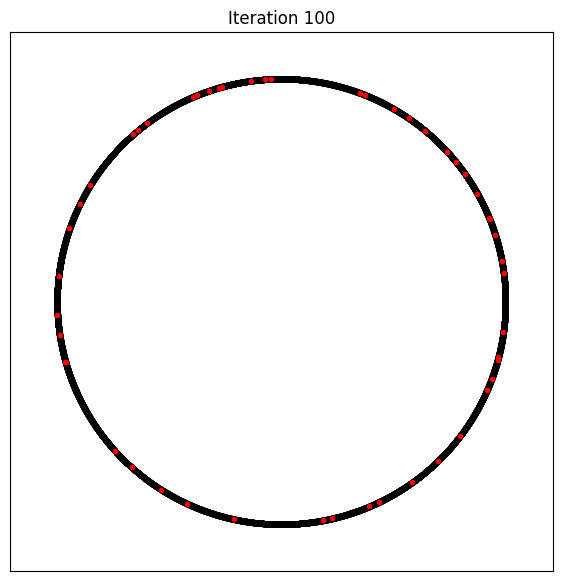

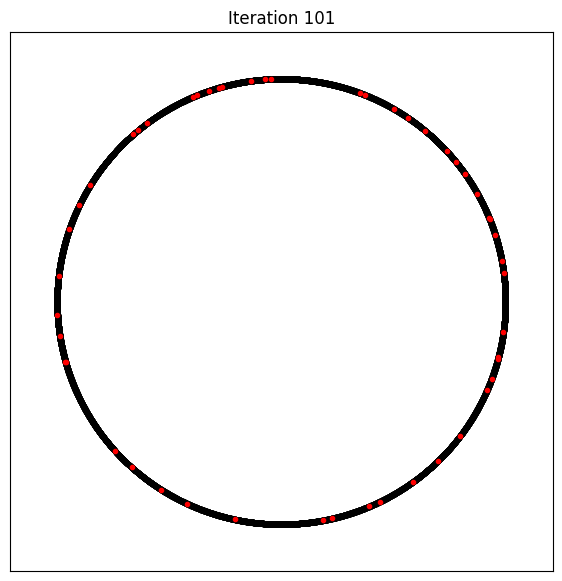

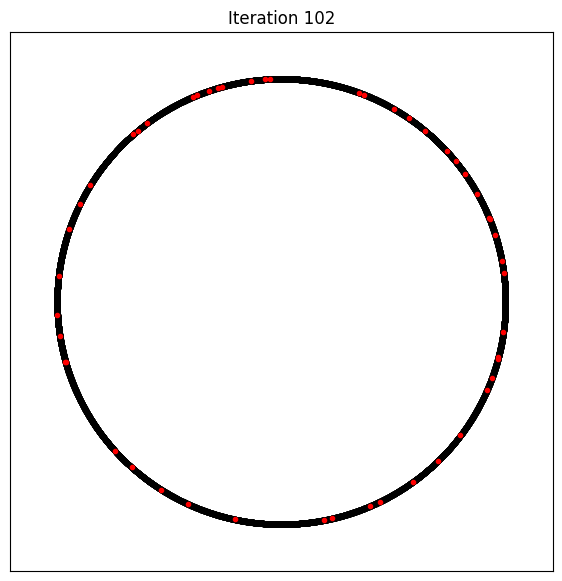

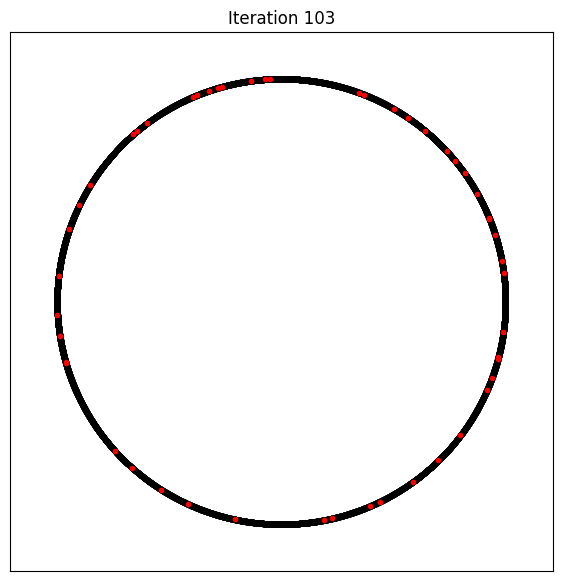

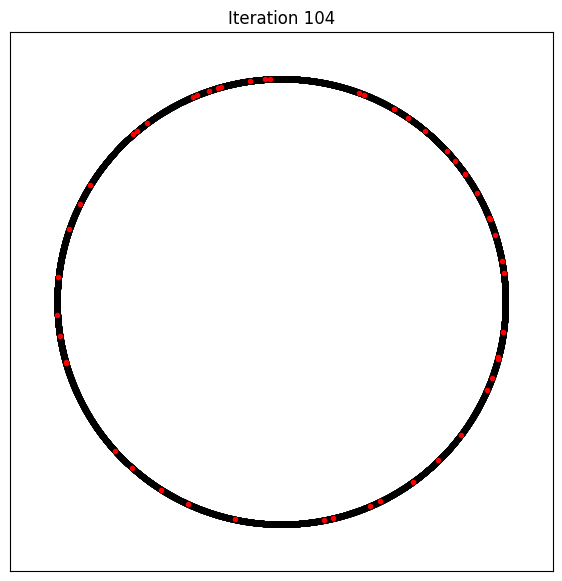

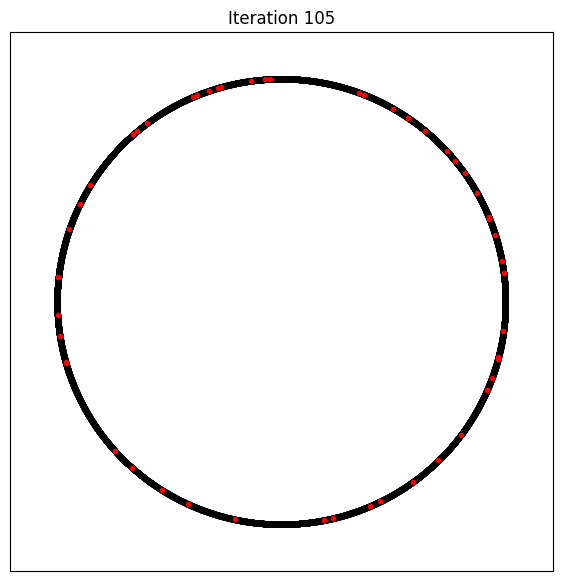

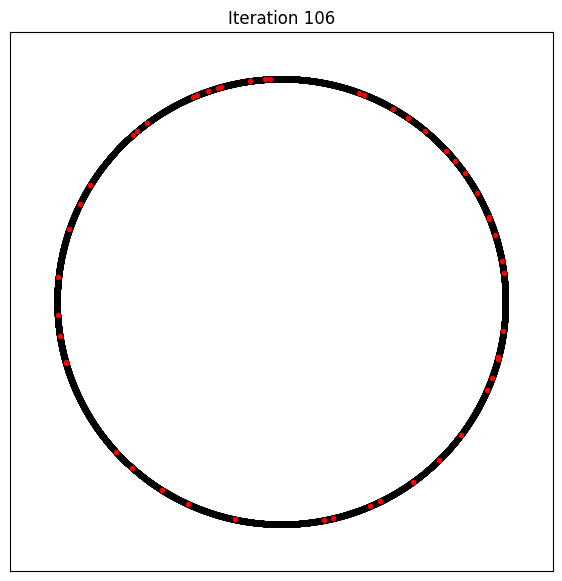

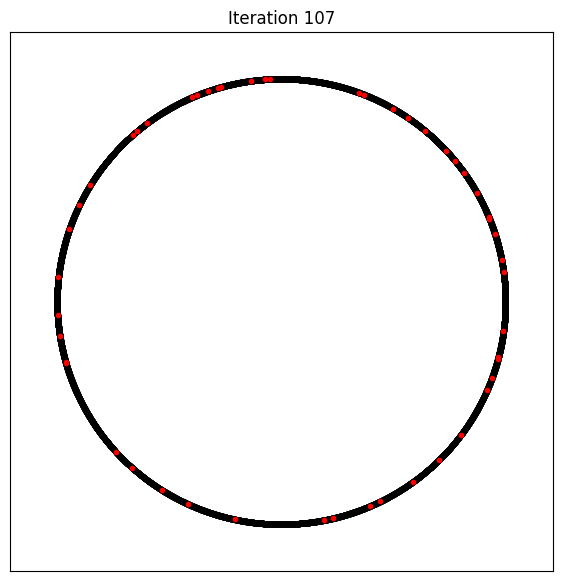

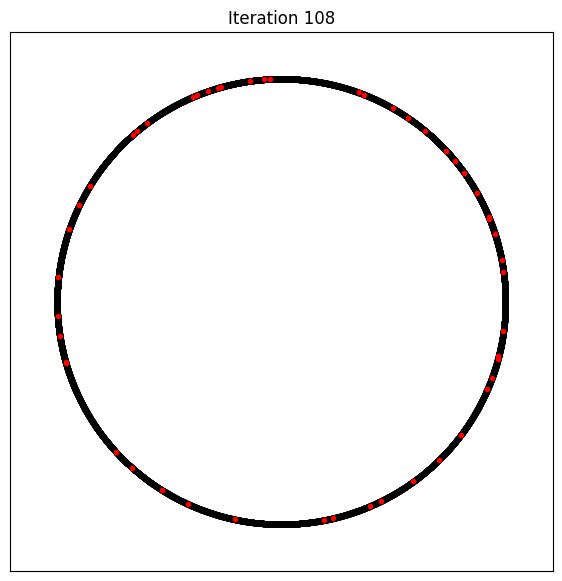

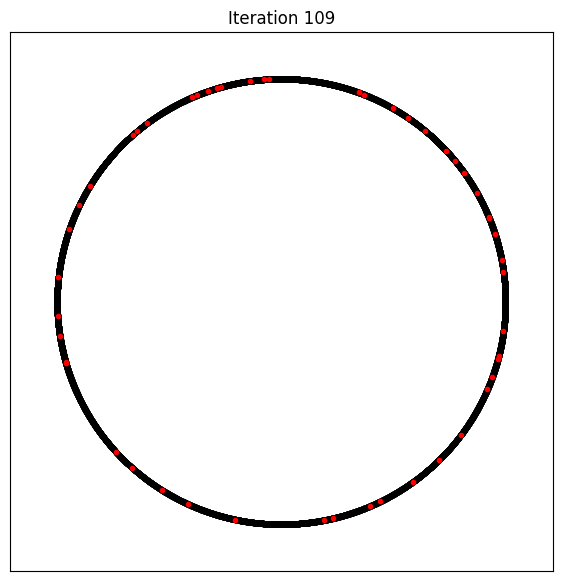

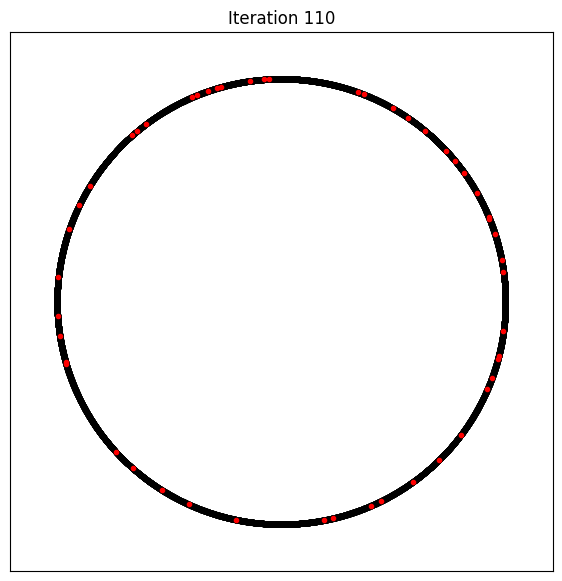

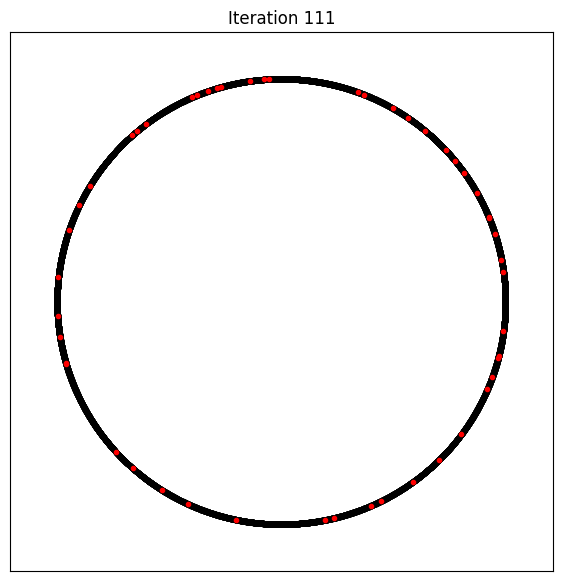

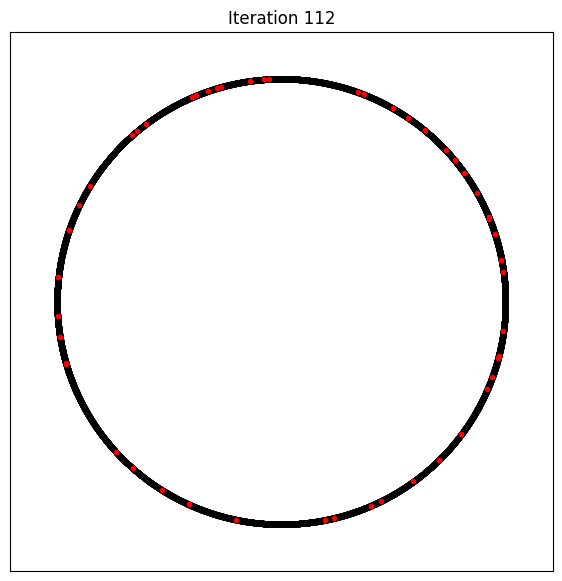

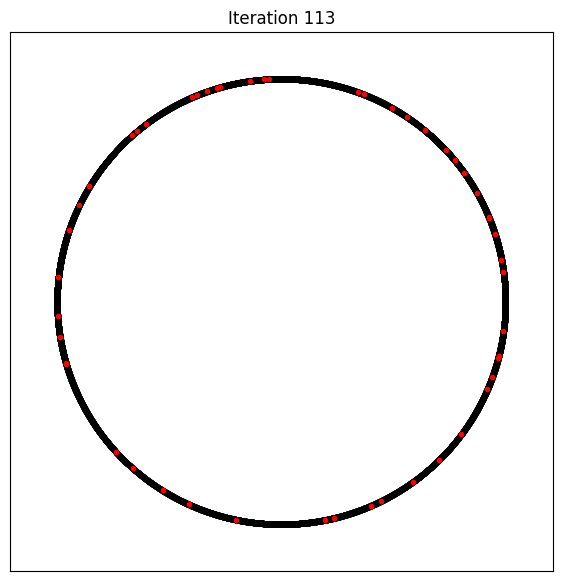

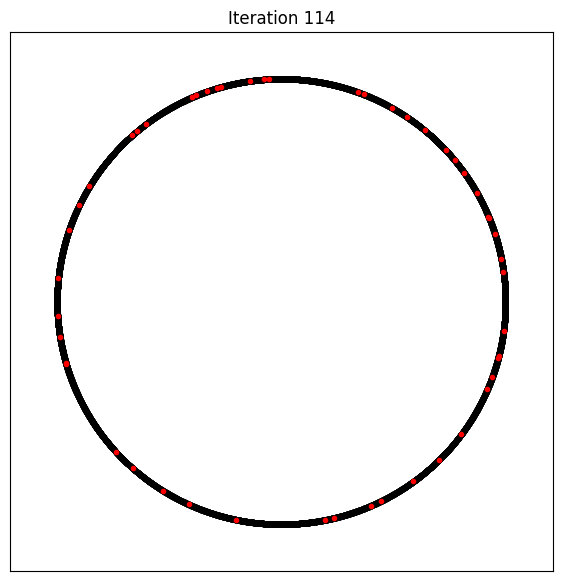

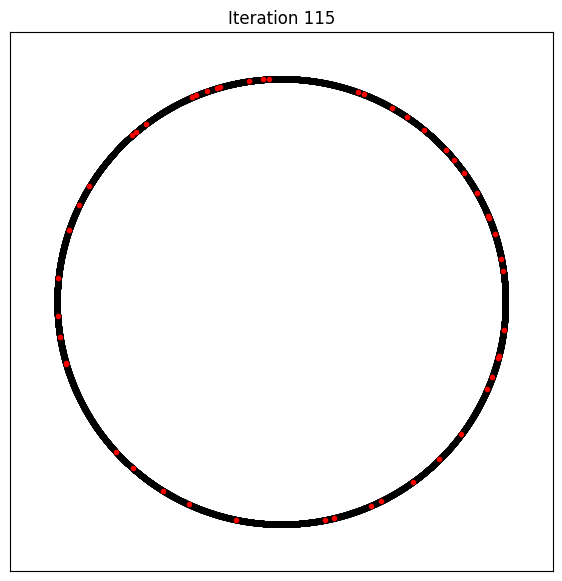

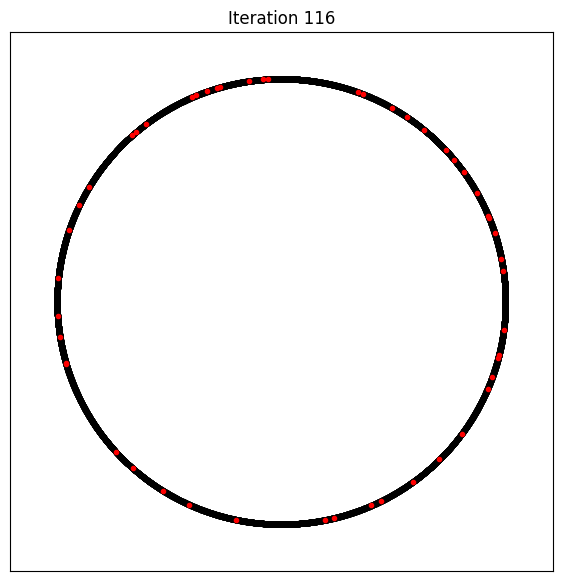

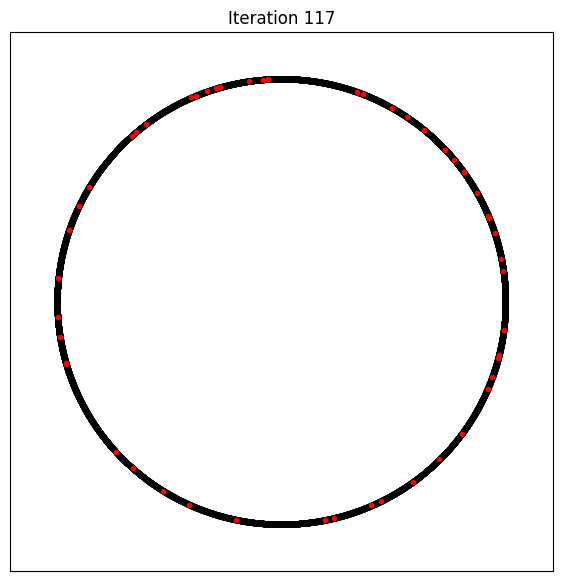

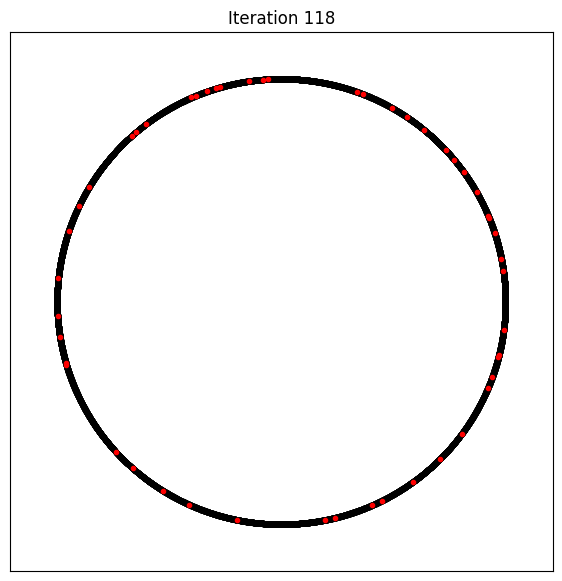

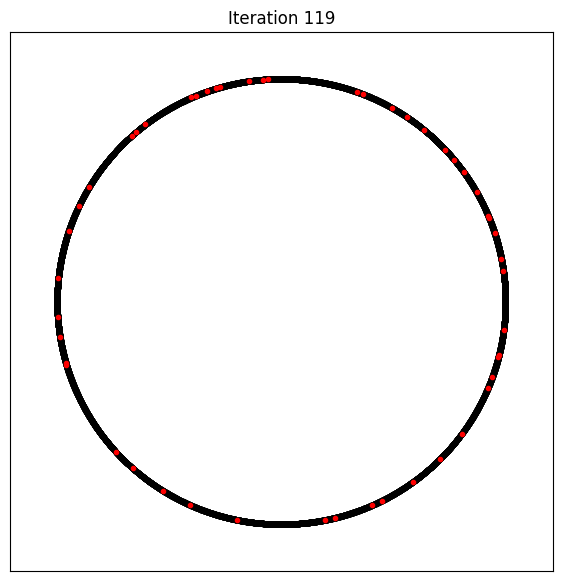

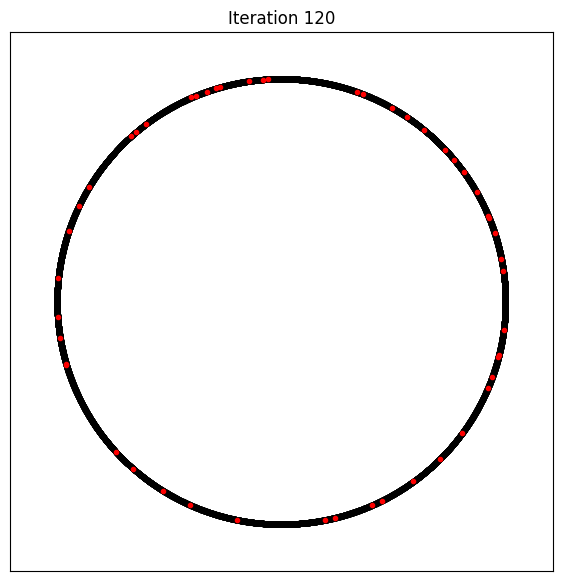

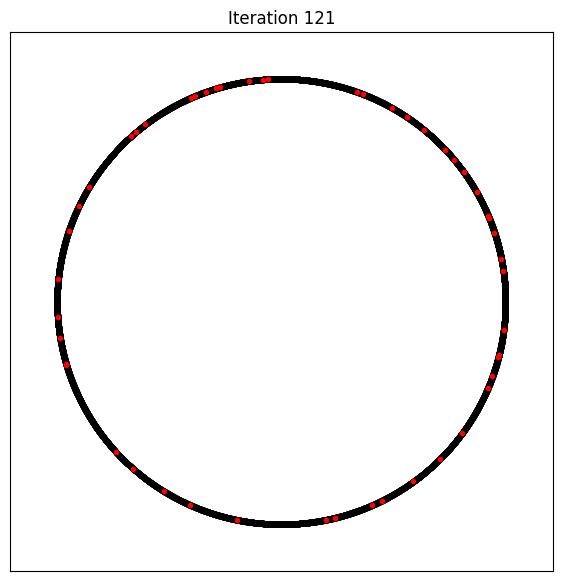

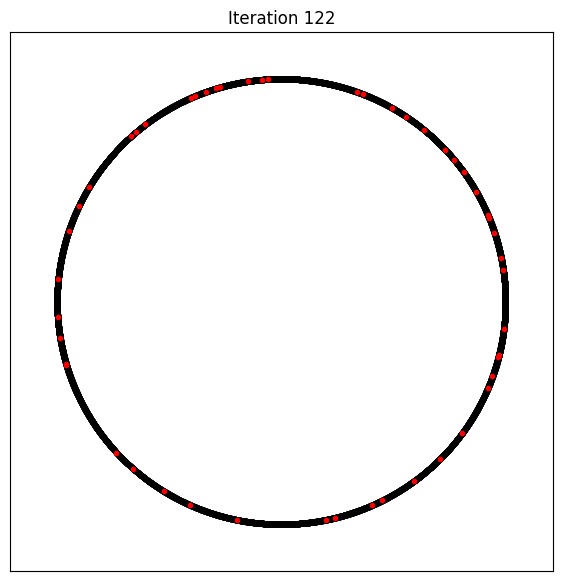

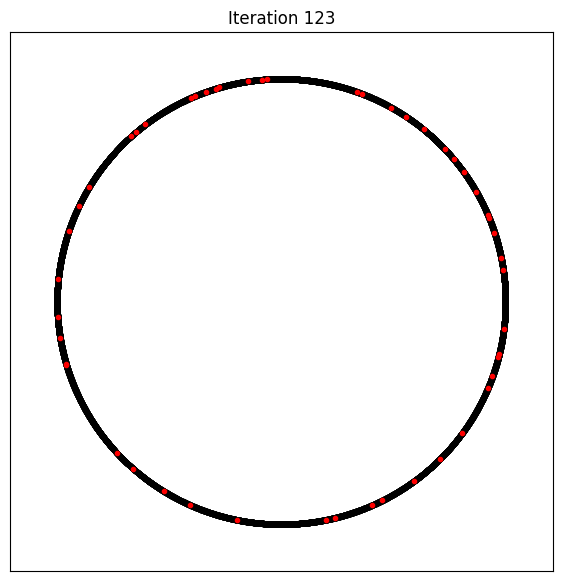

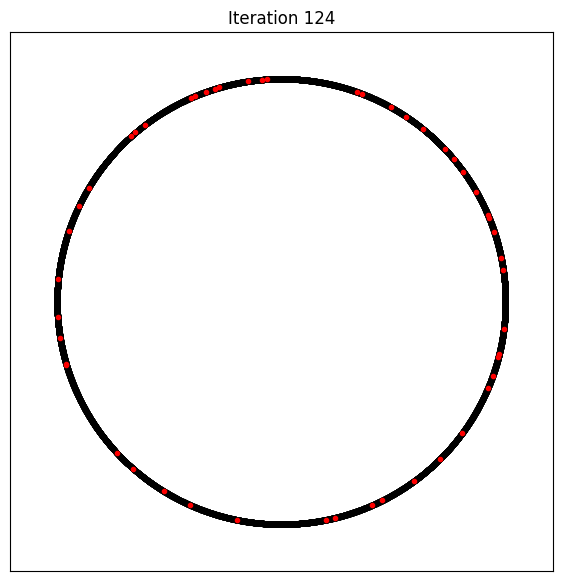

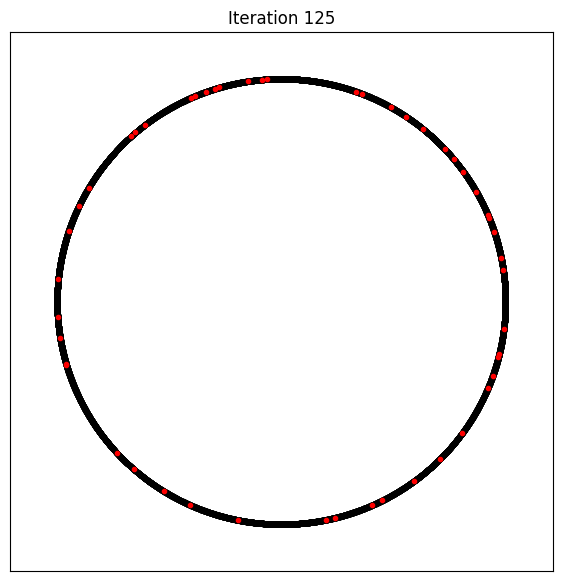

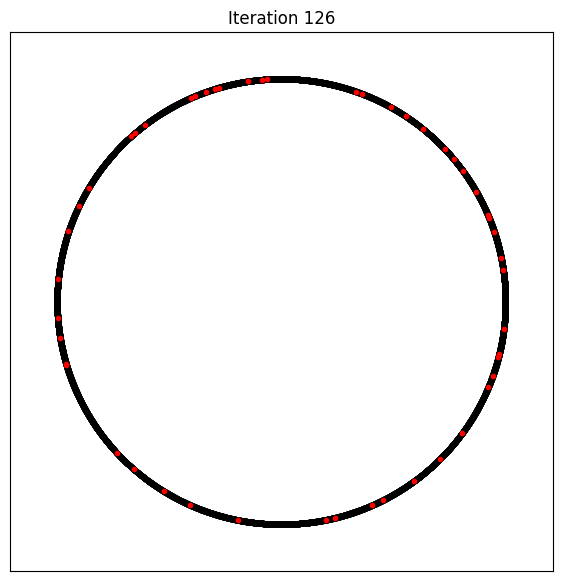

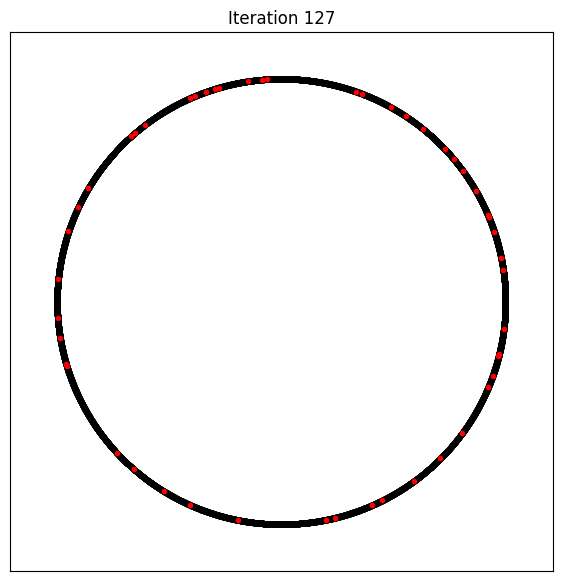

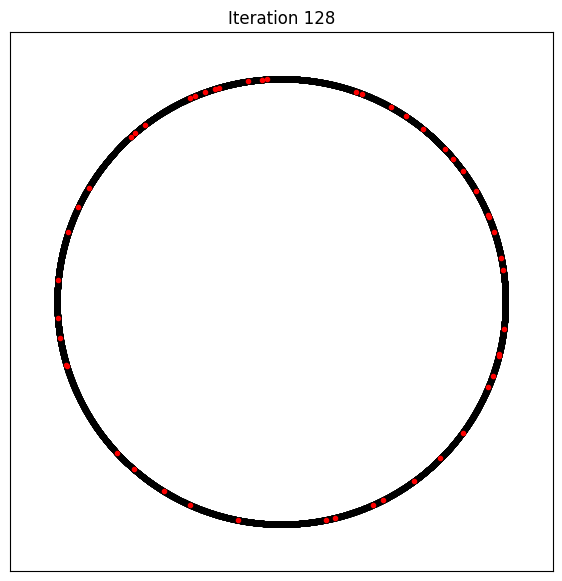

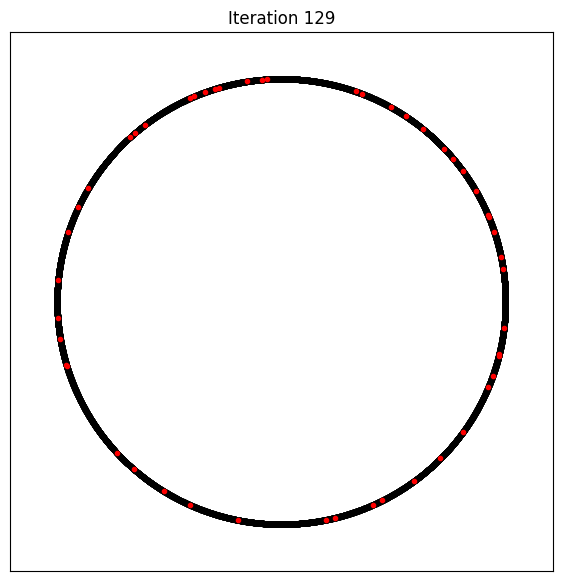

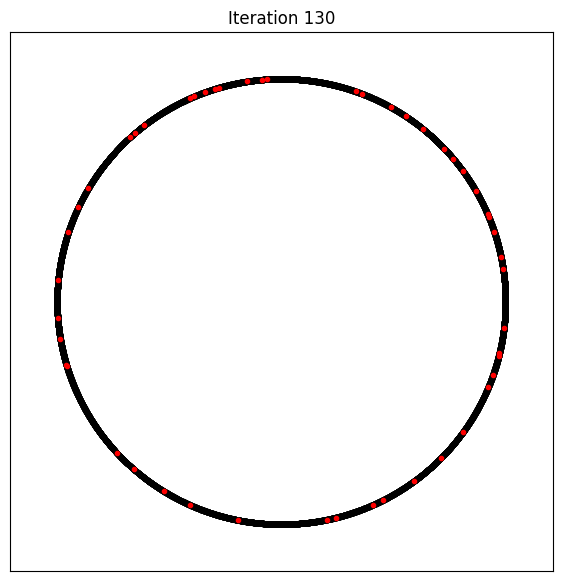

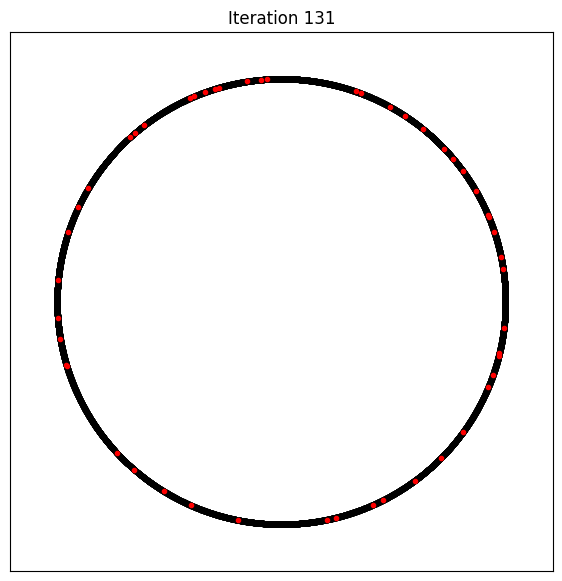

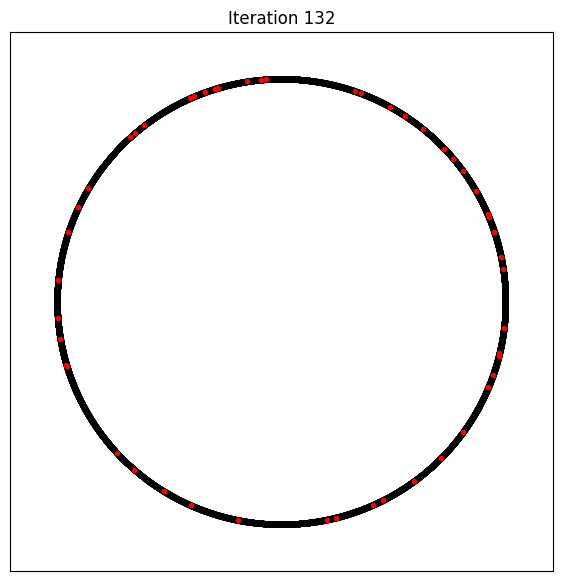

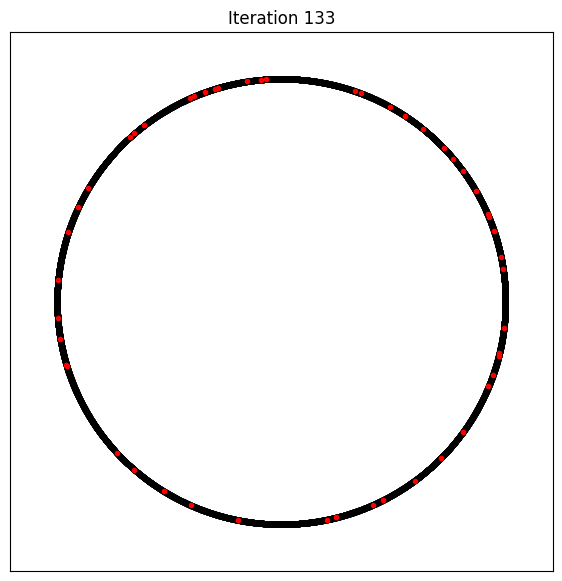

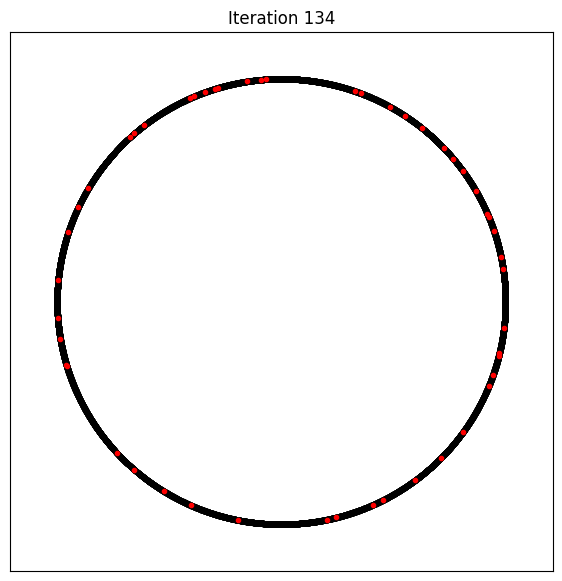

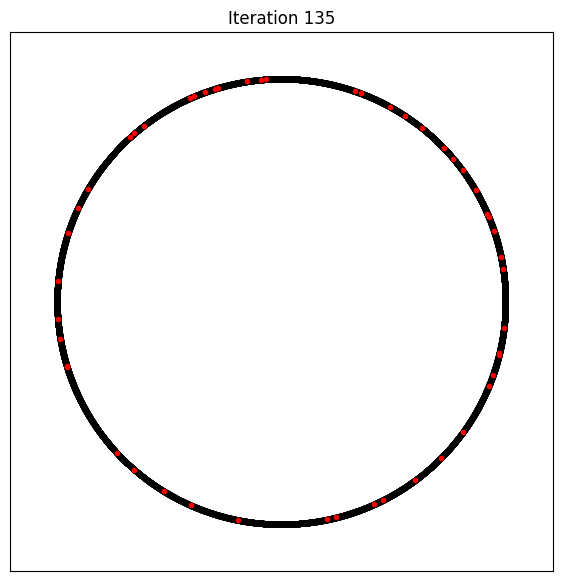

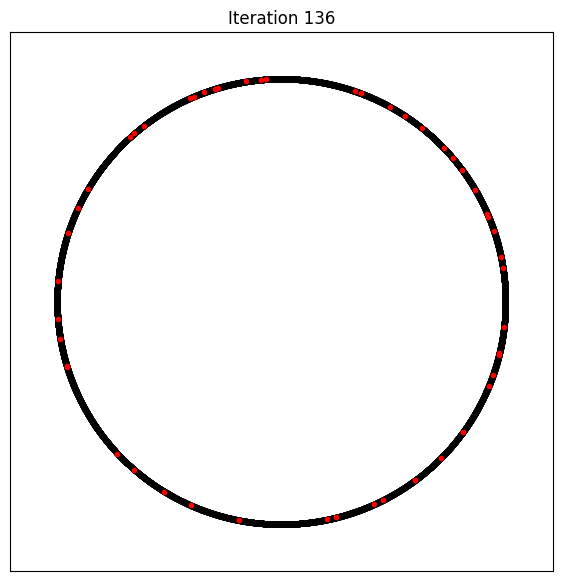

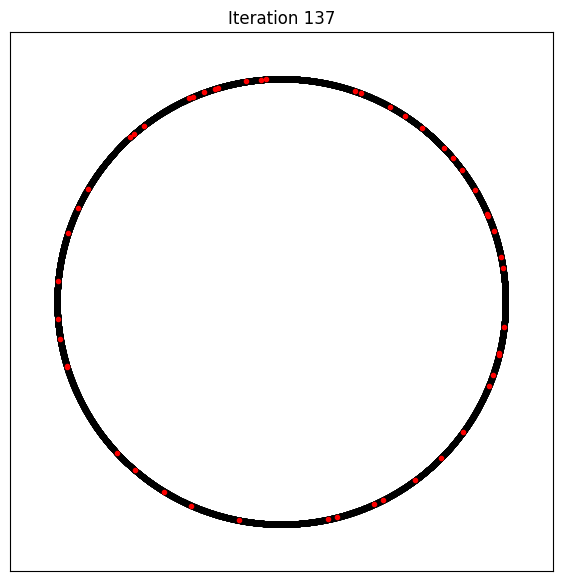

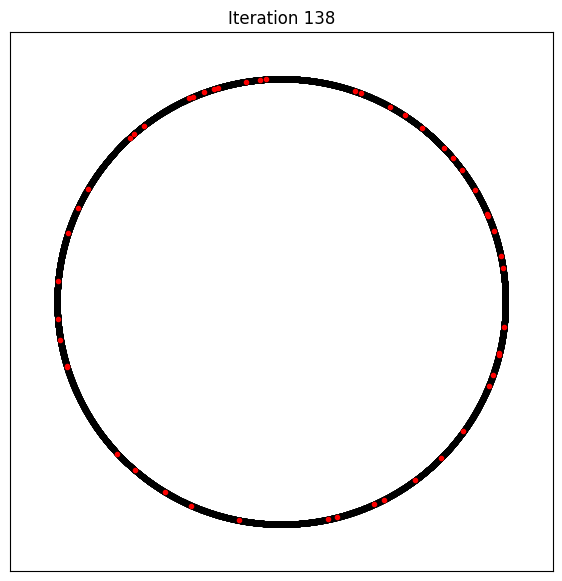

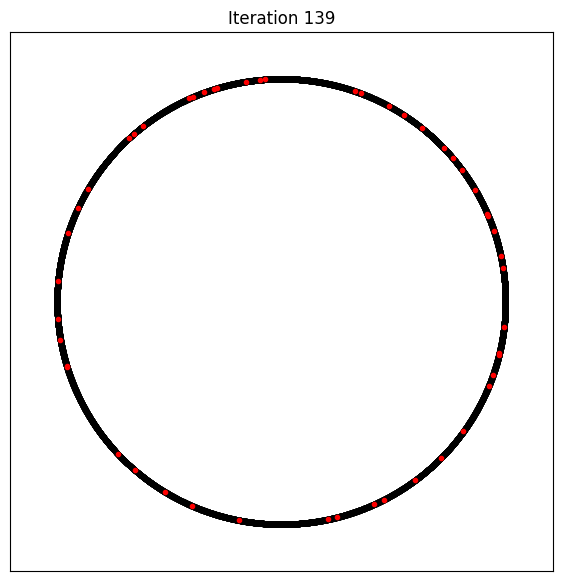

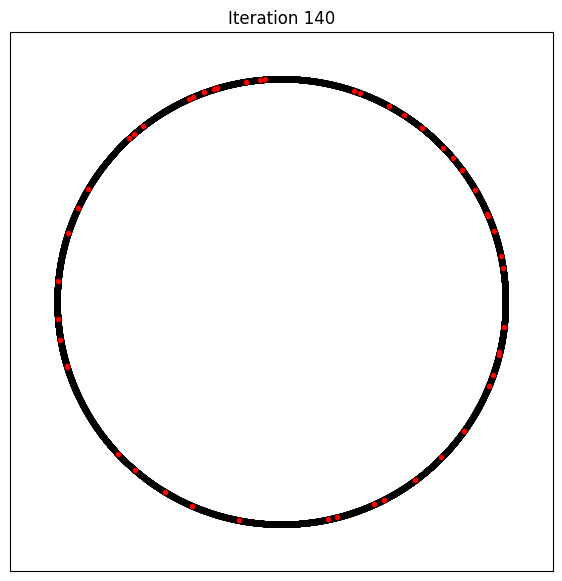

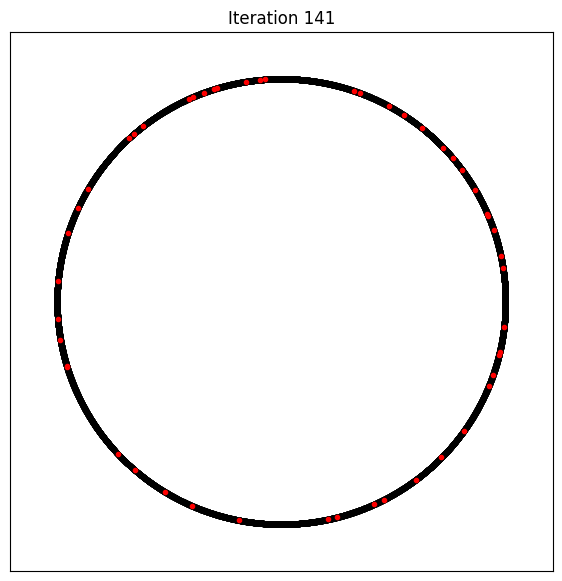

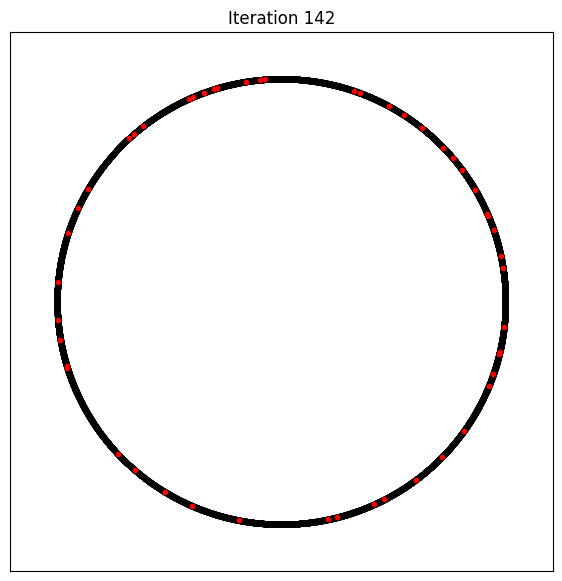

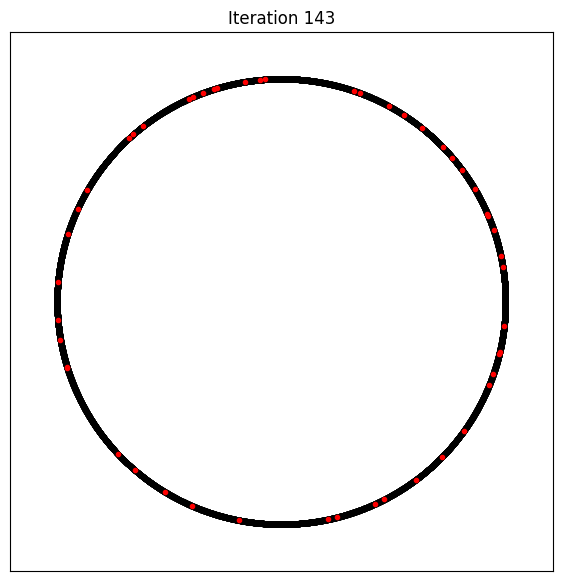

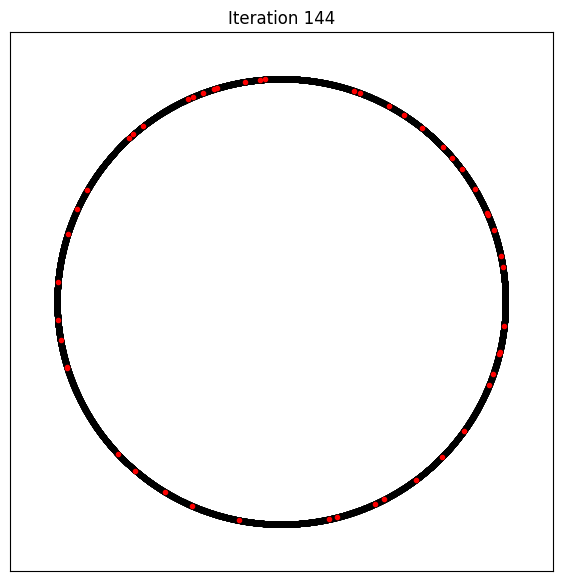

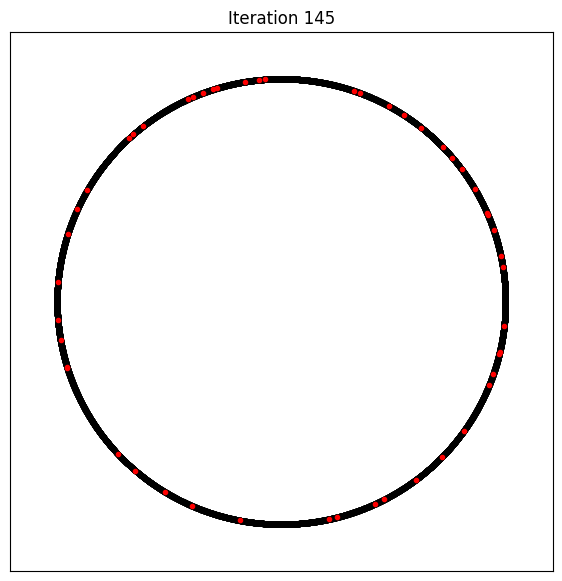

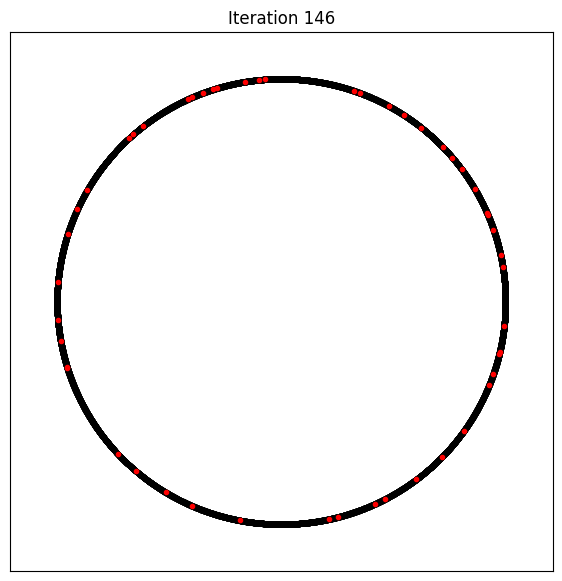

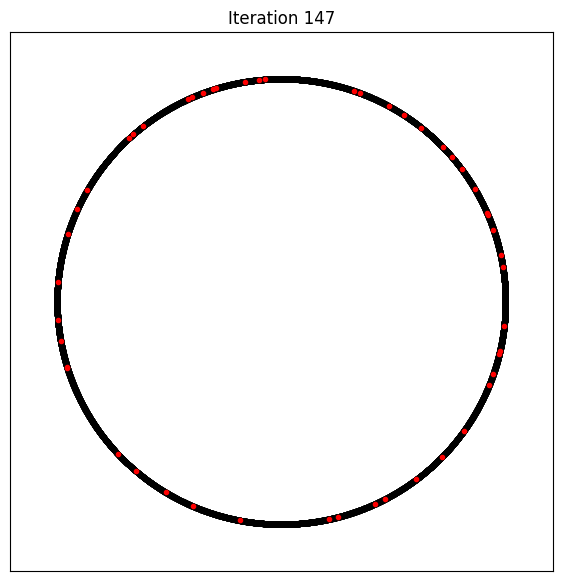

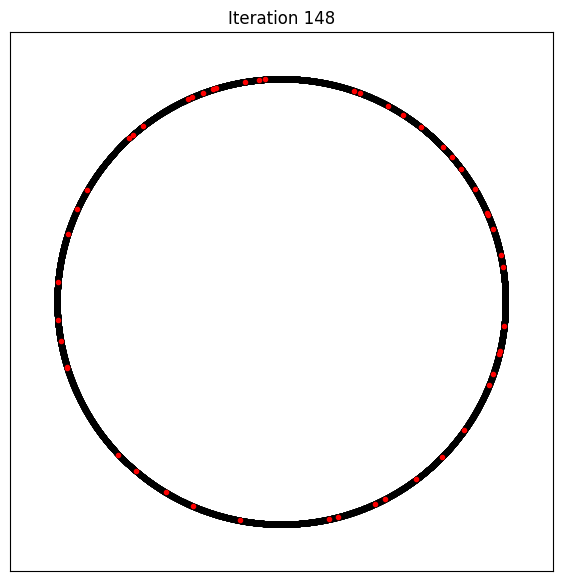

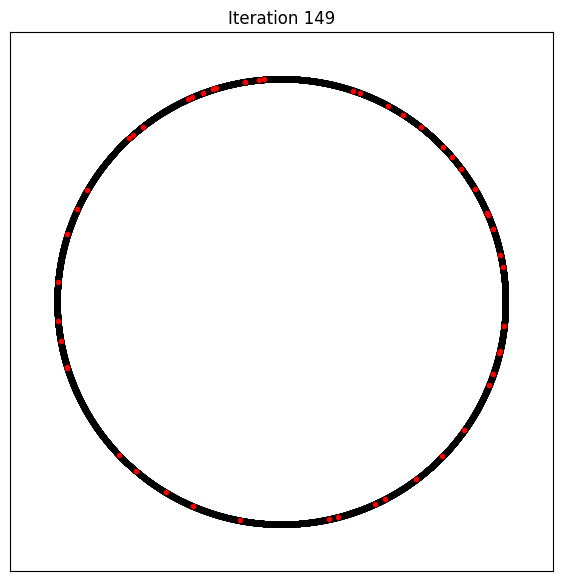

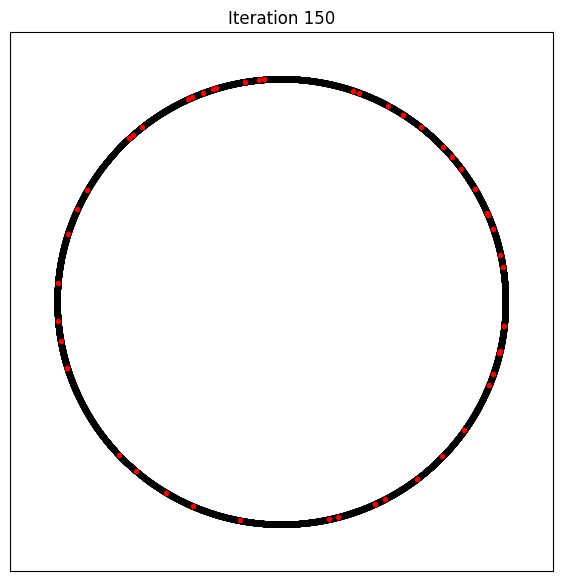

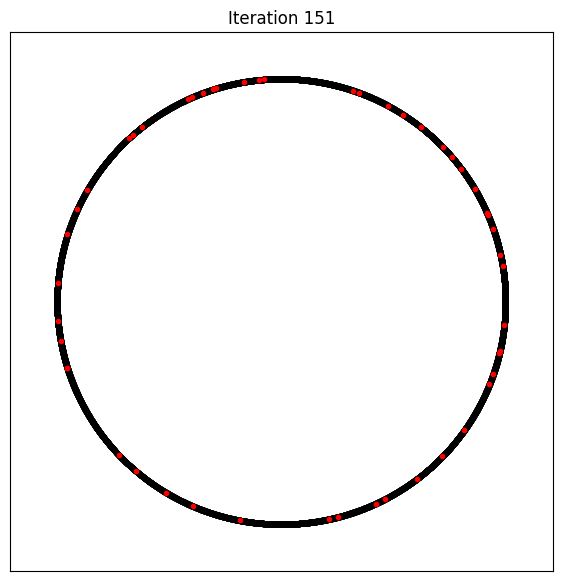

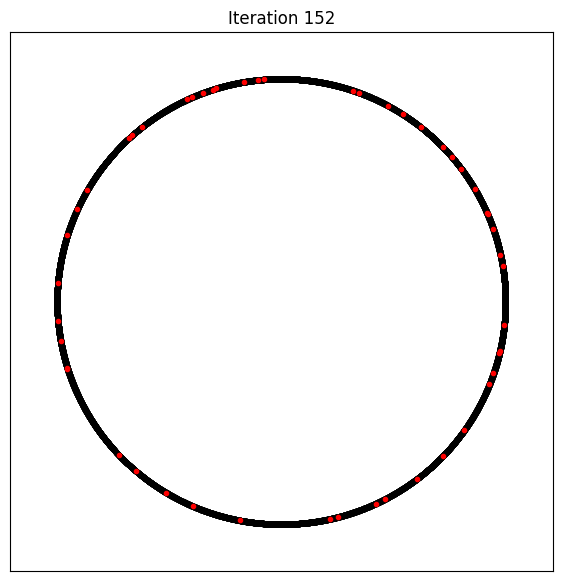

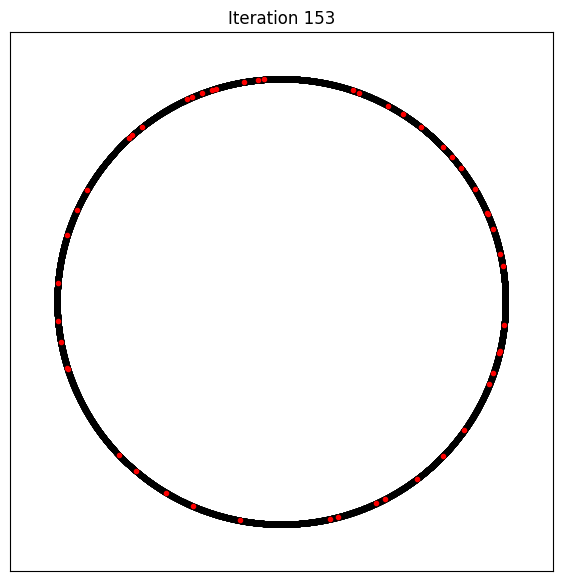

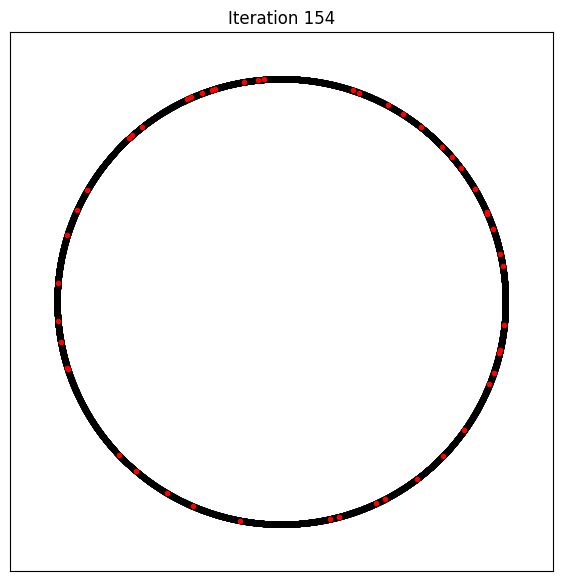

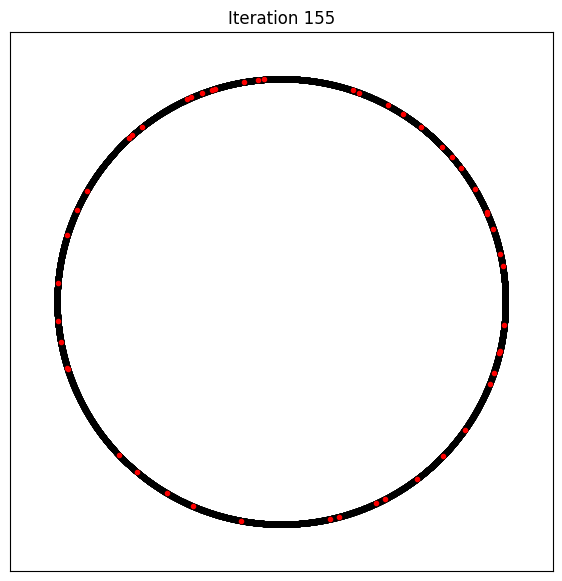

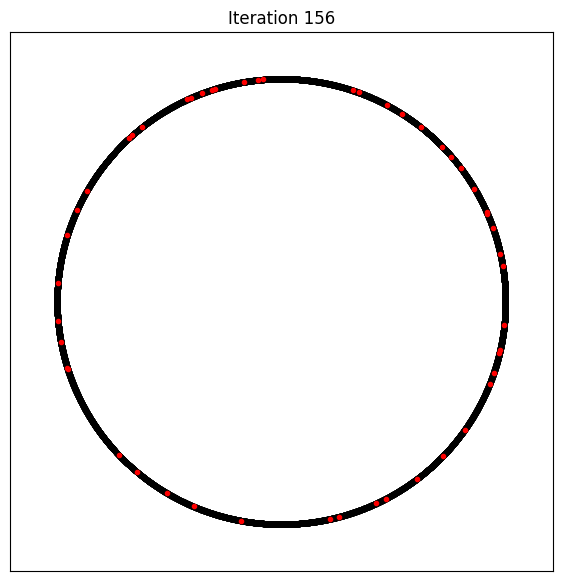

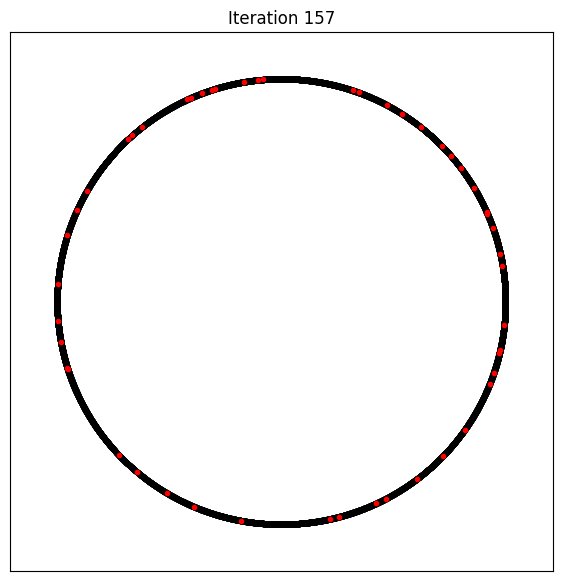

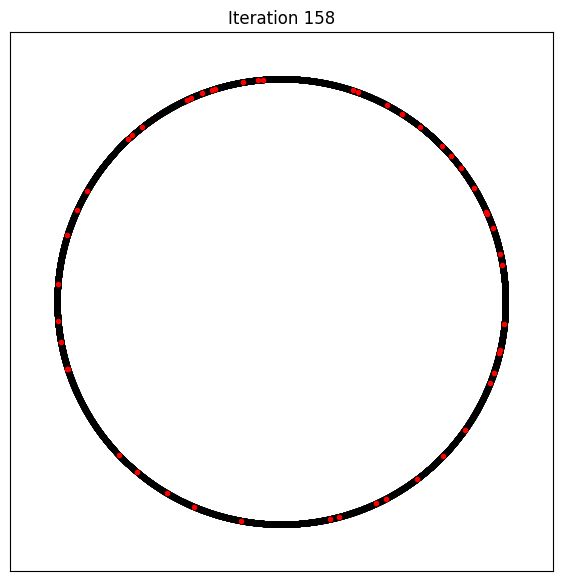

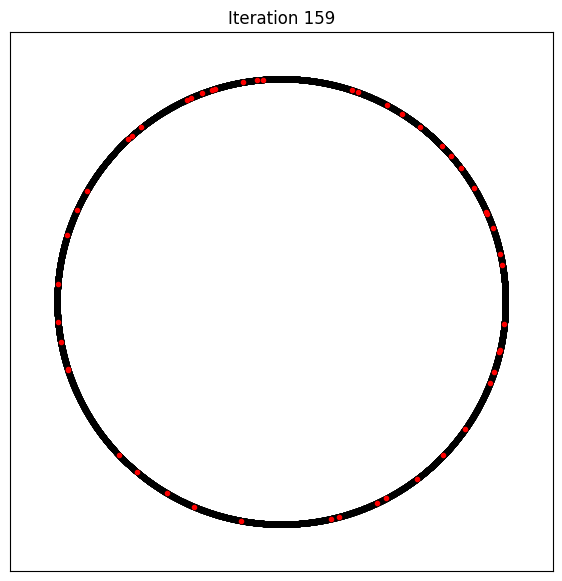

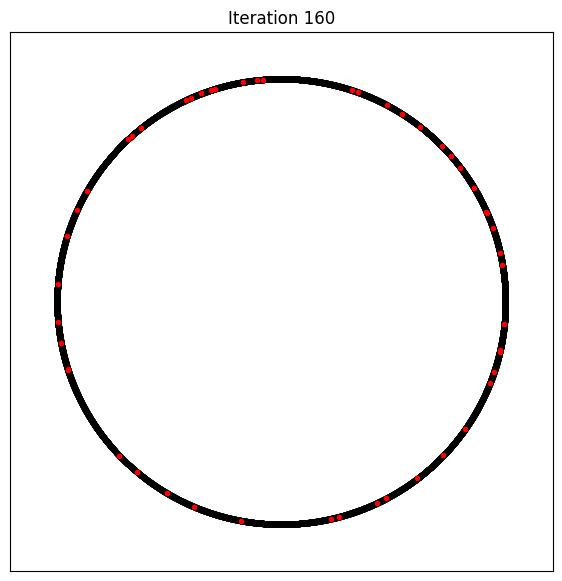

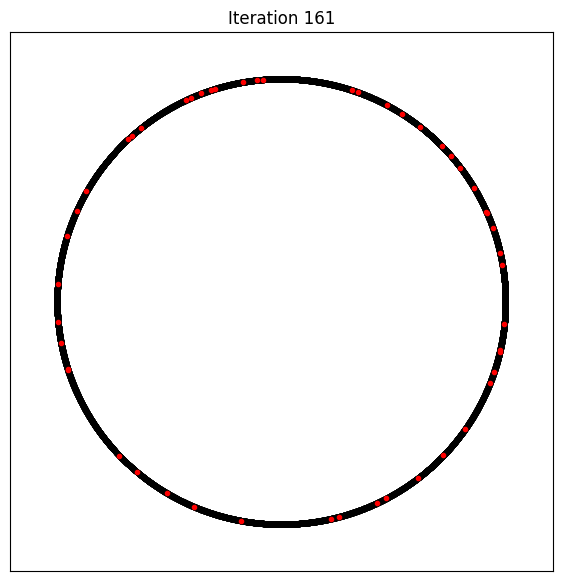

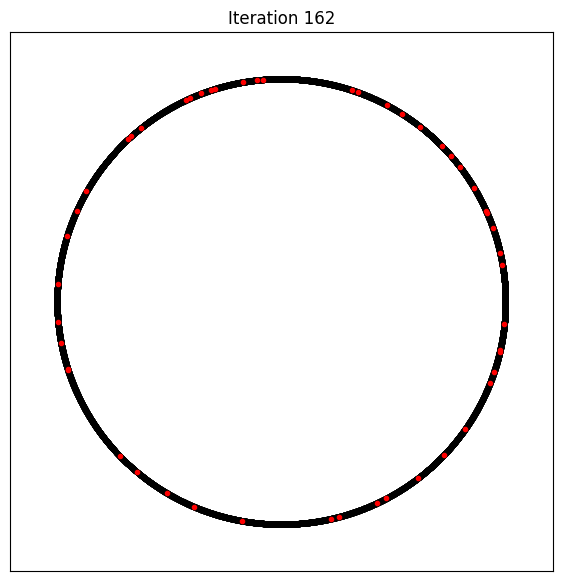

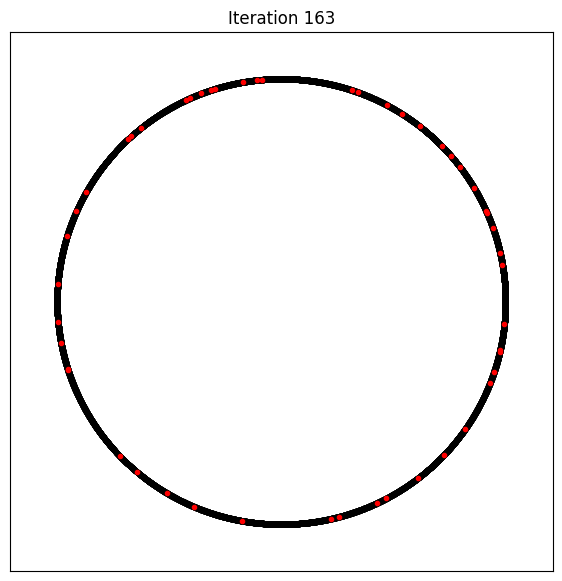

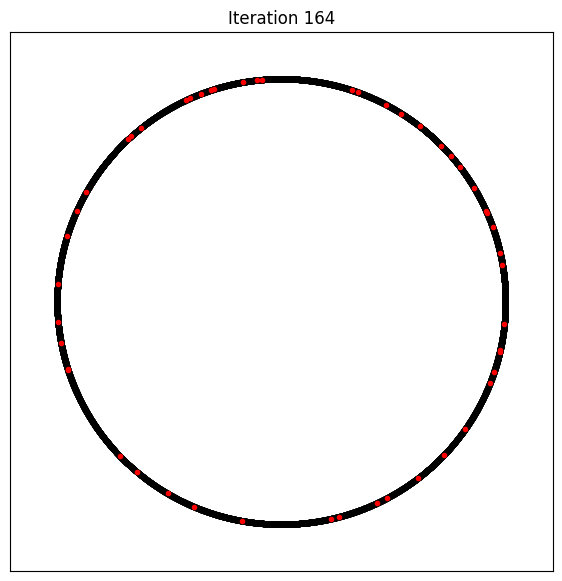

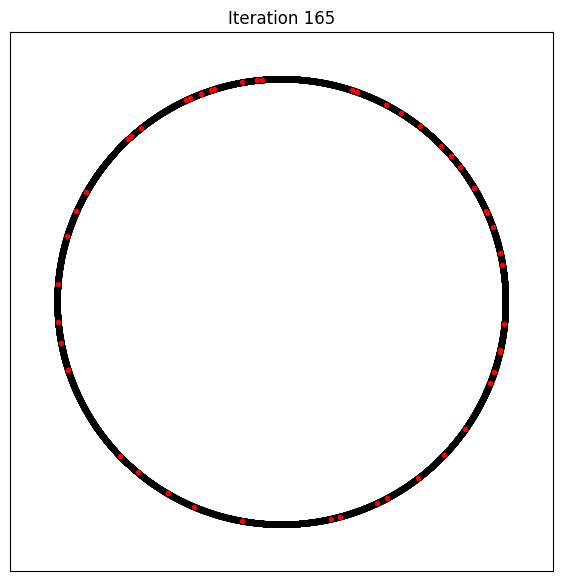

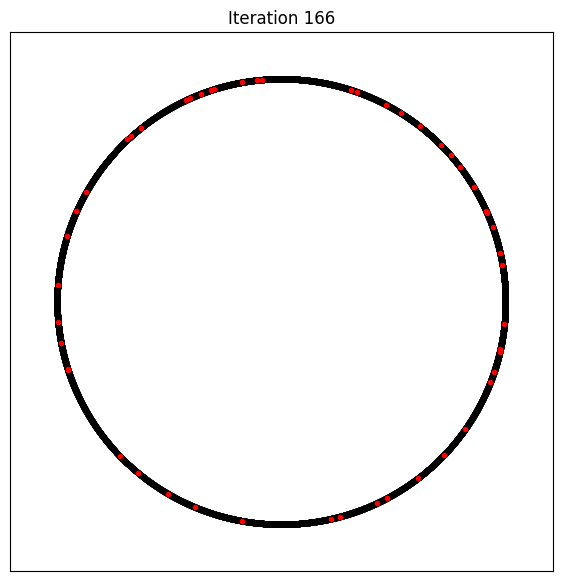

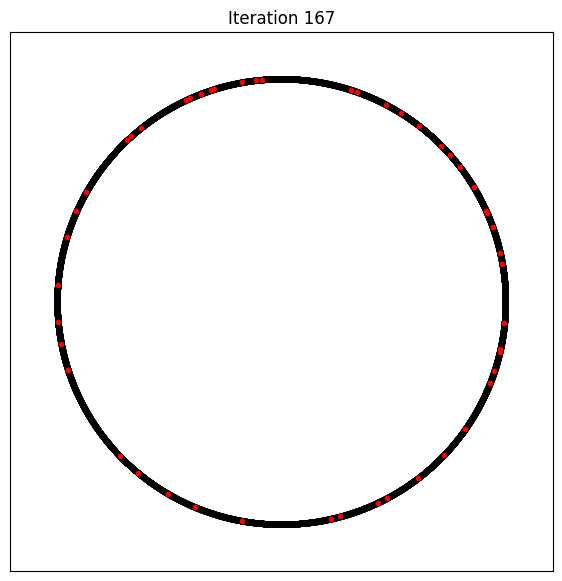

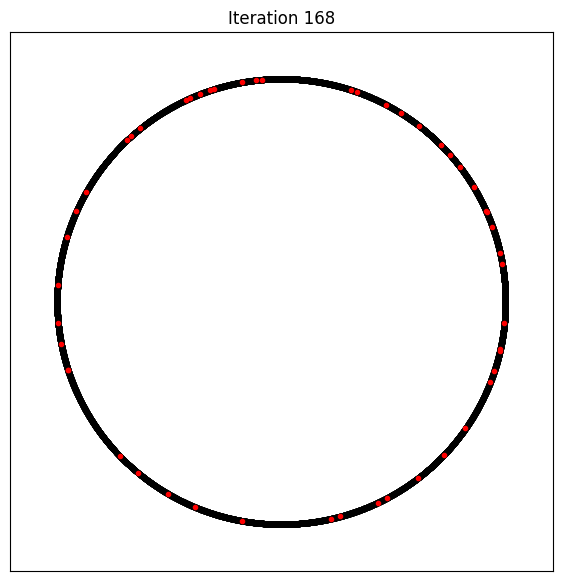

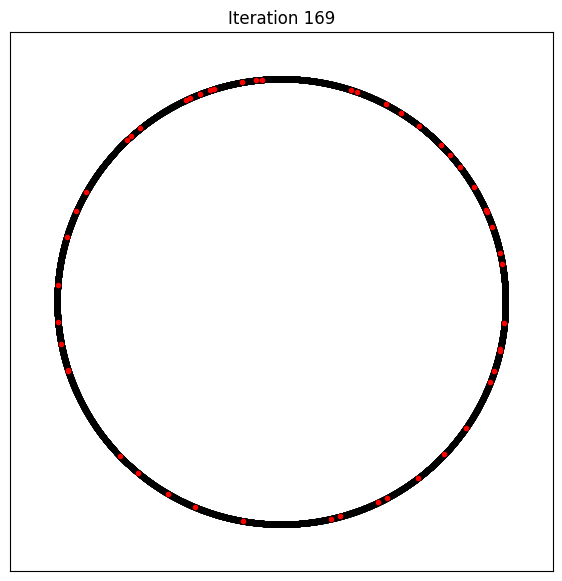

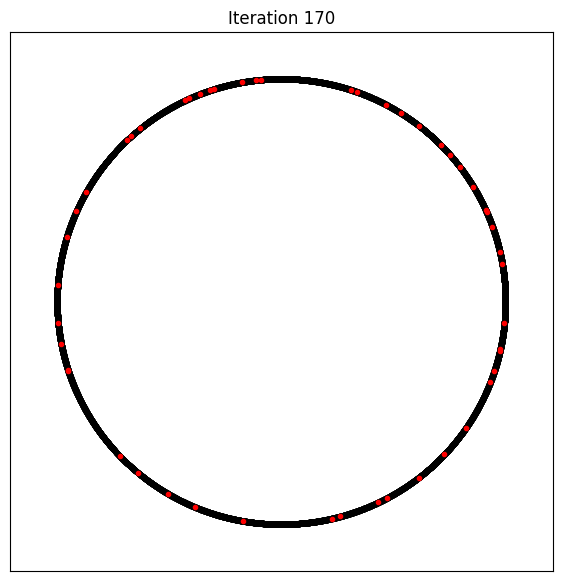

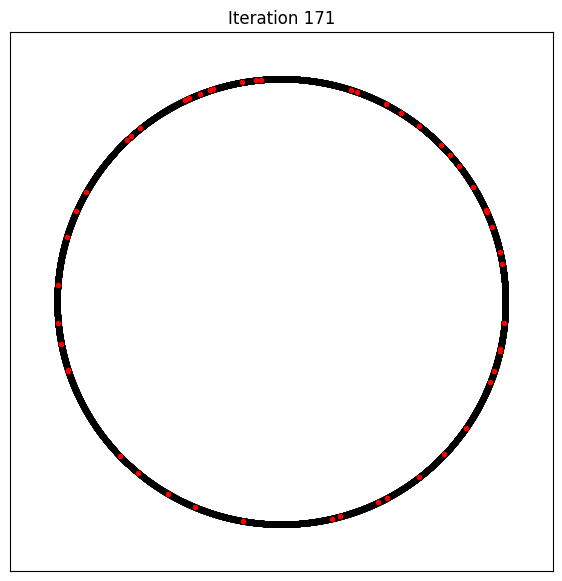

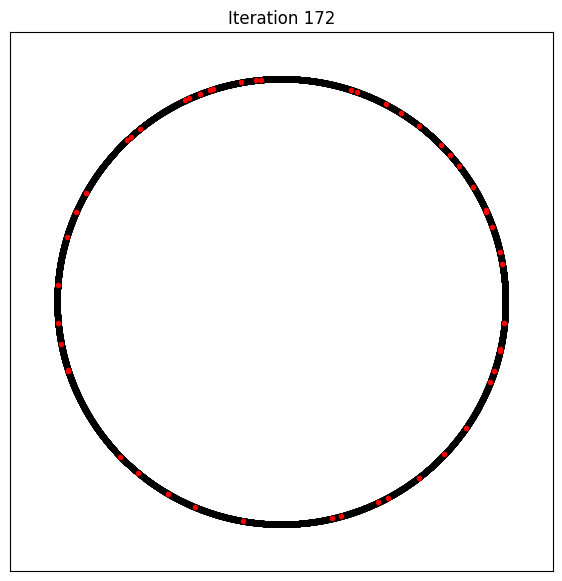

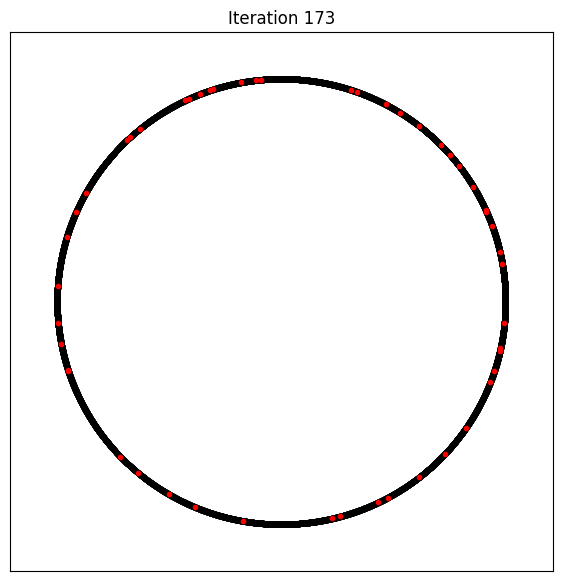

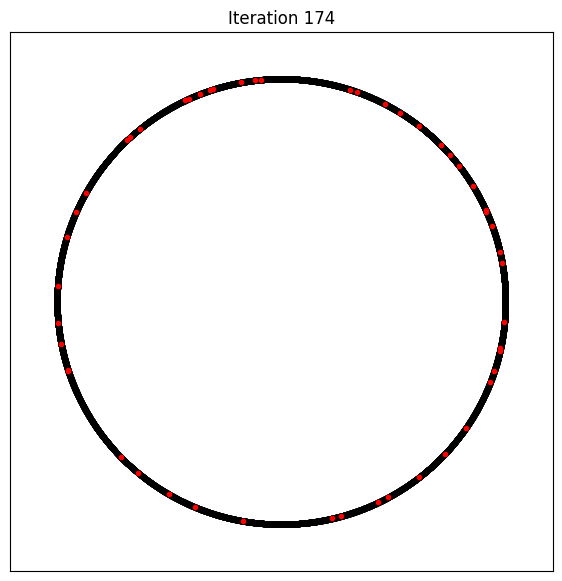

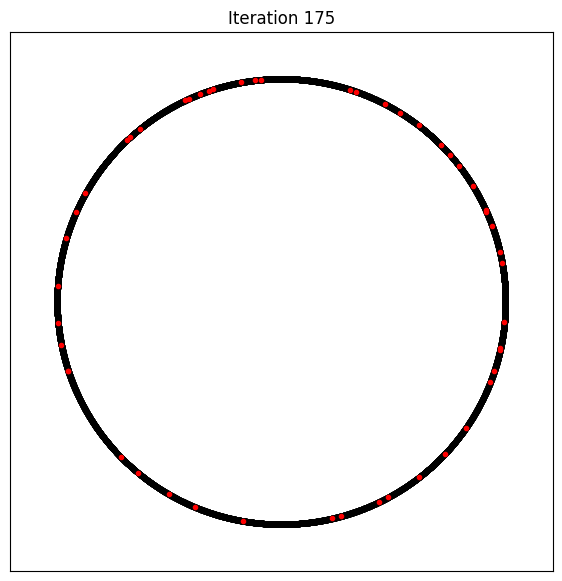

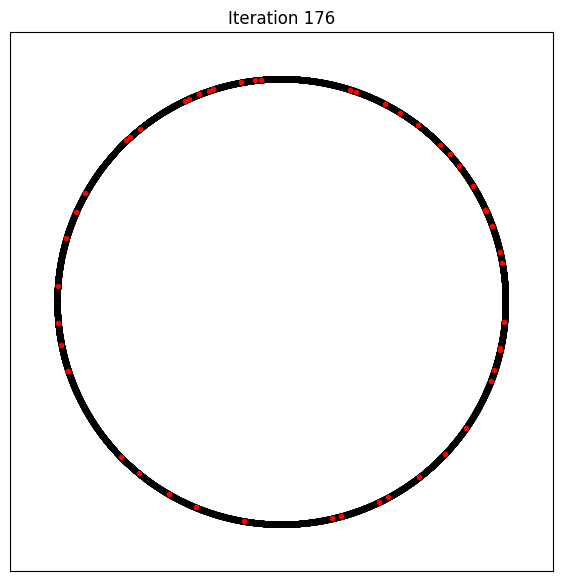

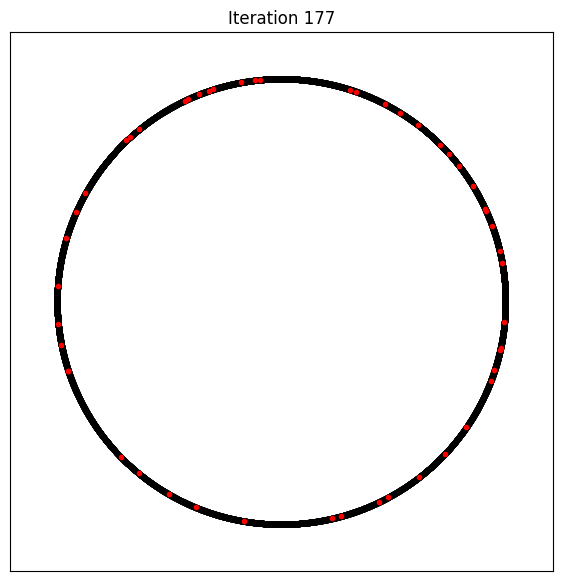

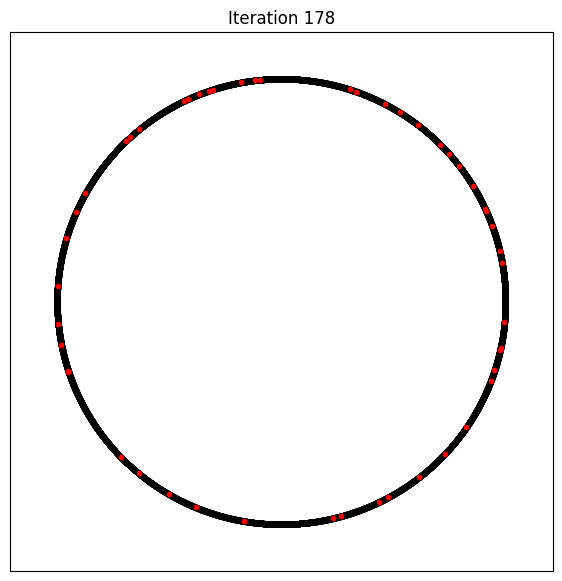

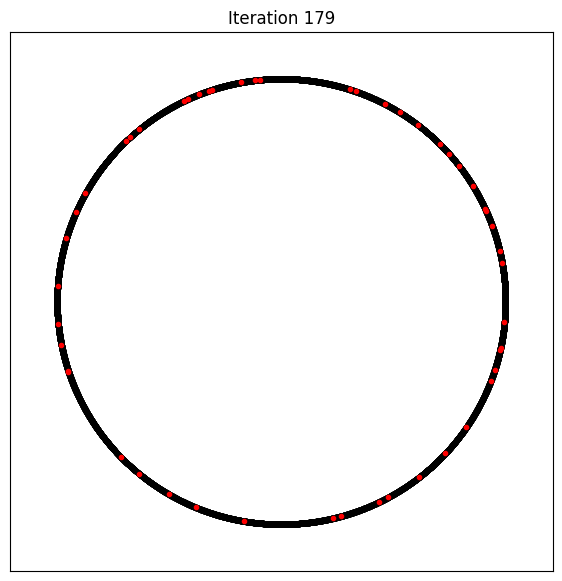

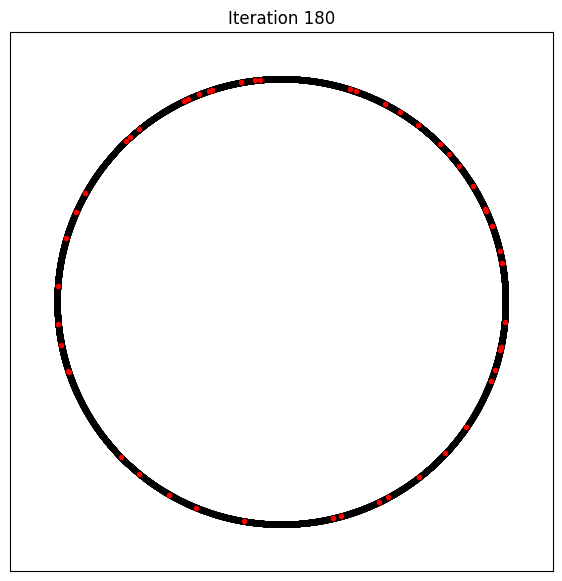

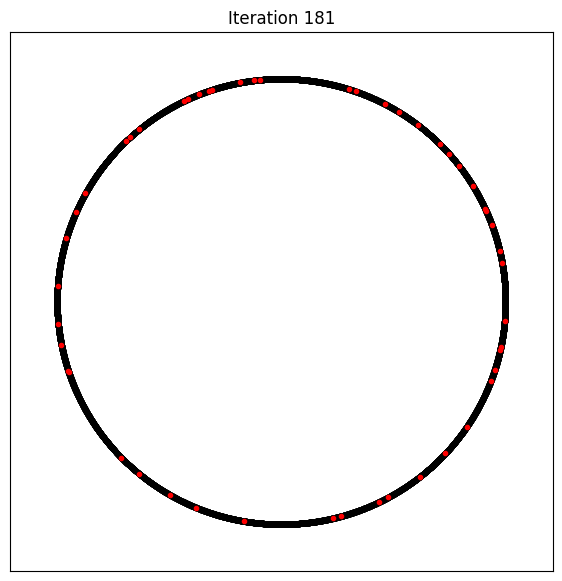

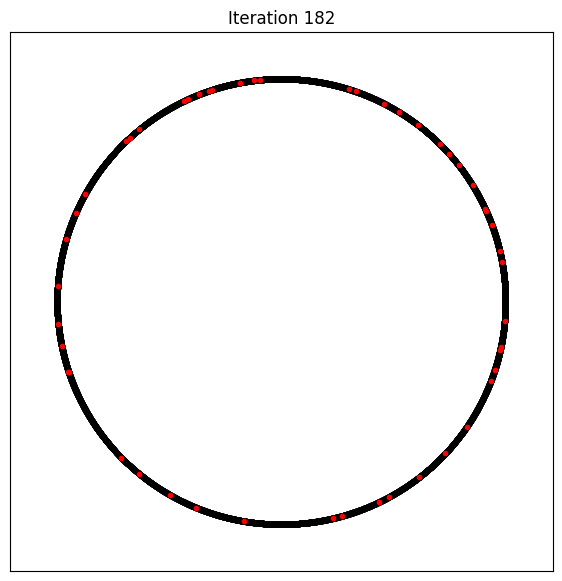

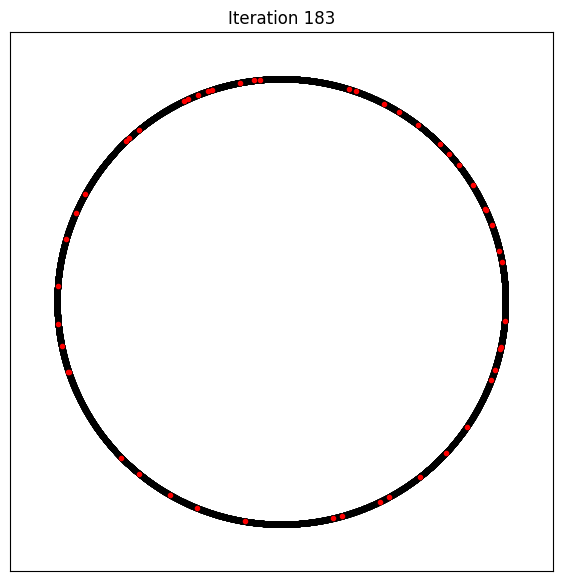

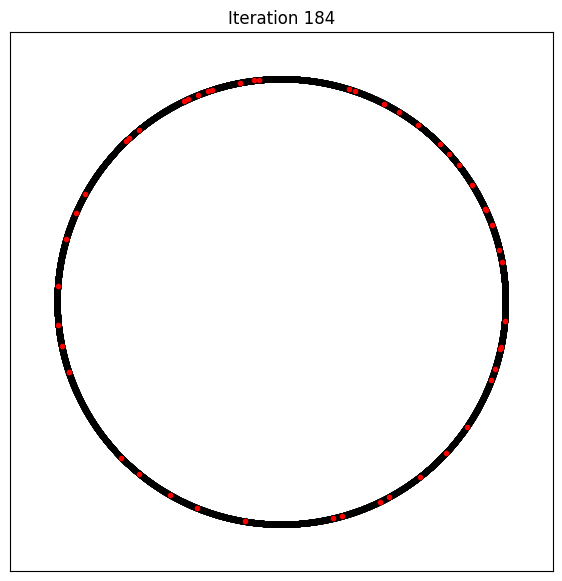

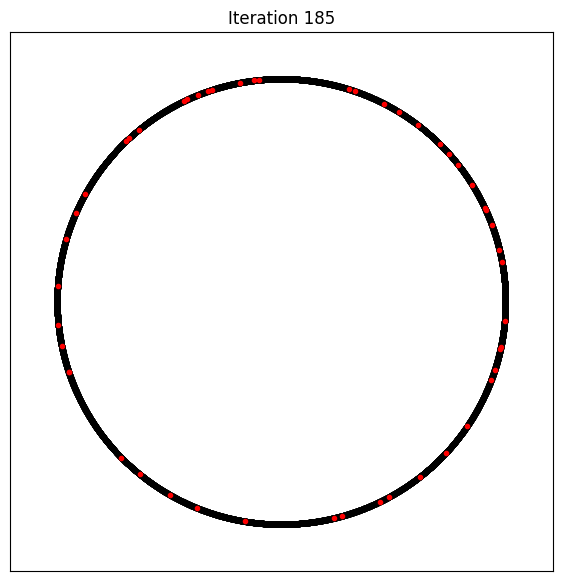

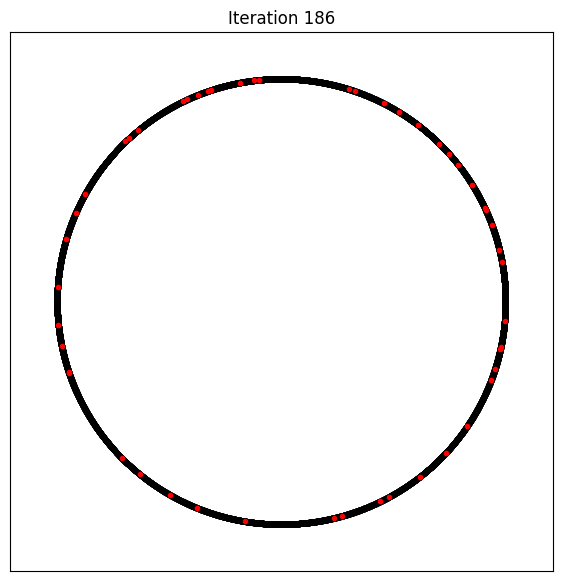

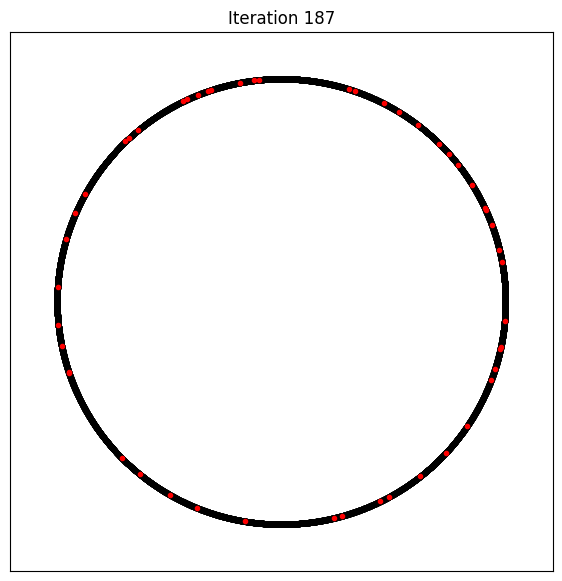

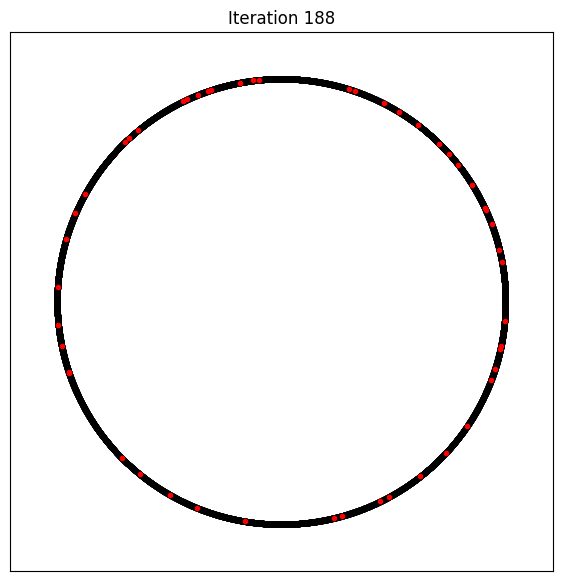

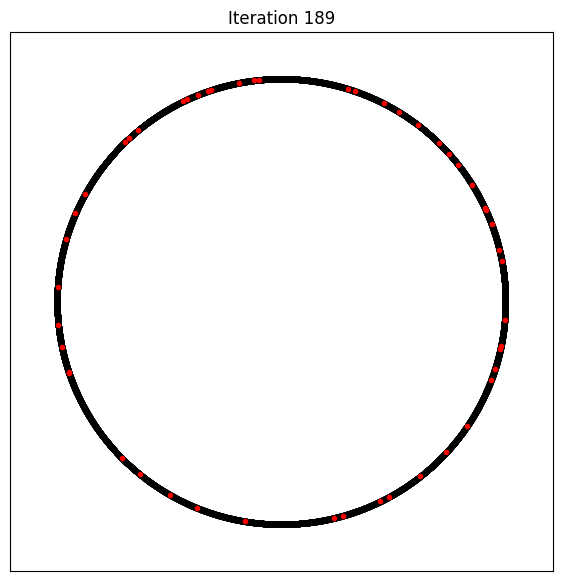

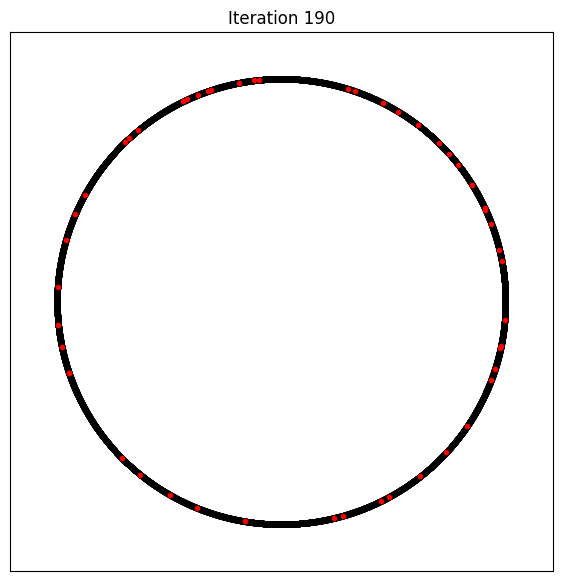

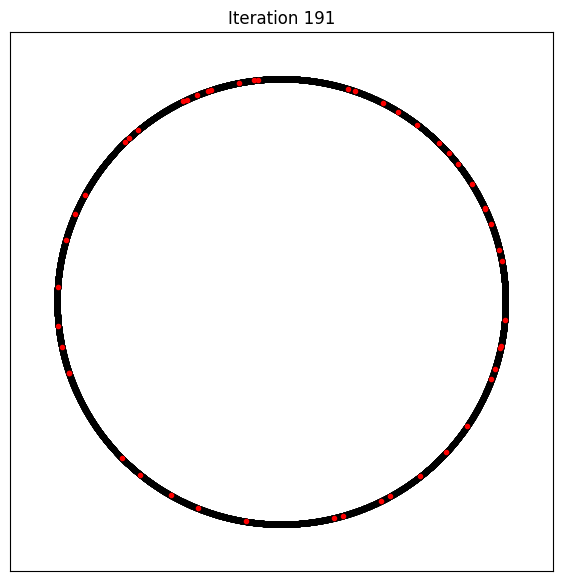

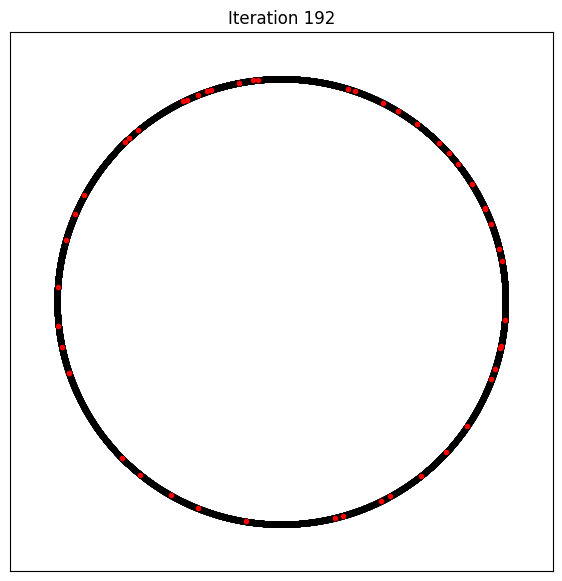

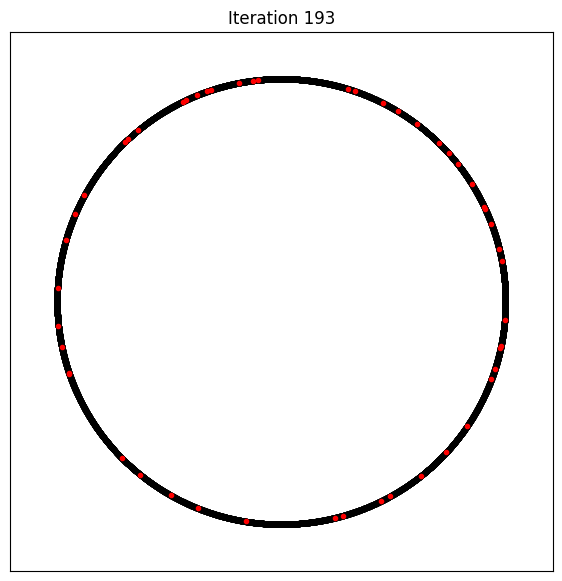

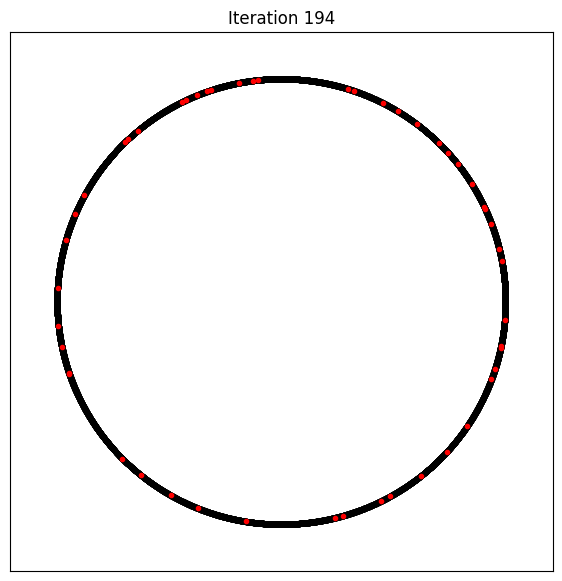

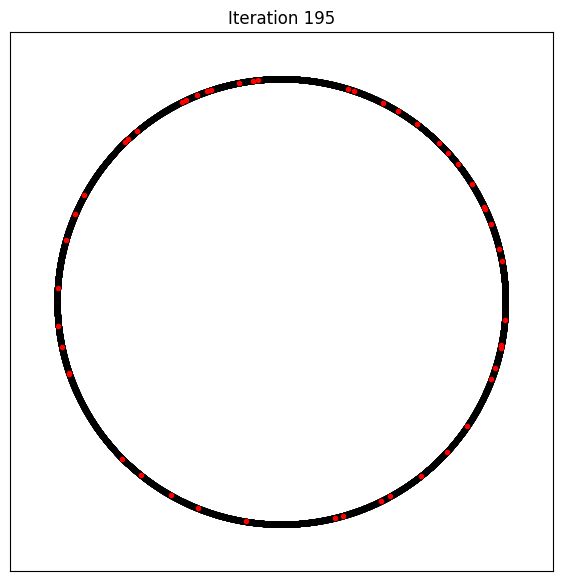

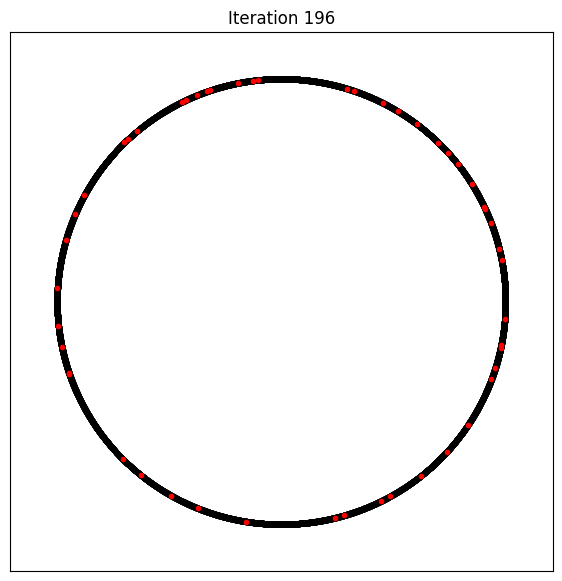

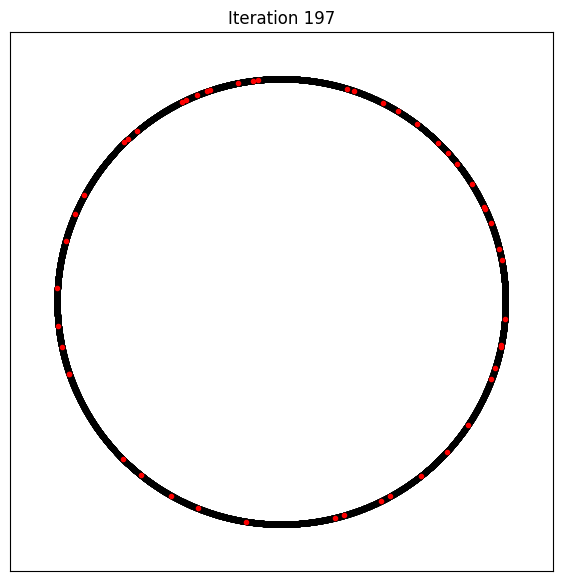

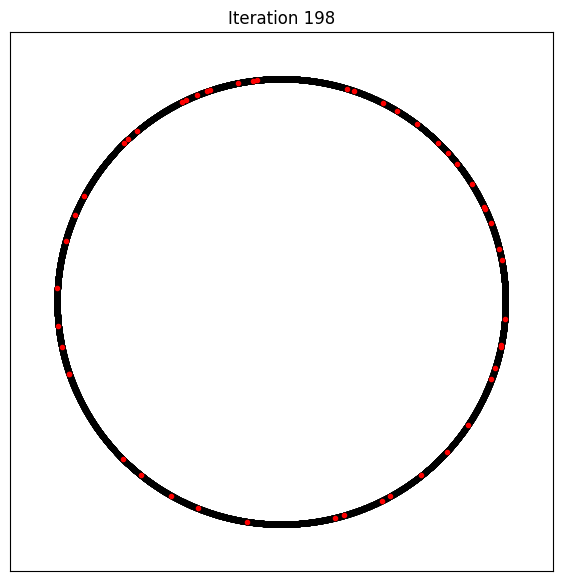

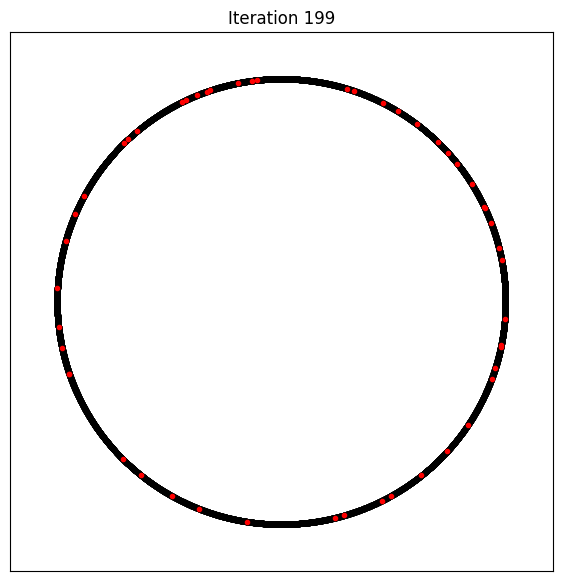

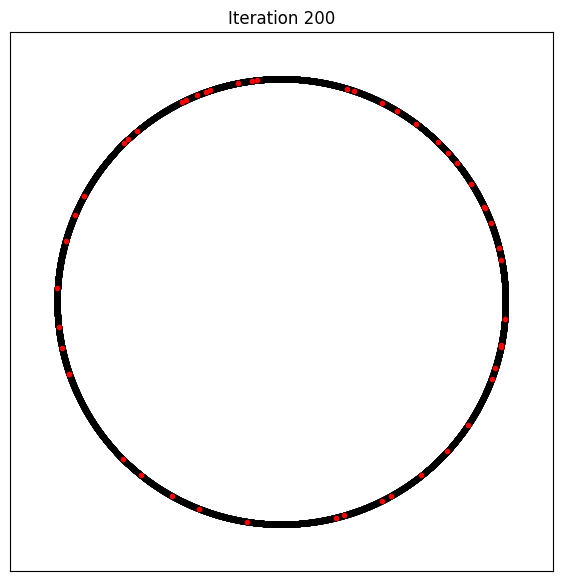

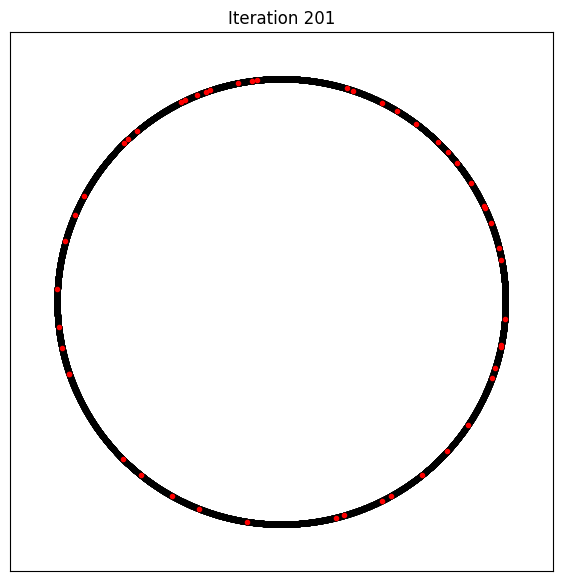

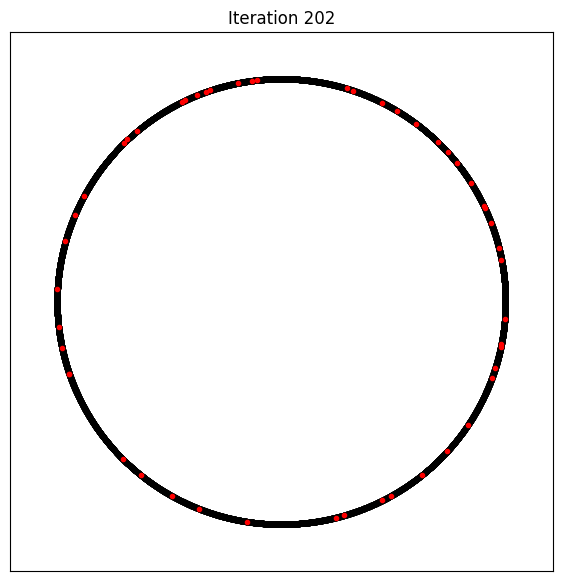

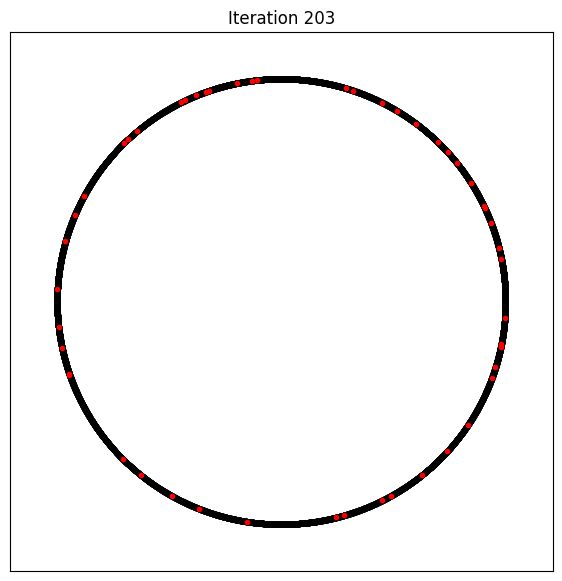

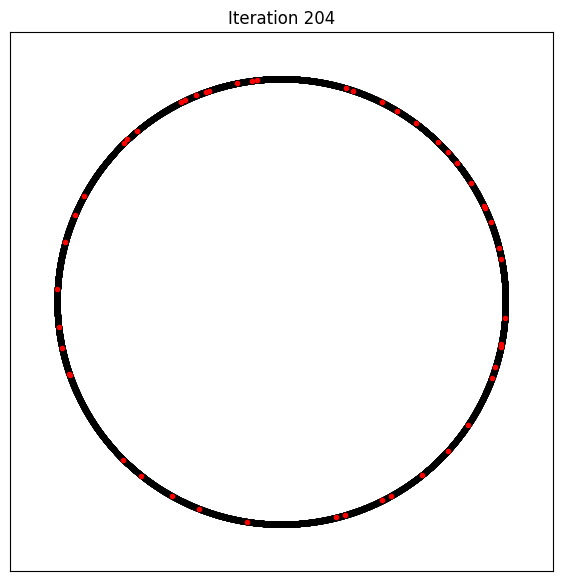

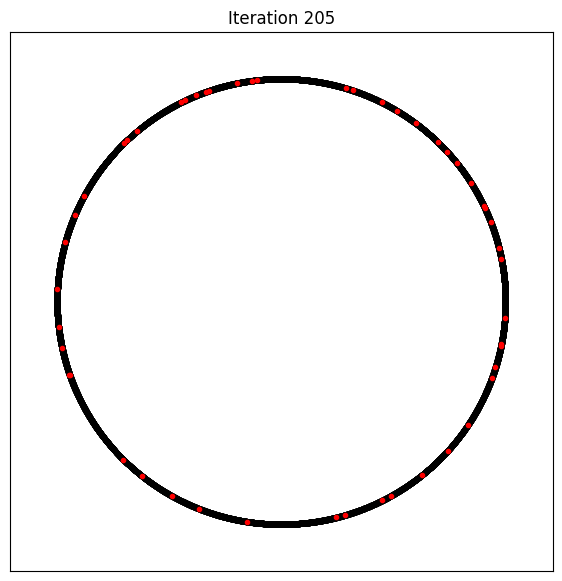

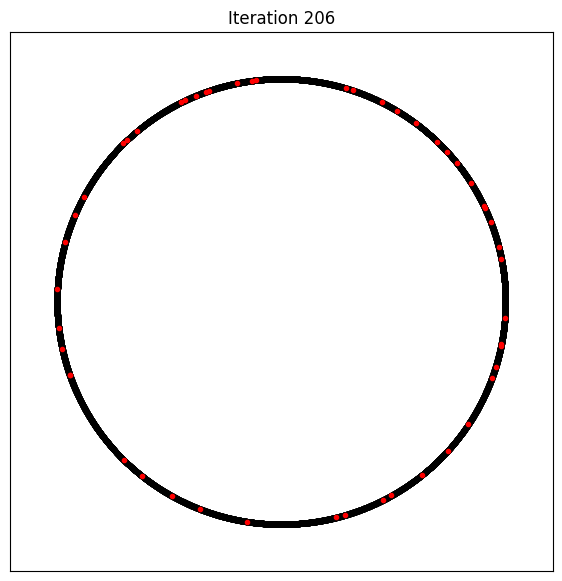

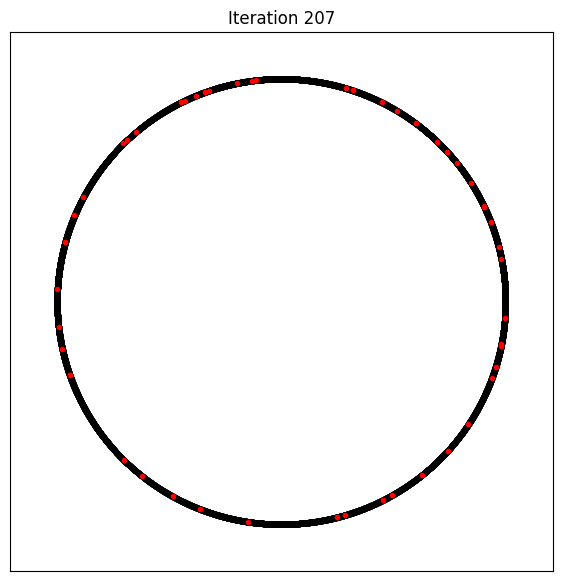

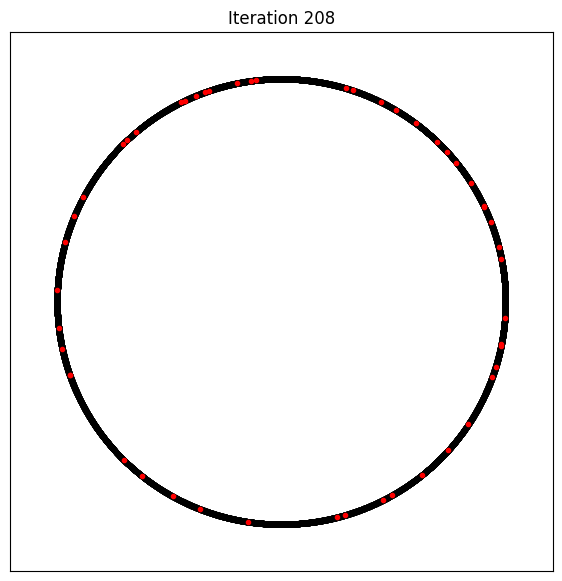

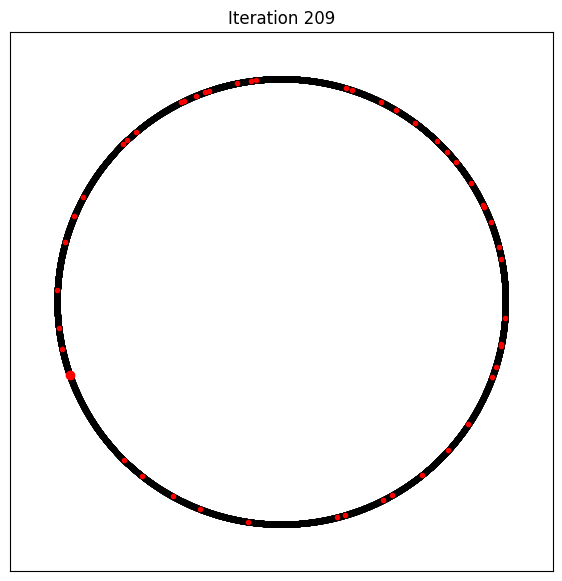

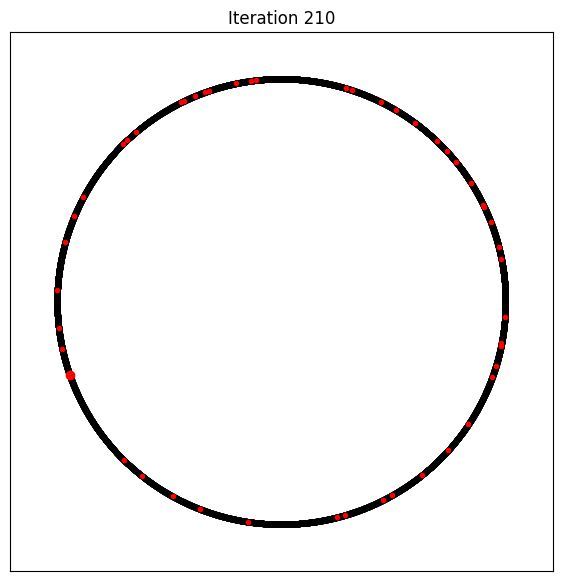

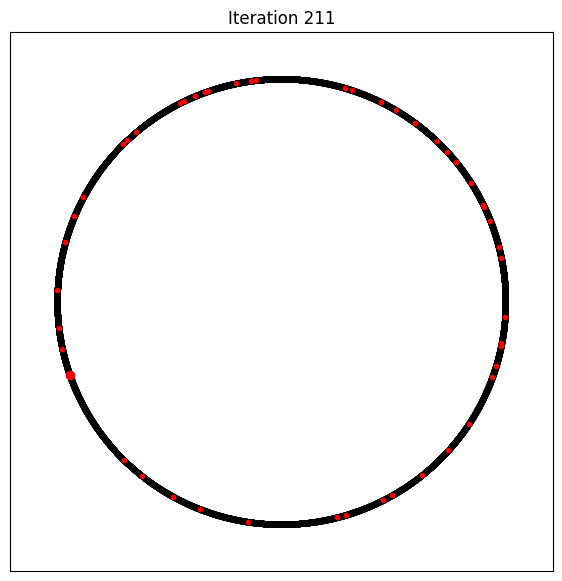

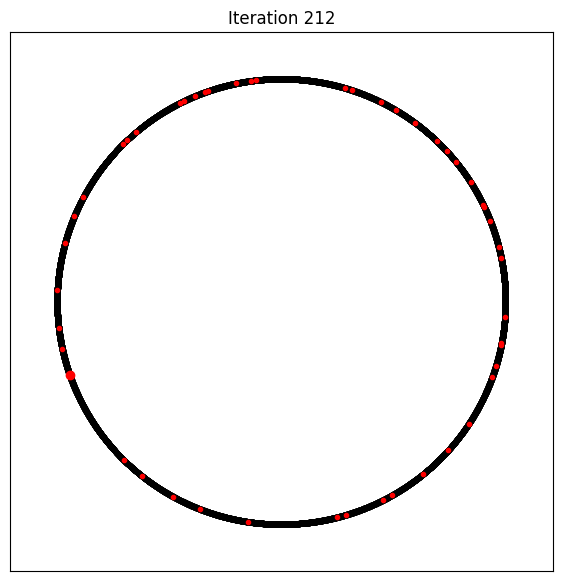

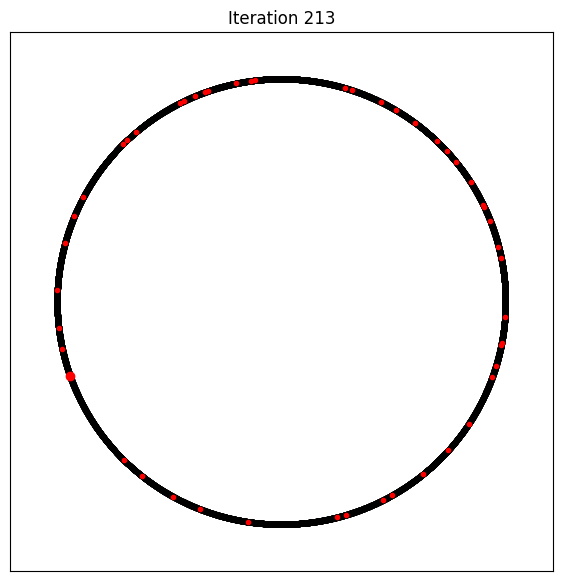

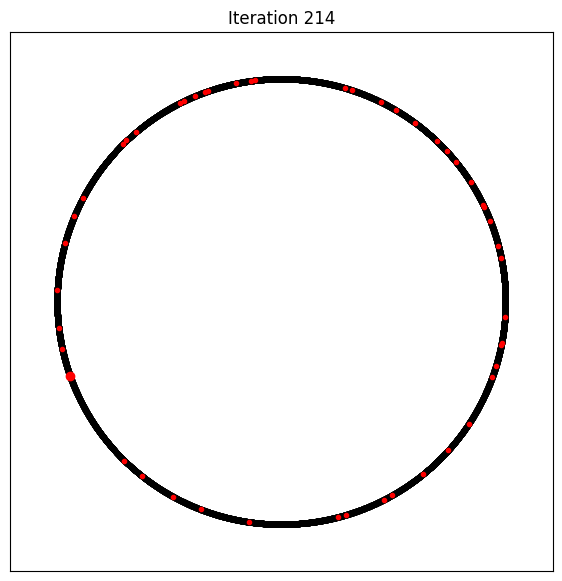

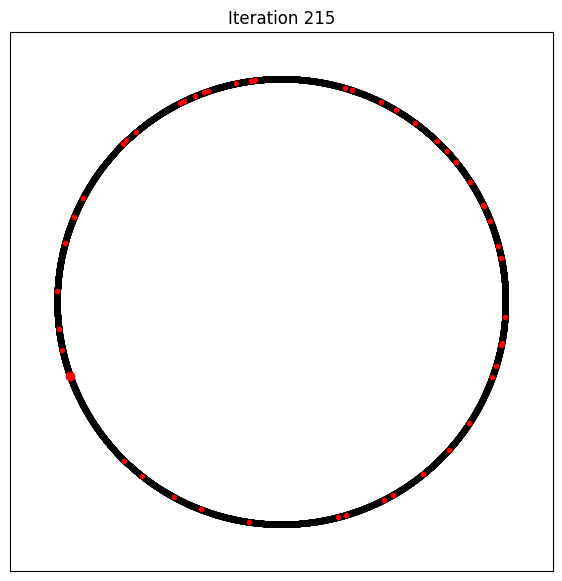

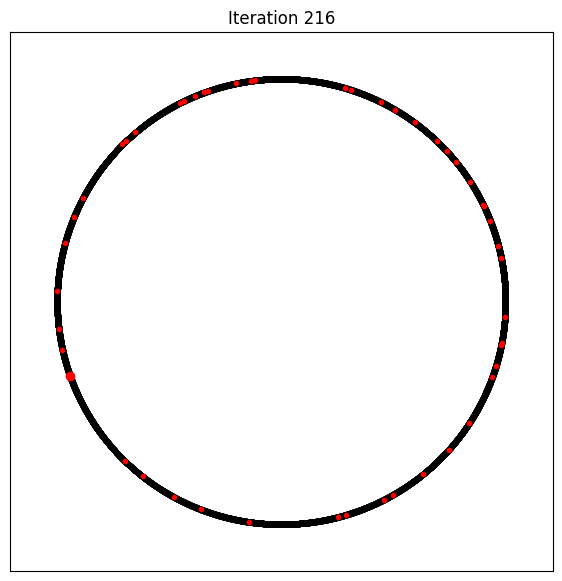

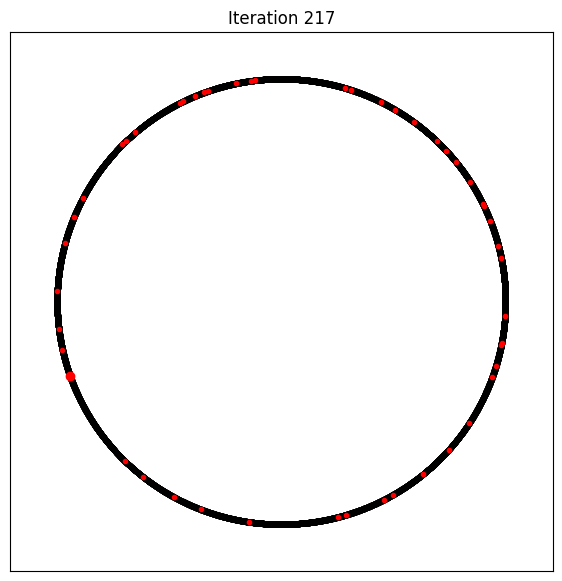

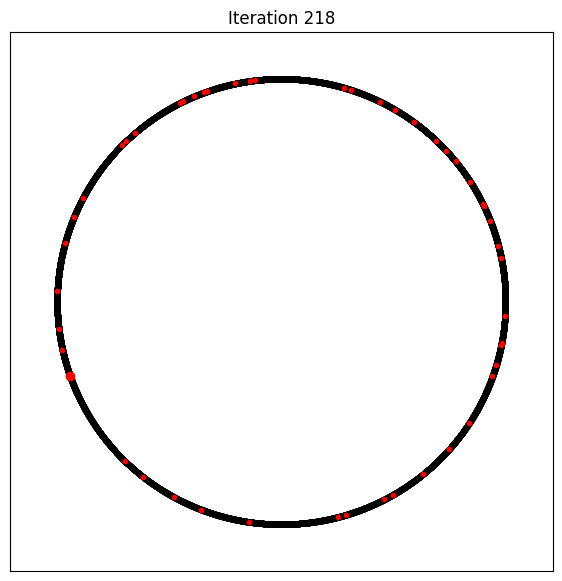

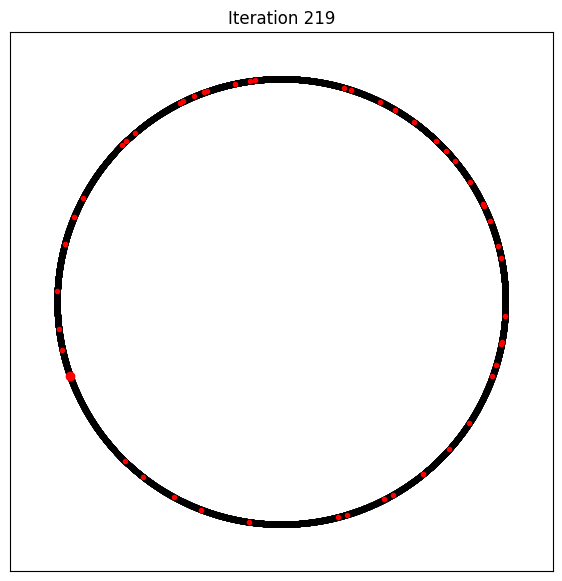

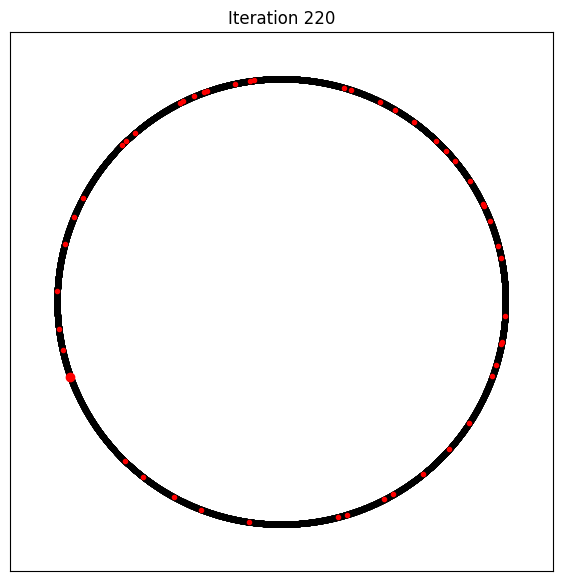

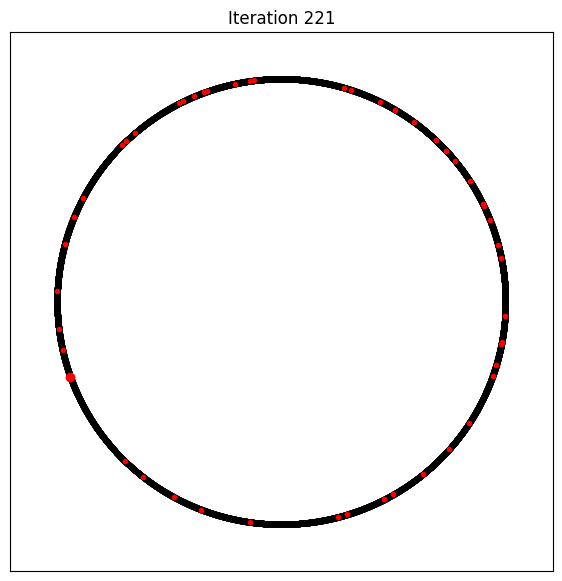

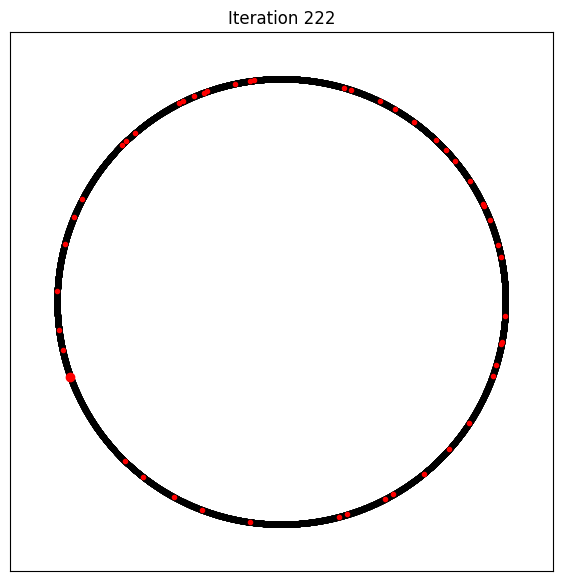

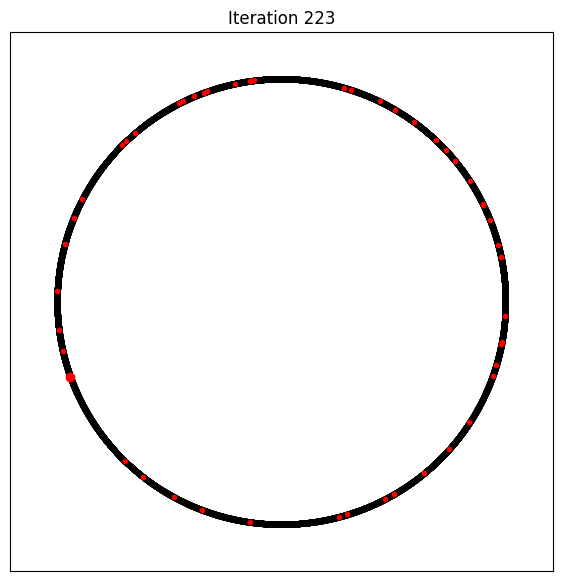

In [ ]:
#plotting particle locations

filenames = []

for i in range(0,iterations):
    fig, (ax1) = plt.subplots(1,figsize =(7,7))
    nx.draw_networkx(G, with_labels = False, pos=node_pos, ax = ax1, node_size = 10, node_color = 'black', width =0.5)
    for n in range(0,len(nodes)):
        #node_loc = trajectories[n][i]
        ax1.plot(node_pos[n][0],node_pos[n][1], color = 'red', marker = 'o', markersize = 3*a[i][n])
    
    #t = np.linspace(0,i,i+1)
    #ax2.plot(t[i], system_entropy[i])    
    #ax2.set_xlabel('Time')
    #ax2.set_ylabel('System Entropy')
    #ax3.plot(t[i],int(rewards[i]))
    #ax3.set_xlabel('Time')
    #ax3.set_ylabel('Total reward')
    ax1.set_title(f'Iteration {i}')
    #ax1.set_xticks([])
    #ax1.set_yticks([])
    plt.show()
    
    filename = f'/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/iteration{i}.png'
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)

In [ ]:
# build gif
with imageio.get_writer('/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/test_exp_DQN.gif', mode='I', duration = 0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [61]:
l = np.load(loss_path)

In [62]:
len(l)

50689

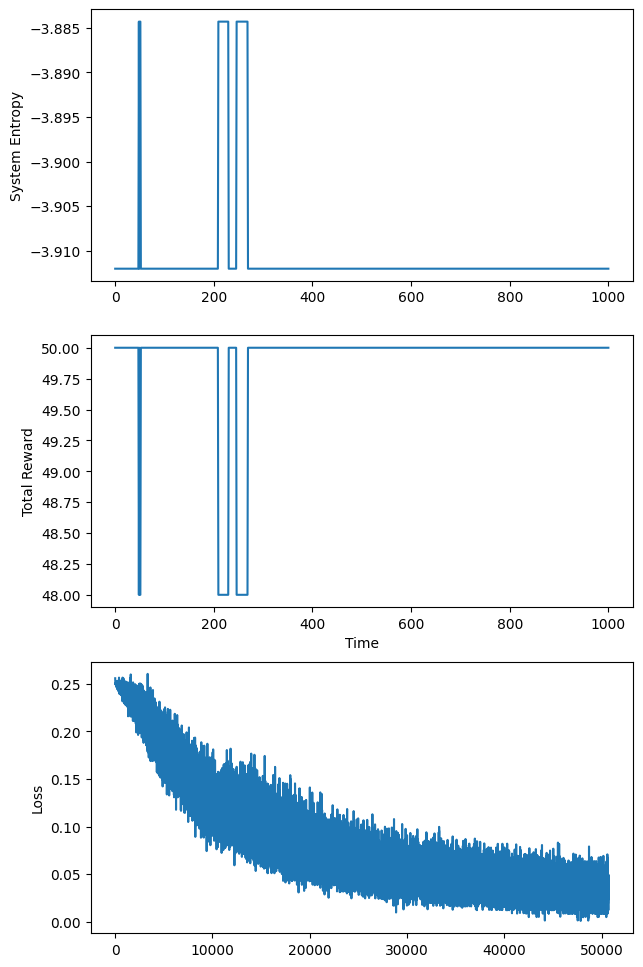

In [63]:
#plot rewards over time, system entropy over time and loss
t = np.linspace(0,len(rewards),len(rewards))
empty = np.zeros(100)
r_arr = np.array(rewards)
r = r_arr.astype(float)
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize =(7,12))

loss_dim = np.linspace(0, len(l), len(l))
#print(loss_dim.shape)
ax1.plot(t, system_entropy)
ax2.plot(t, r)
ax3.plot(loss_dim, l)

ax1.set_ylabel('System Entropy')
ax2.set_ylabel('Total Reward')
ax3.set_ylabel('Loss')
ax2.set_xlabel('Time')
name = '/home/users/kmgreen/Code/eco_rl_games/src/ags50_nodes10000/thousand_iterations_DQN.png'
fig.savefig(name)
plt.show()
